<a href="https://colab.research.google.com/github/Eridaa/ML-research---predicting-displacement-of-Miura-ori-origami-sheets/blob/main/220607_Origami_Metamaterials_Final_R1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Information

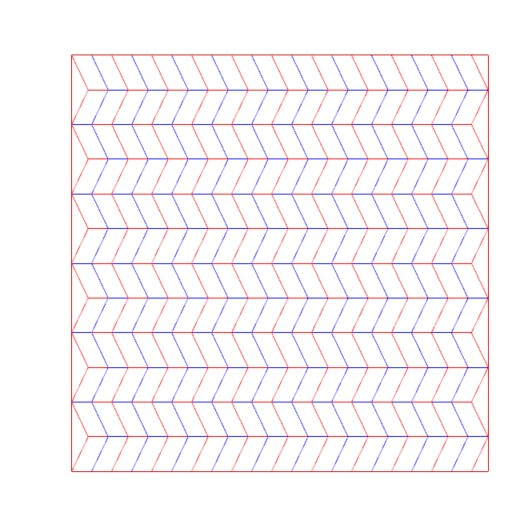

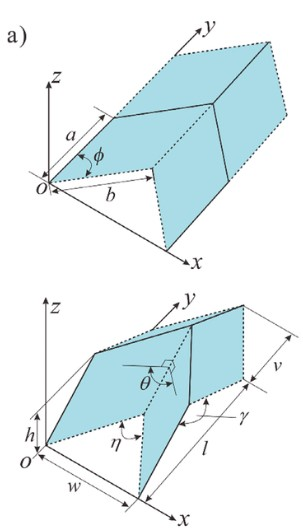

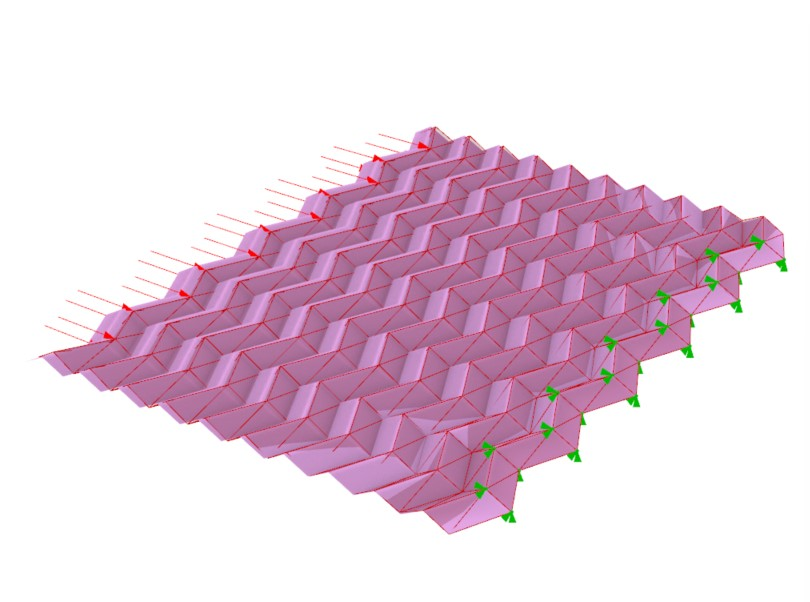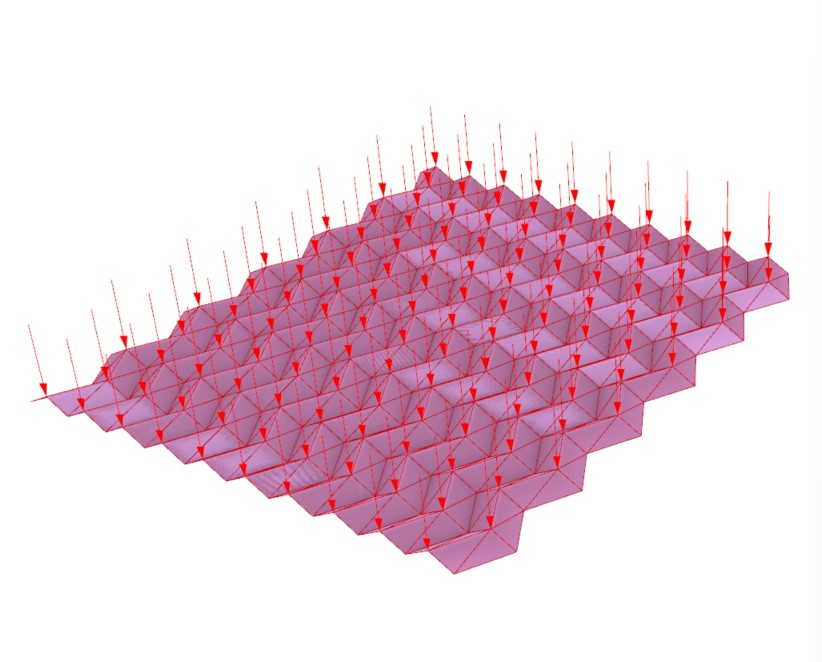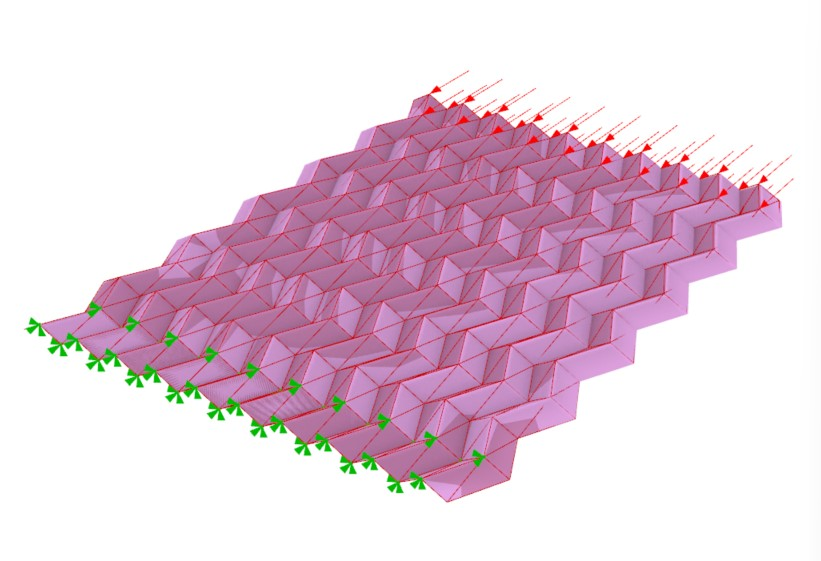

# **01_SETUP**

In [ ]:
!pip install pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

[DEBUG] Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sns.set()

In [ ]:
#change working directory
%cd '/content/drive/MyDrive/IaaC_MaCAD/Module 3/S1_Digital tools for Data Encoding/Projects/Data Encoding project/Images'
!pwd

/content/drive/.shortcut-targets-by-id/1PPw-SAGpc73rmOq5JPCicREuc8FB50dJ/Data Encoding project/Images
/content/drive/.shortcut-targets-by-id/1PPw-SAGpc73rmOq5JPCicREuc8FB50dJ/Data Encoding project/Images


# **02_Data**

## Load & Check Data

In [ ]:
url='https://docs.google.com/spreadsheets/d/1fNarOR1HaGTg_XcORXytogWPdEuwrxYQ/edit?usp=sharing&ouid=107202451381041489063&rtpof=true&sd=true'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

In [ ]:
data = pd.read_excel(url)
print(data.shape)
data.head()

(3000, 16)


length(L)  breadth(B)  u_subdivision(u)  v_subdivisions(v)  \
0      100.0       100.0              22.0               22.0   
1      100.0       100.0              24.0               18.0   
2      100.0       100.0              18.0               24.0   
3      100.0       100.0              14.0               22.0   
4      100.0       100.0               8.0               22.0   

   sector_angle(sA)  dihedral_folding_Angle (dA)  unit_length(a)  \
0             46.86                        118.0          6.2297   
1             48.24                        134.0          7.4475   
2             51.96                         96.0          5.2904   
3             59.76                         82.0          5.2615   
4             76.99                         46.0          4.6652   

   unit_width(b)  inset(i)  folded_length(fL)  folded_breadth (fB)  \
0         4.3518      4.26          96.186814            95.891489   
1         3.9600      4.96          99.087662            99.672798   
2         5.3744      3.26          90.416144            91.179279   
3         6.9536      2.65          78.140893            84.641835   
4        12.3688      1.05          29.701270            45.628995   

   folded_height(h)  load(N)  Z_displacement(zD)  x_displacement(xD)  \
0          1.887984    100.0            0.001256            0.807888   
1          1.416303    100.0            0.002829            5.416922   
2          3.197396    100.0            0.001188            1.689082   
3          5.244282    100.0            0.001120            2.842621   
4         12.008313    100.0            0.002521            0.546872   

   y_displacement(yD)  
0            4.811777  
1            6.118910  
2            3.491618  
3            4.567222  
4           17.376538

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   length(L)                    3000 non-null   float64
 1   breadth(B)                   3000 non-null   float64
 2   u_subdivision(u)             3000 non-null   float64
 3   v_subdivisions(v)            3000 non-null   float64
 4   sector_angle(sA)             3000 non-null   float64
 5   dihedral_folding_Angle (dA)  3000 non-null   float64
 6   unit_length(a)               3000 non-null   float64
 7   unit_width(b)                3000 non-null   float64
 8   inset(i)                     3000 non-null   float64
 9   folded_length(fL)            3000 non-null   float64
 10  folded_breadth (fB)          3000 non-null   float64
 11  folded_height(h)             3000 non-null   float64
 12  load(N)                      3000 non-null   float64
 13  Z_displacement(zD)

## Visualise Data

In [ ]:
color='orchid'
color2='crimson'
color3 = 'darkslateblue'
alpha=0.5

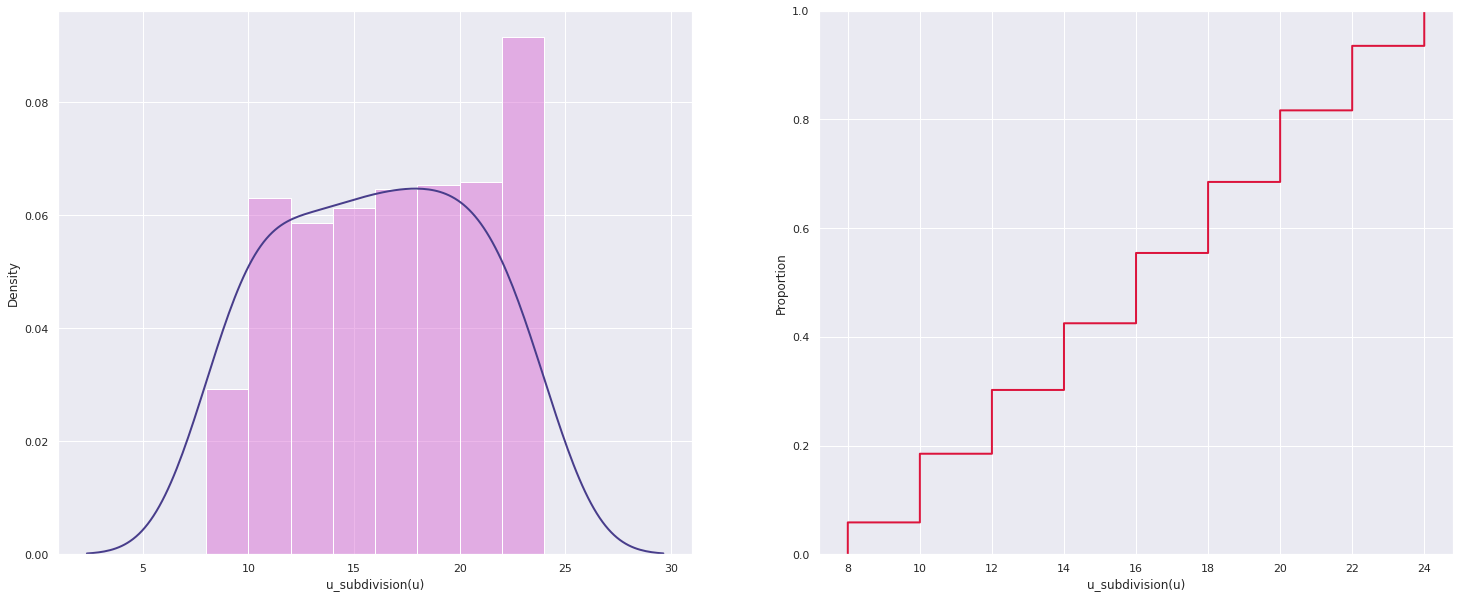

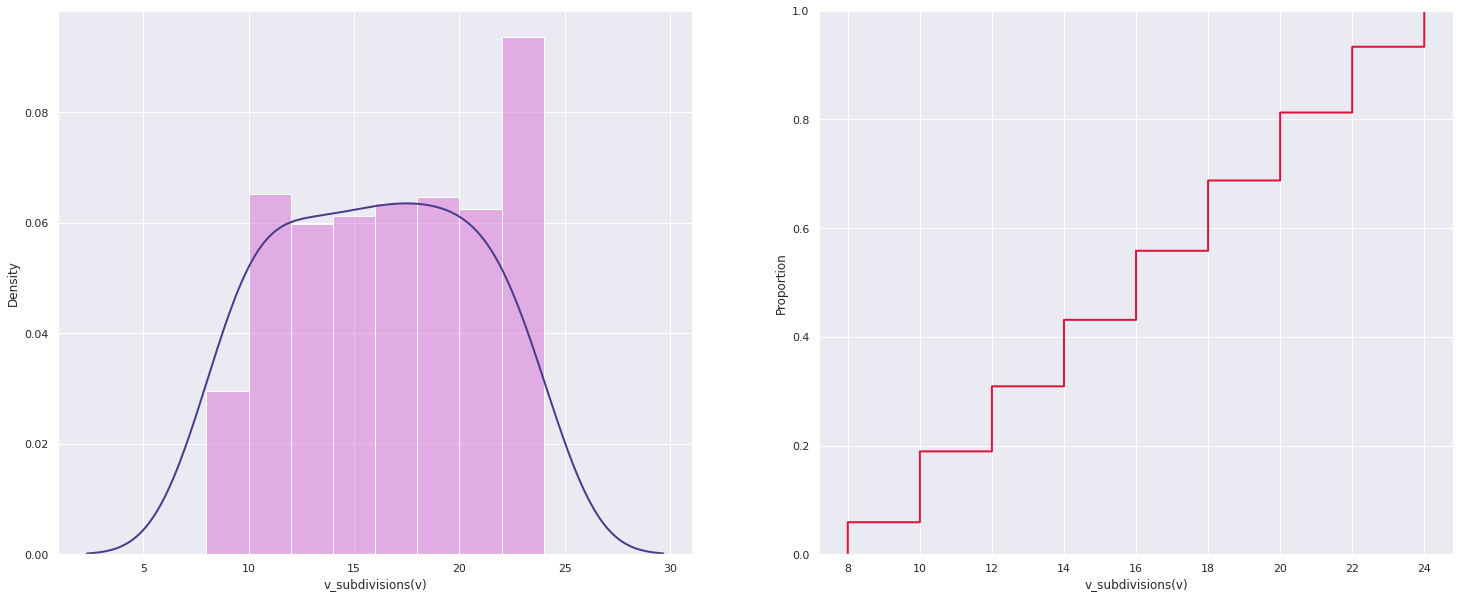

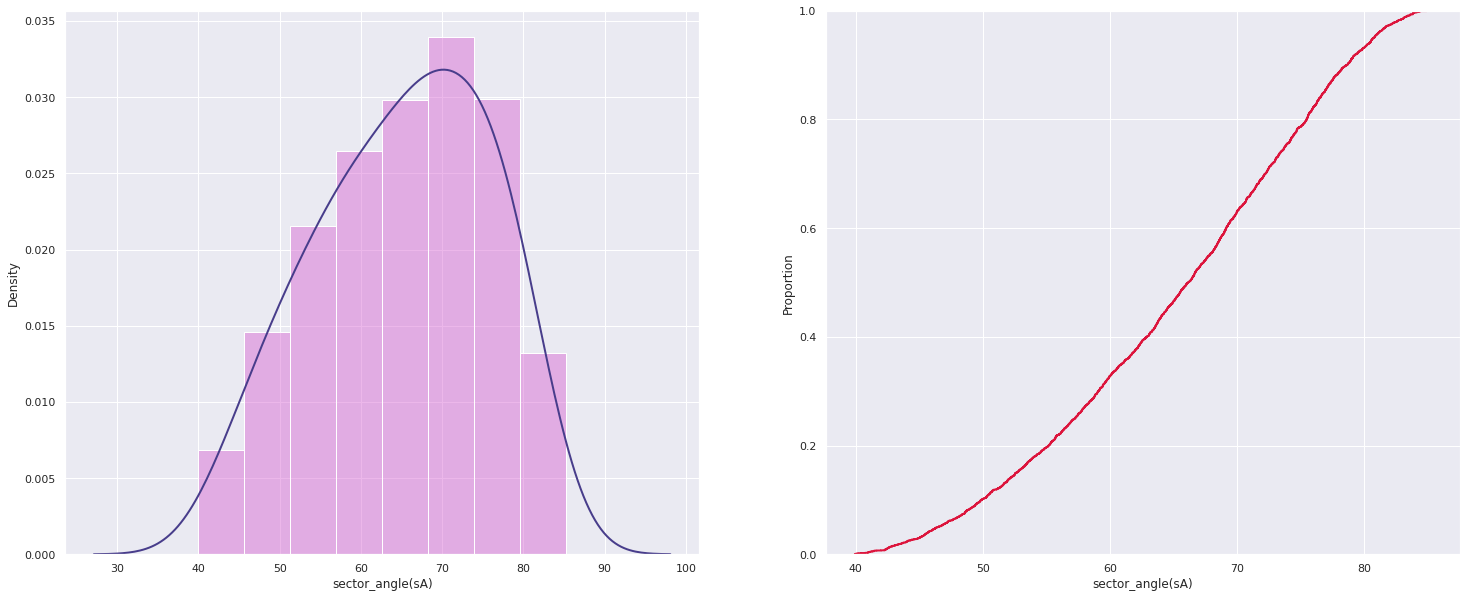

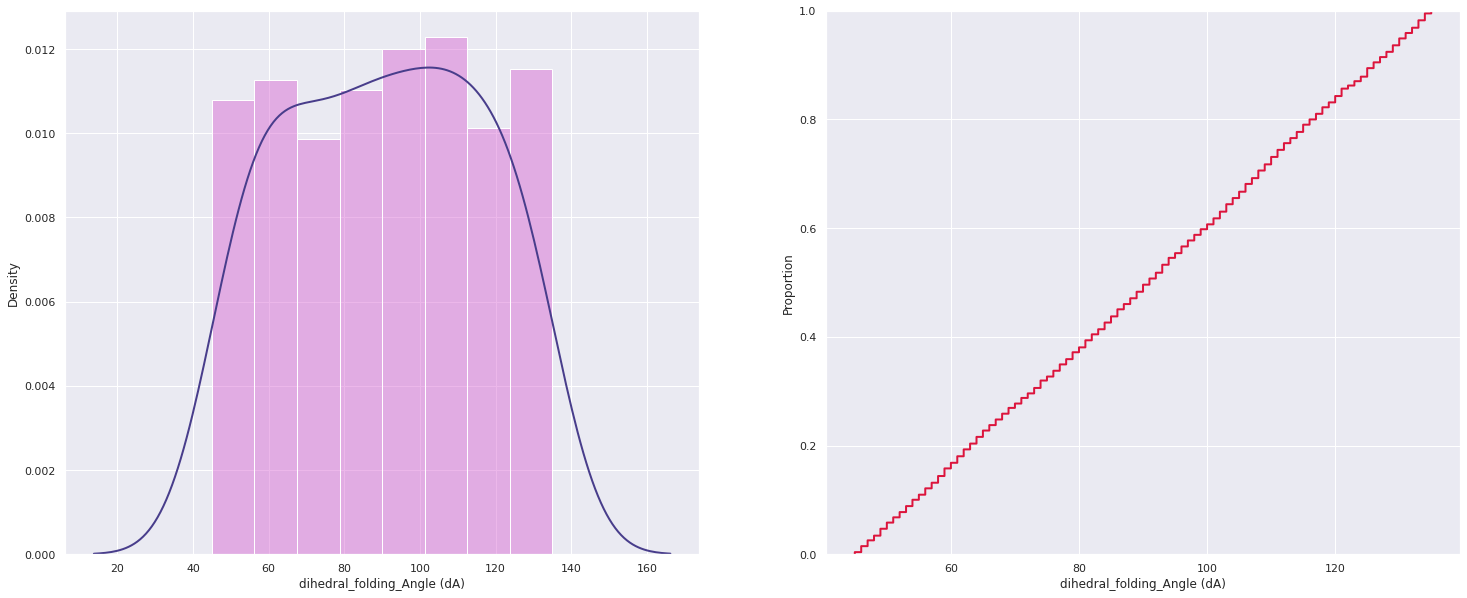

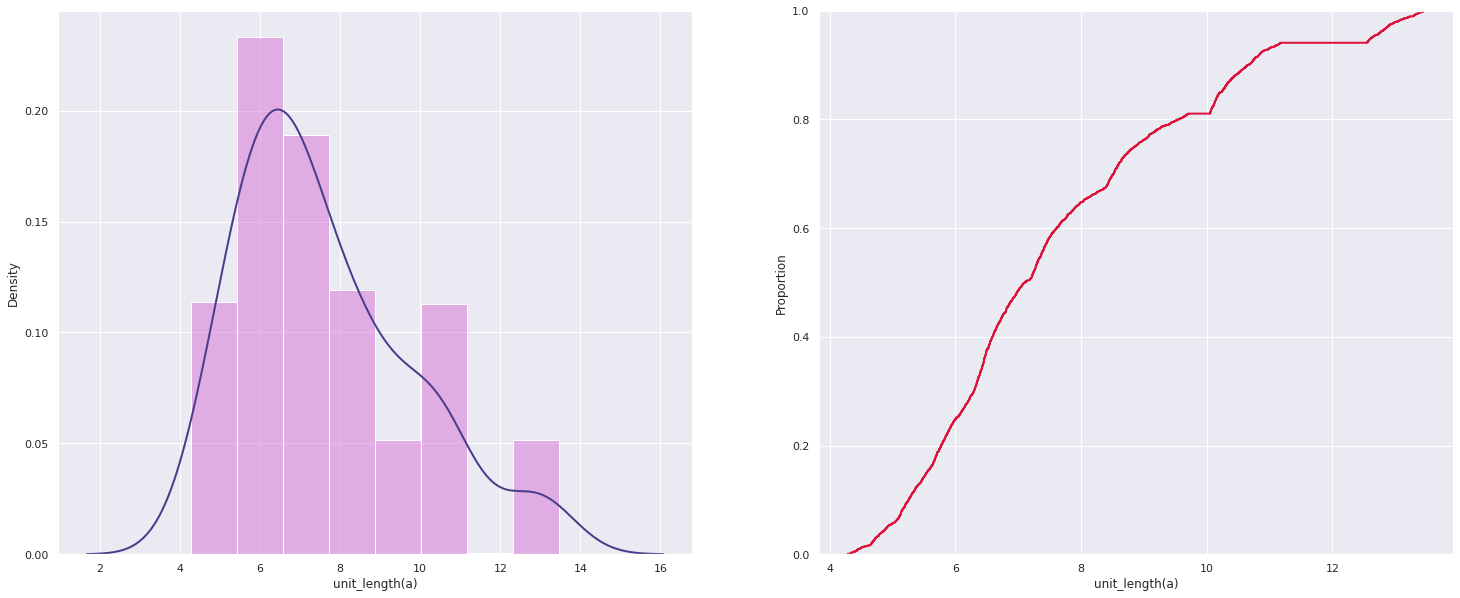

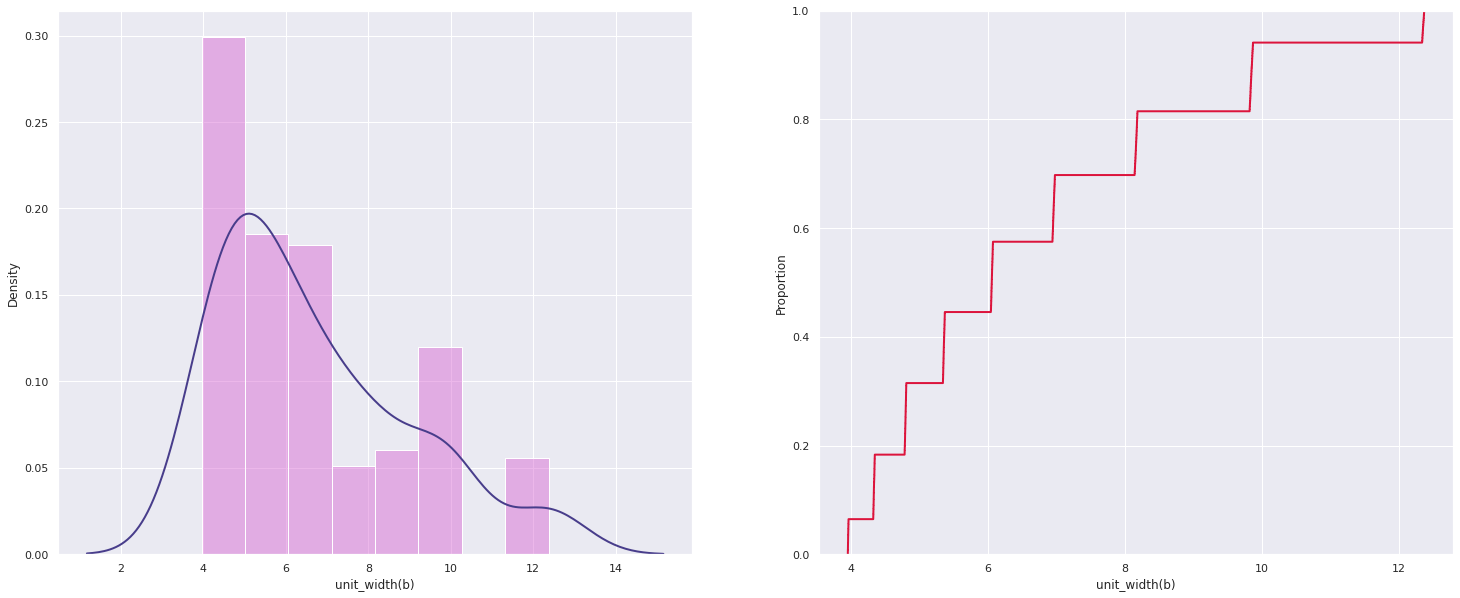

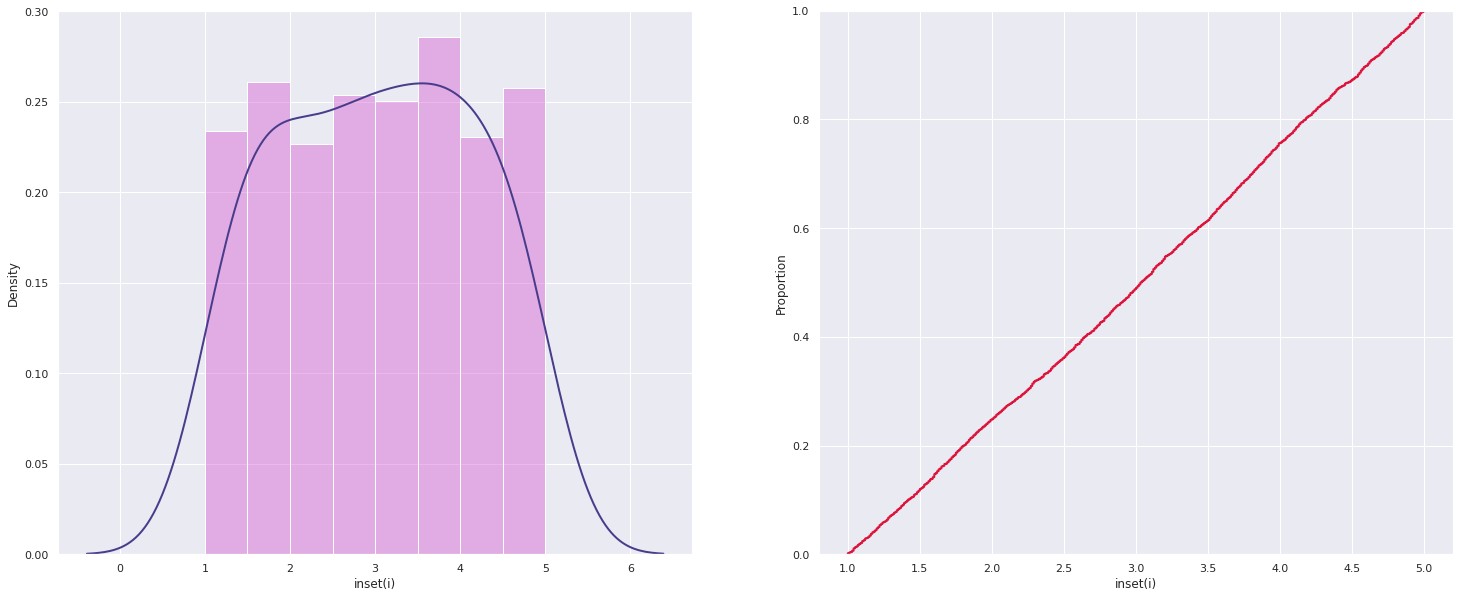

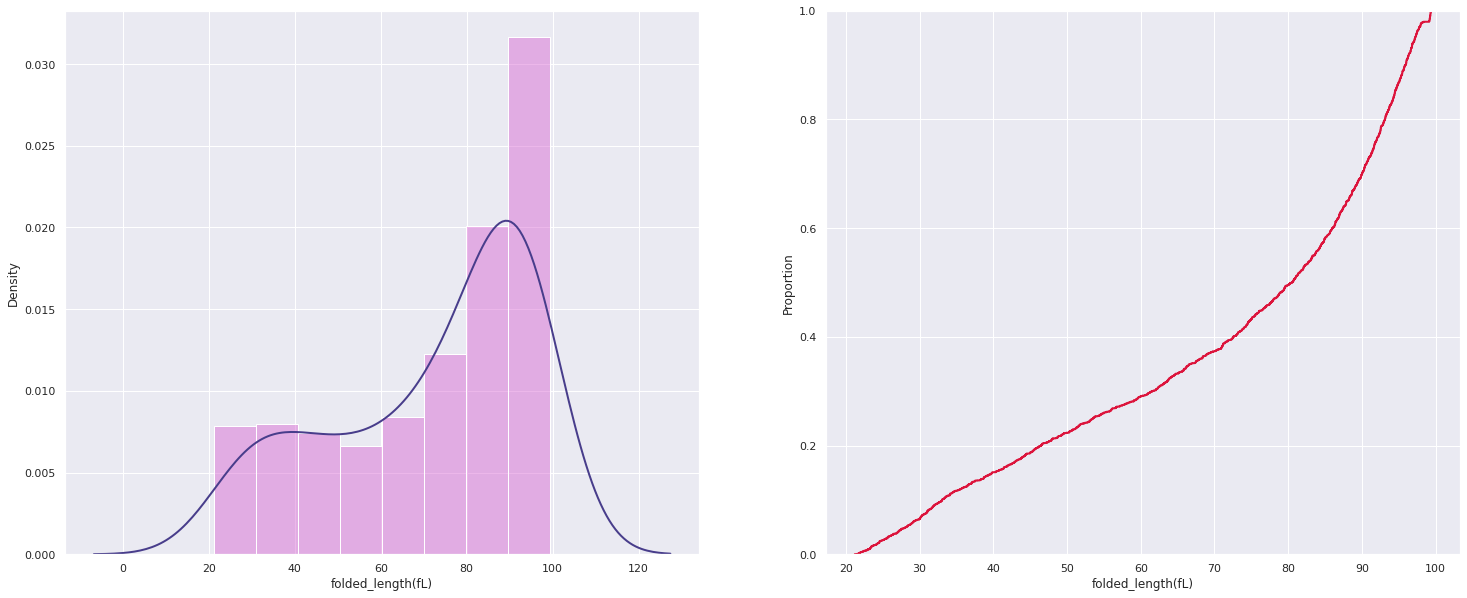

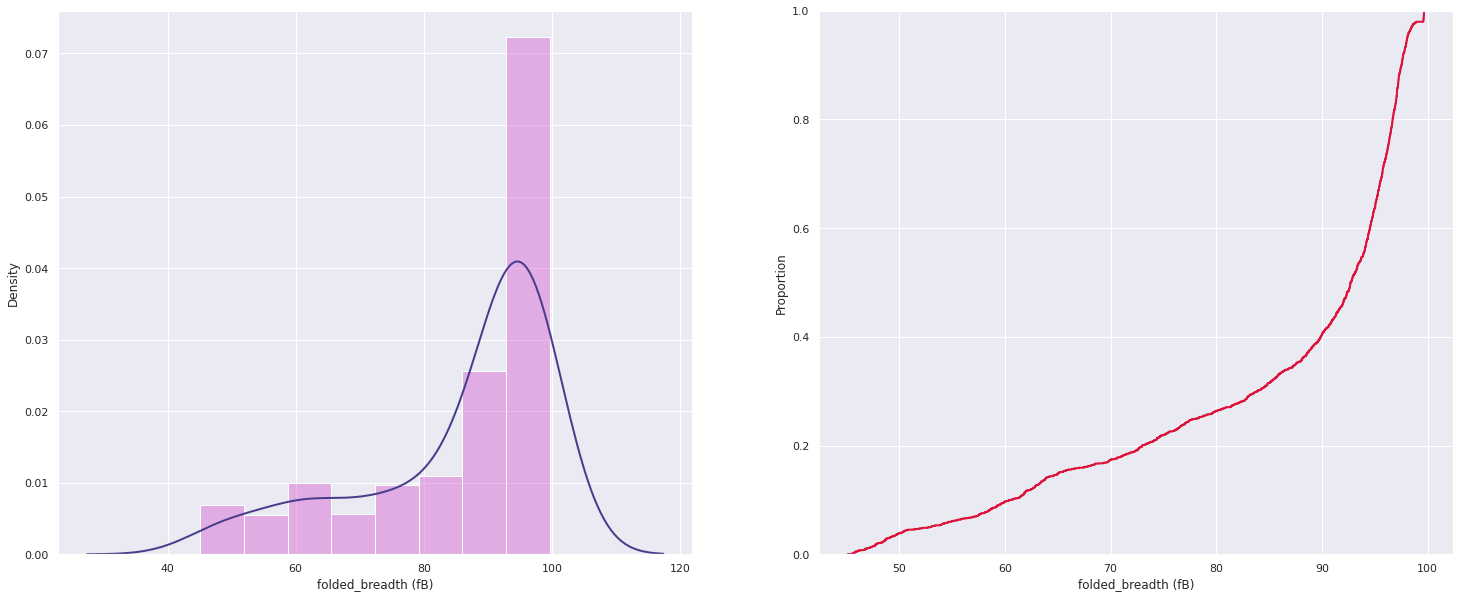

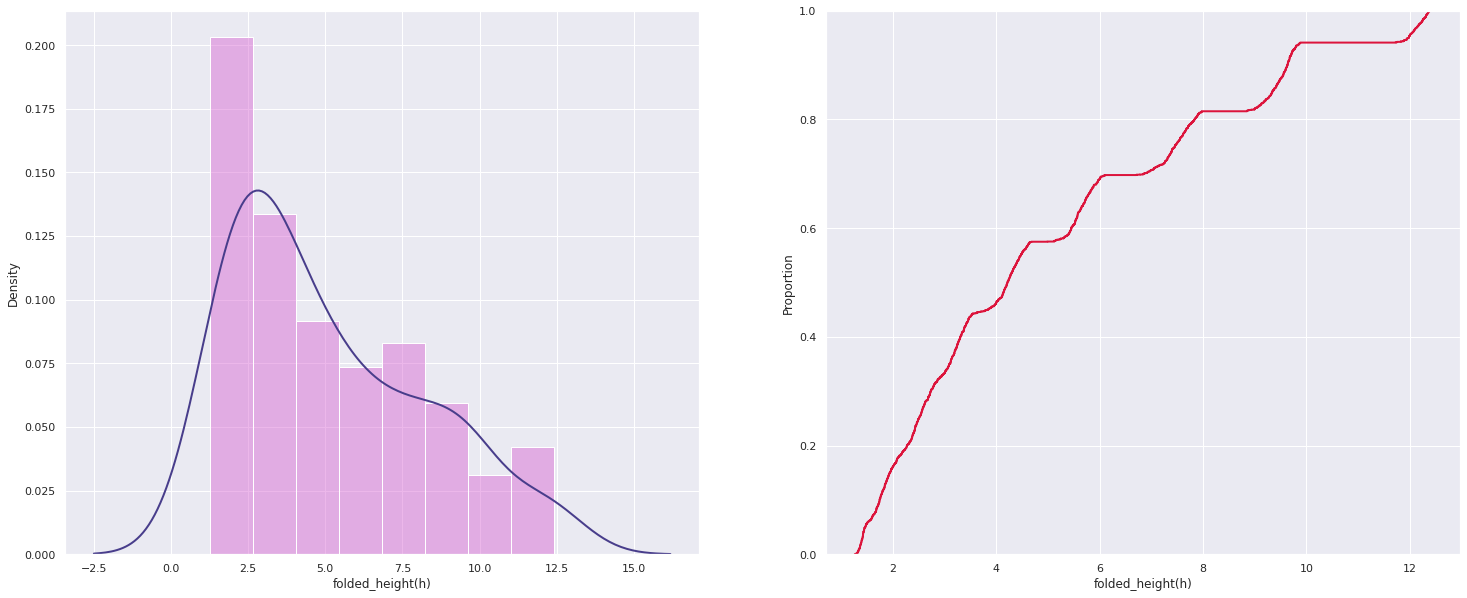

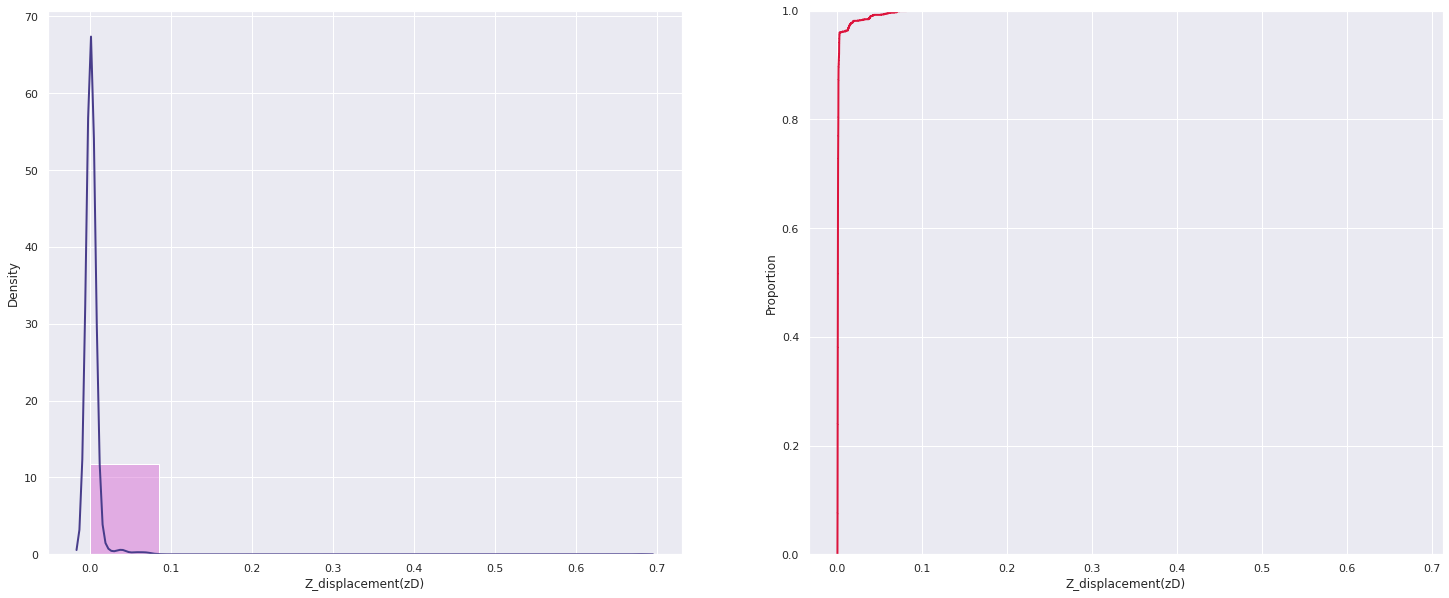

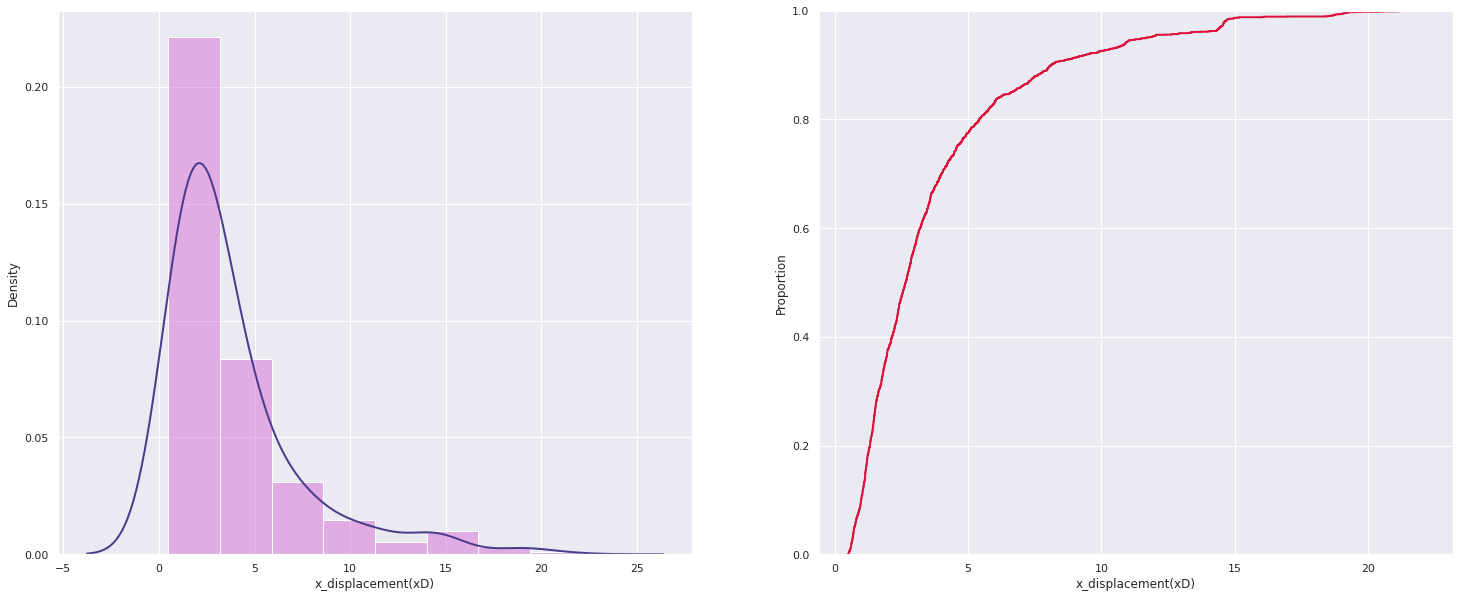

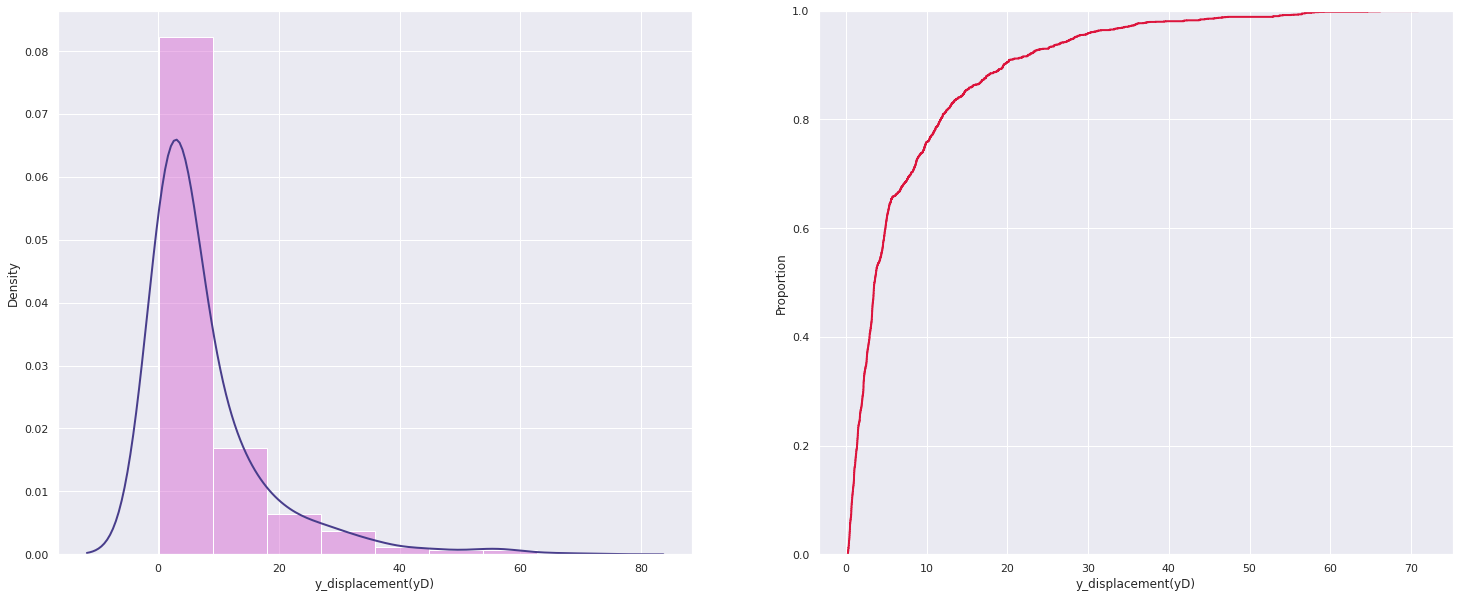

In [ ]:
for i in data.columns.values:
  if (i == 'length(L)') | (i == 'breadth(B)') | (i == 'load(N)'):
    pass
  else: 
    fig, ax = plt.subplots(1,2, figsize = (25,10))
    sns.histplot(data[i], color=color, stat = 'density', alpha=alpha, bins=8, ax=ax[0])
    sns.kdeplot(data[i], color=color3, linewidth=2, bw_adjust=2, ax=ax[0])
    sns.ecdfplot(data[i], color=color2, linewidth=2, ax = ax[1])
    fig.savefig('data_'+i, dpi = 150)



## Identify Outliers

In [ ]:
outliers = data[((data['x_displacement(xD)']>14) & (data['y_displacement(yD)'] >25)) | ((data['folded_length(fL)']<28.8) & (data['folded_breadth (fB)']>48))]
print(outliers.shape)
outliers.head()

(128, 16)


length(L)  breadth(B)  u_subdivision(u)  v_subdivisions(v)  \
24      100.0       100.0              10.0               12.0   
33      100.0       100.0              10.0               10.0   
38      100.0       100.0               8.0               14.0   
44      100.0       100.0               8.0               10.0   
64      100.0       100.0              10.0               10.0   

    sector_angle(sA)  dihedral_folding_Angle (dA)  unit_length(a)  \
24             80.66                         53.0          8.4452   
33             82.26                         53.0         10.0921   
38             81.17                         48.0          7.2286   
44             83.95                         46.0         10.0560   
64             82.37                         53.0         10.0894   

    unit_width(b)  inset(i)  folded_length(fL)  folded_breadth (fB)  \
24         9.8630      1.37          28.436827            62.000071   
33         9.8640      1.36          26.394739            64.185411   
38        12.3613      1.11          24.482574            49.807339   
44        12.3675      1.06          21.792673            50.248210   
64         9.8660      1.34          26.162329            65.019165   

    folded_height(h)  load(N)  Z_displacement(zD)  x_displacement(xD)  \
24          9.777044    100.0            0.001970            1.972490   
33          9.846963    100.0            0.001841            3.056922   
38         12.225451    100.0            0.012573            1.300544   
44         12.359349    100.0            0.014917            3.687270   
64          9.799329    100.0            0.030274            2.484914   

    y_displacement(yD)  
24           29.960410  
33           35.725241  
38           35.849246  
44           57.995878  
64           33.205273

In [ ]:
outlier_index = outliers.index
print(outlier_index)

Int64Index([  24,   33,   38,   44,   64,   89,   96,  106,  108,  203,
            ...
            2879, 2889, 2901, 2947, 2953, 2958, 2969, 2971, 2979, 2999],
           dtype='int64', length=128)


# **03_GH-Datasets**

## Subset from main data and check

In [ ]:
gh_data = data[((data['x_displacement(xD)']<14) & (data['y_displacement(yD)'] <25)) | ((data['folded_length(fL)']>28.8) & (data['folded_breadth (fB)']<48))]
print(gh_data.shape)
gh_data.head()

(2675, 16)


length(L)  breadth(B)  u_subdivision(u)  v_subdivisions(v)  \
0      100.0       100.0              22.0               22.0   
1      100.0       100.0              24.0               18.0   
2      100.0       100.0              18.0               24.0   
3      100.0       100.0              14.0               22.0   
4      100.0       100.0               8.0               22.0   

   sector_angle(sA)  dihedral_folding_Angle (dA)  unit_length(a)  \
0             46.86                        118.0          6.2297   
1             48.24                        134.0          7.4475   
2             51.96                         96.0          5.2904   
3             59.76                         82.0          5.2615   
4             76.99                         46.0          4.6652   

   unit_width(b)  inset(i)  folded_length(fL)  folded_breadth (fB)  \
0         4.3518      4.26          96.186814            95.891489   
1         3.9600      4.96          99.087662            99.672798   
2         5.3744      3.26          90.416144            91.179279   
3         6.9536      2.65          78.140893            84.641835   
4        12.3688      1.05          29.701270            45.628995   

   folded_height(h)  load(N)  Z_displacement(zD)  x_displacement(xD)  \
0          1.887984    100.0            0.001256            0.807888   
1          1.416303    100.0            0.002829            5.416922   
2          3.197396    100.0            0.001188            1.689082   
3          5.244282    100.0            0.001120            2.842621   
4         12.008313    100.0            0.002521            0.546872   

   y_displacement(yD)  
0            4.811777  
1            6.118910  
2            3.491618  
3            4.567222  
4           17.376538

In [ ]:
# #export data to use for kohonan dataset
# gh_data.to_excel('/content/drive/MyDrive/IaaC_MaCAD/Module 3/S1_Digital tools for Data Encoding/Projects/Data Encoding project/Dami Tryouts/Datasets/khn2_for_gh.xlsx', sheet_name='sheet1')

## Visualise Data

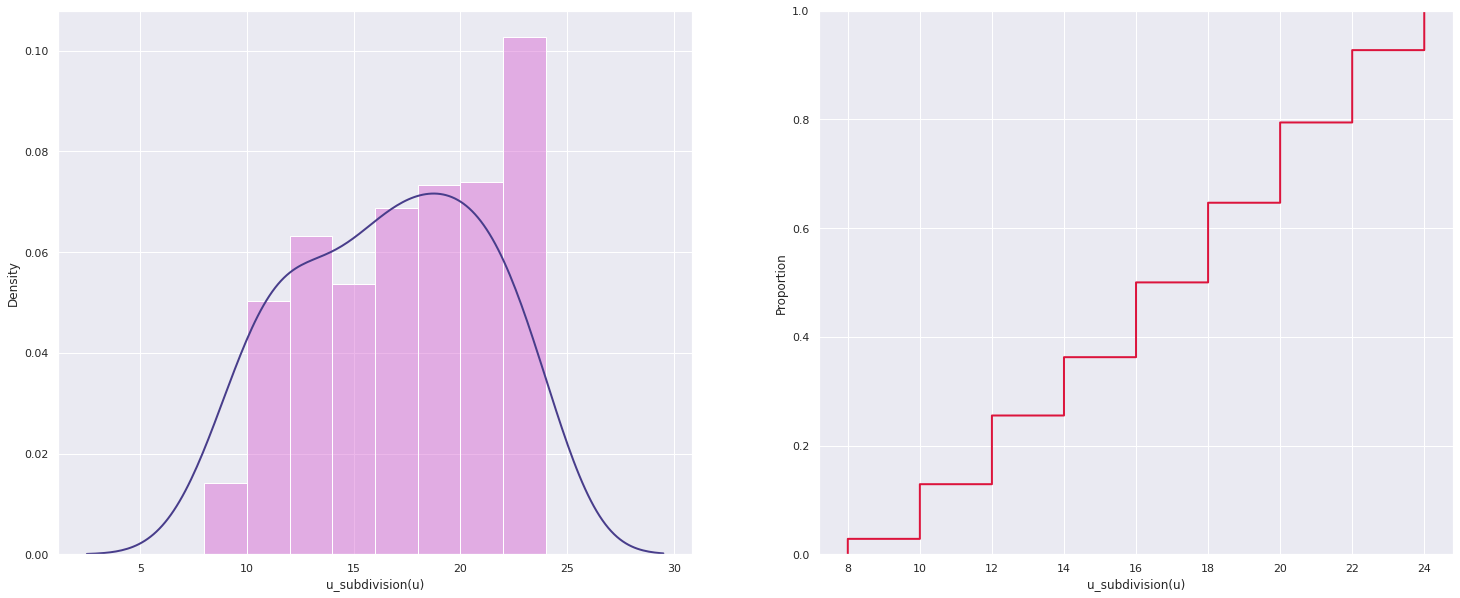

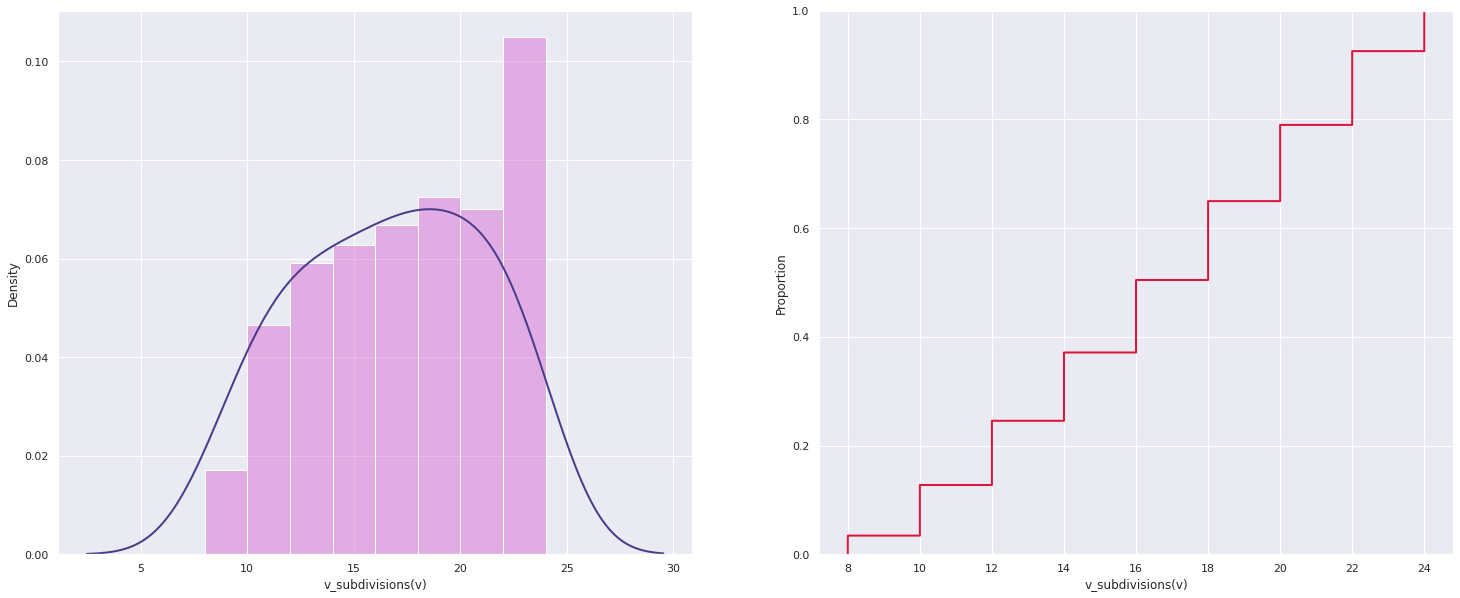

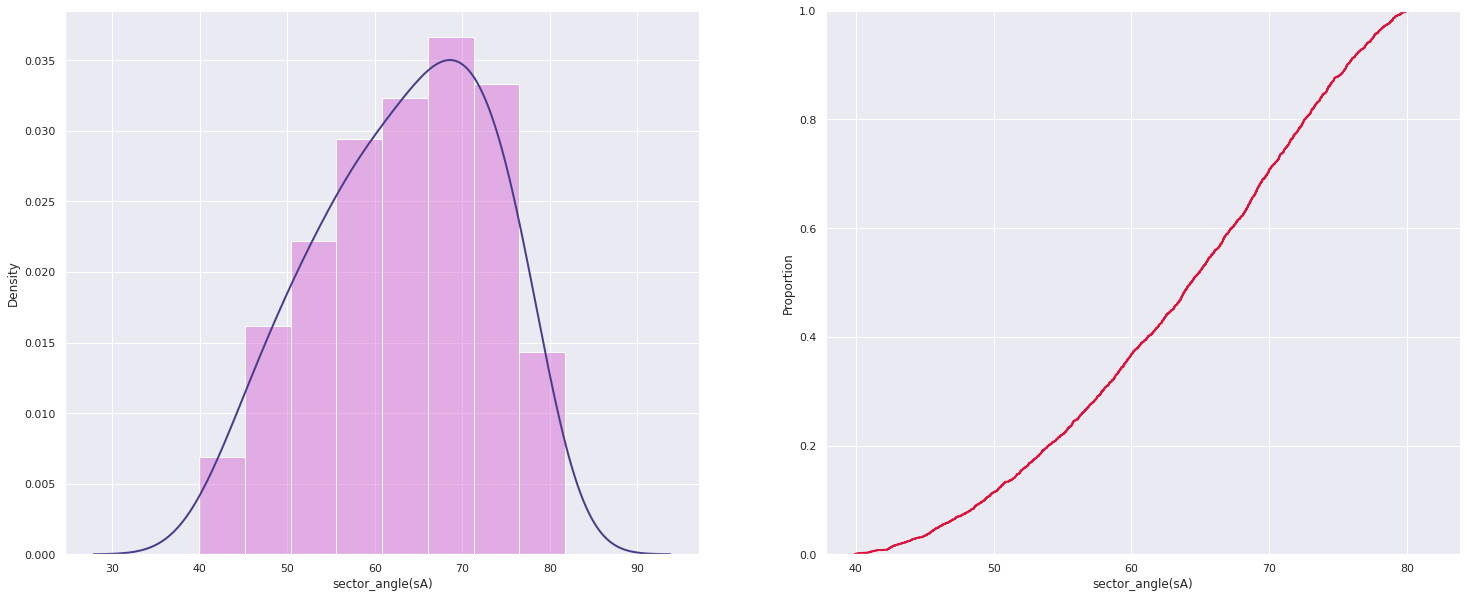

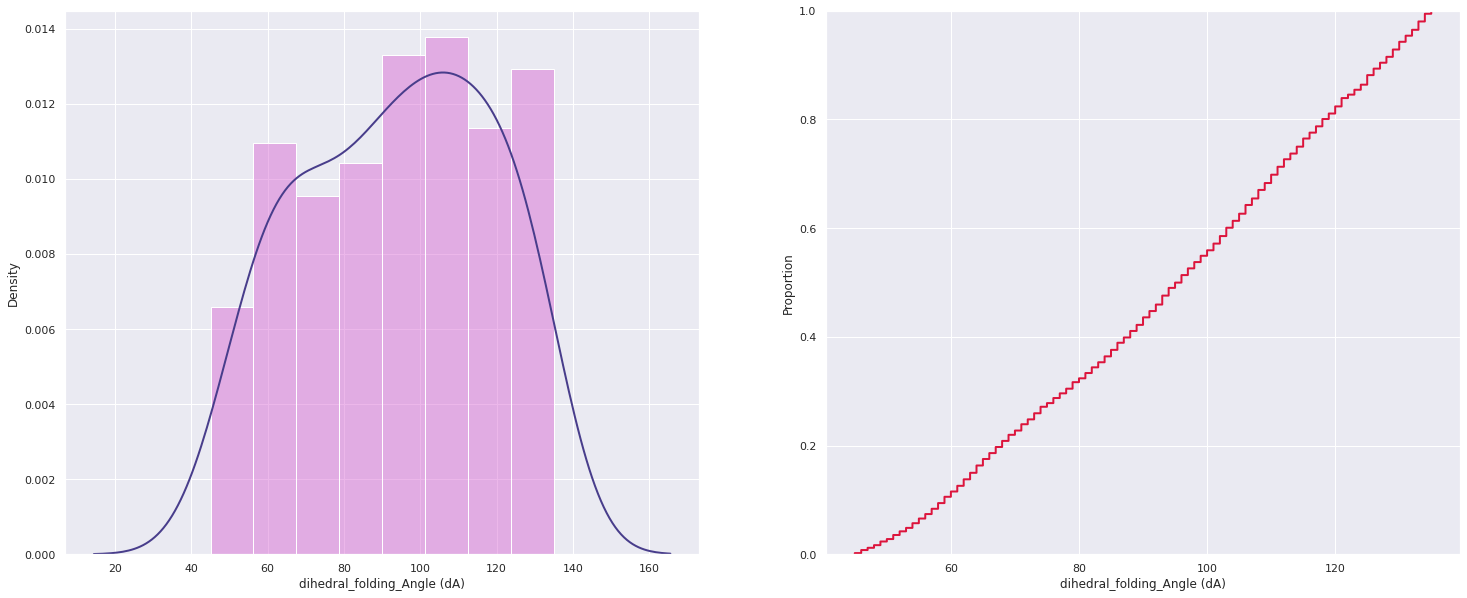

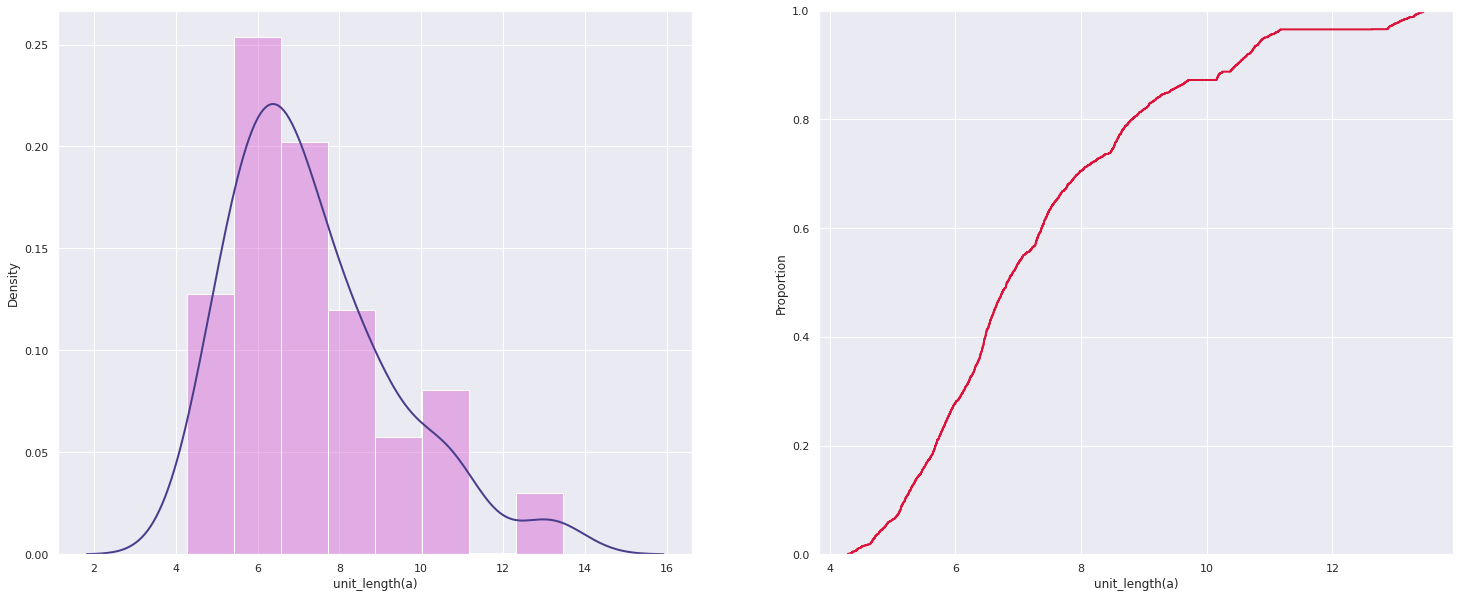

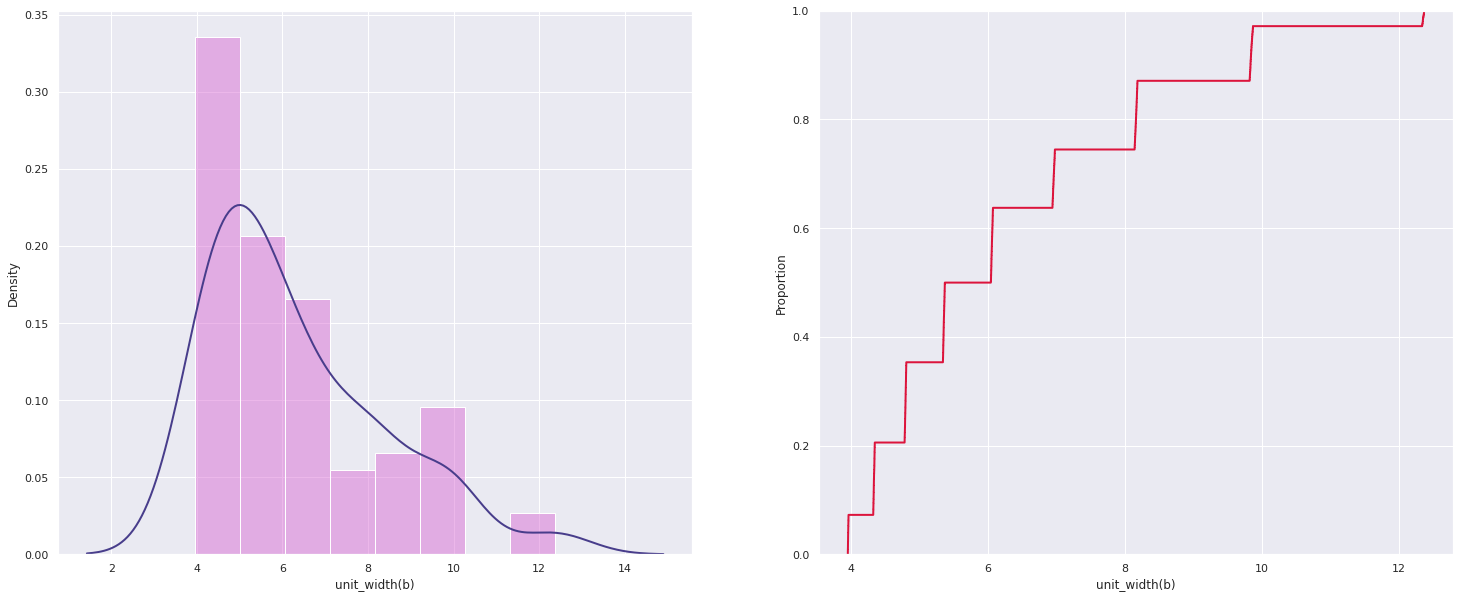

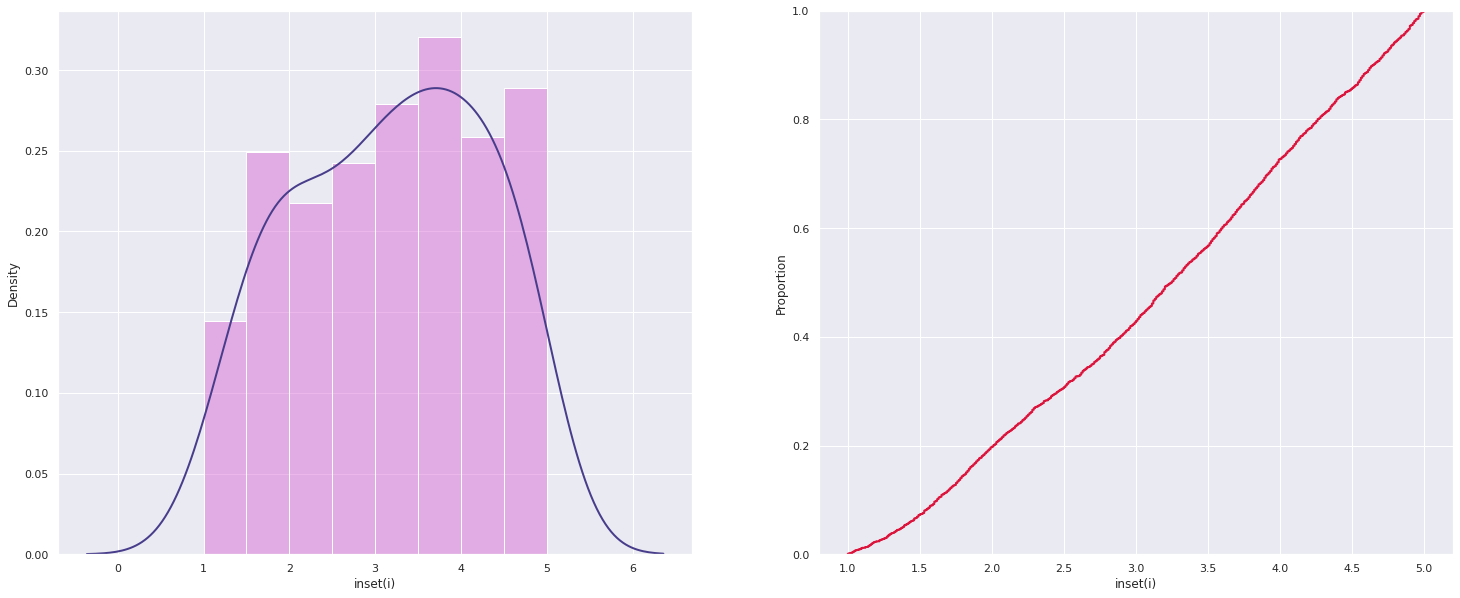

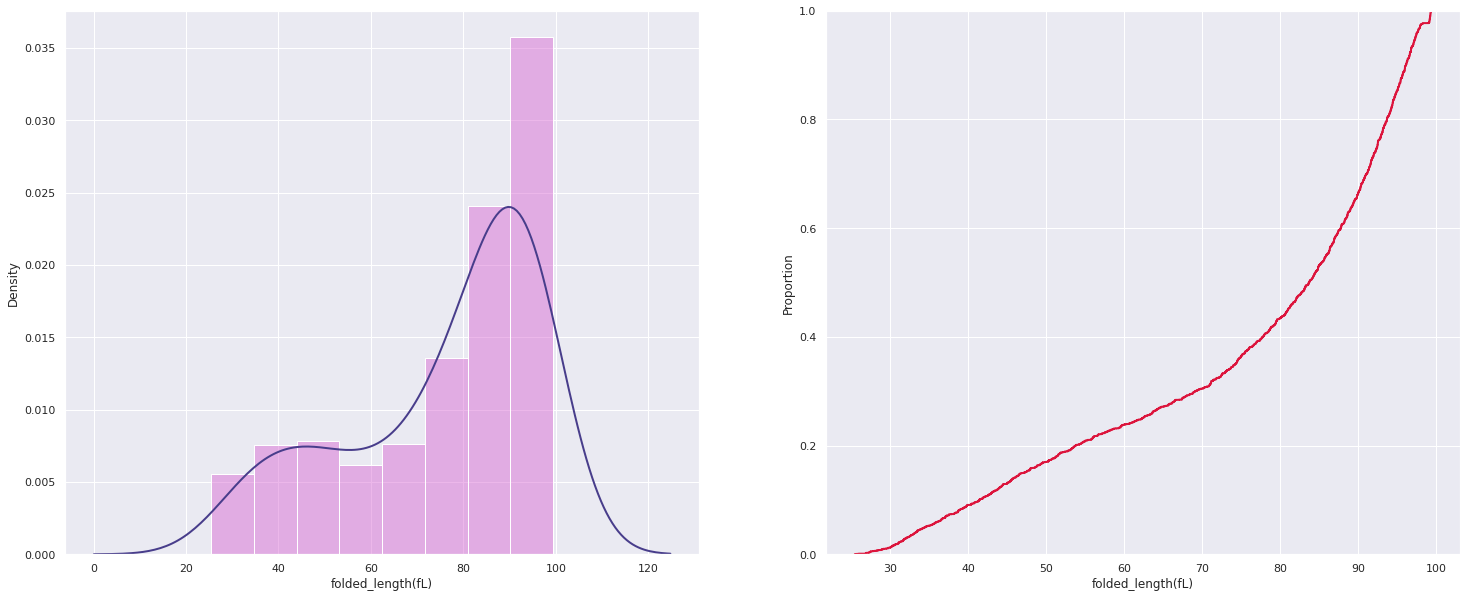

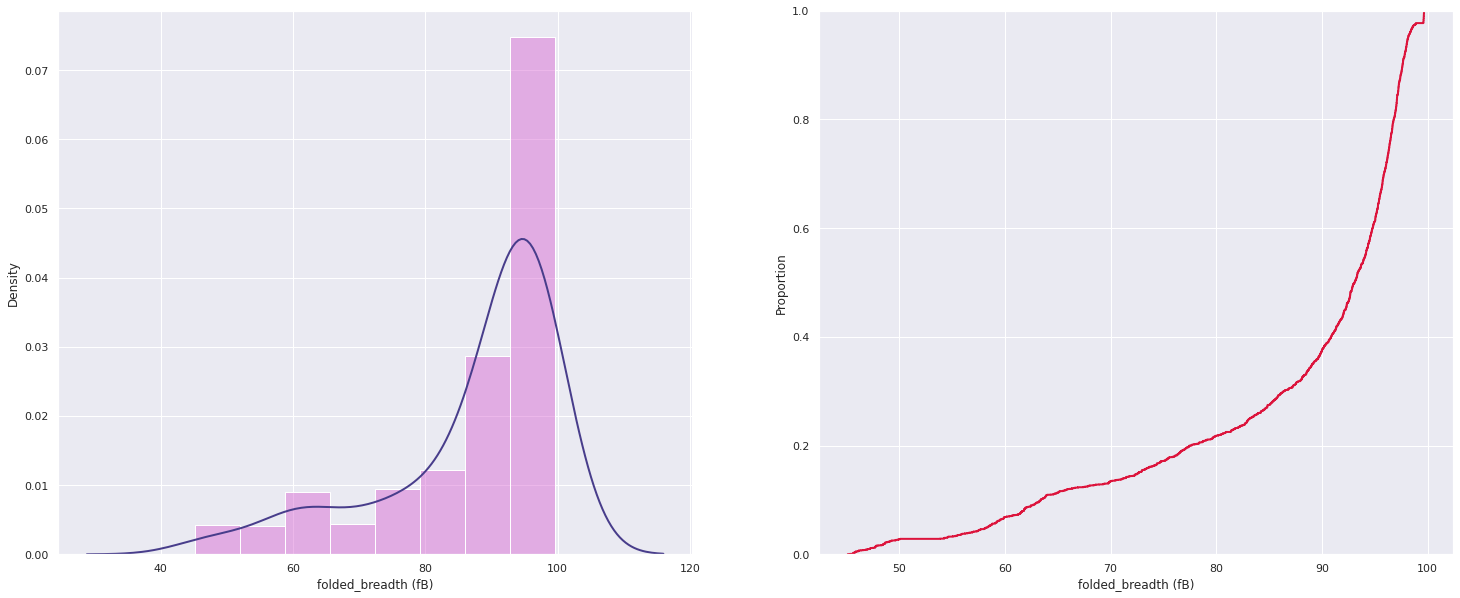

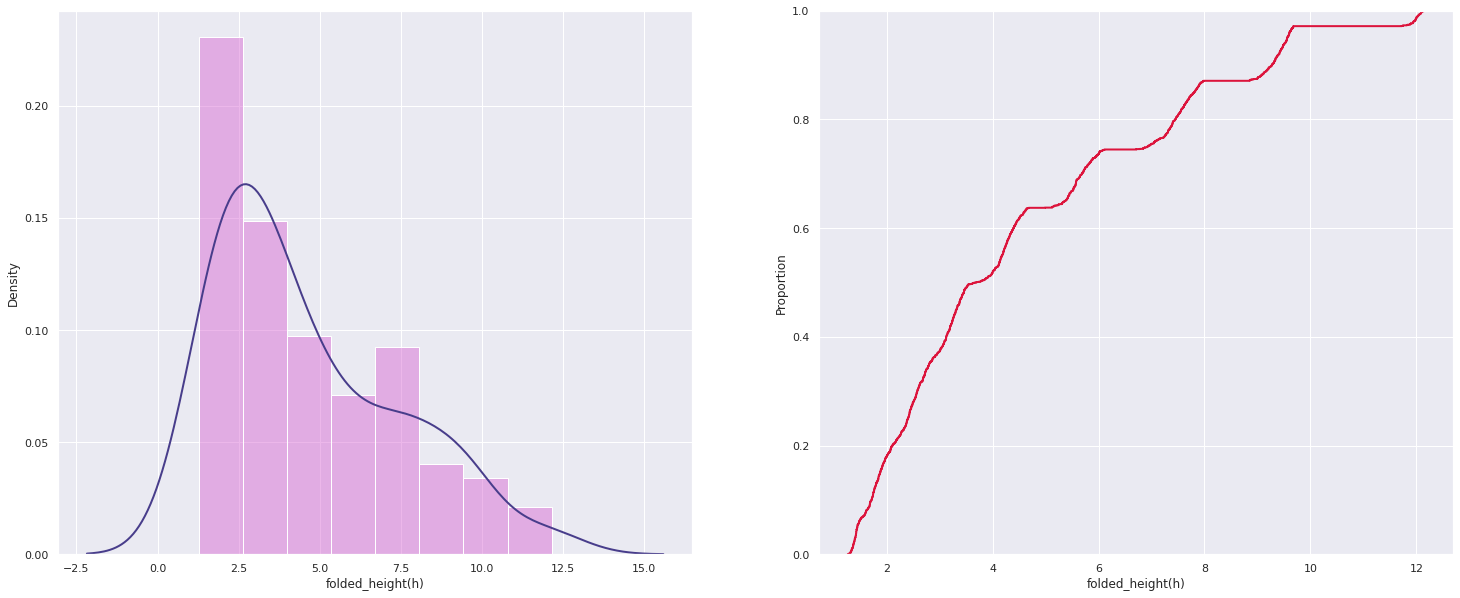

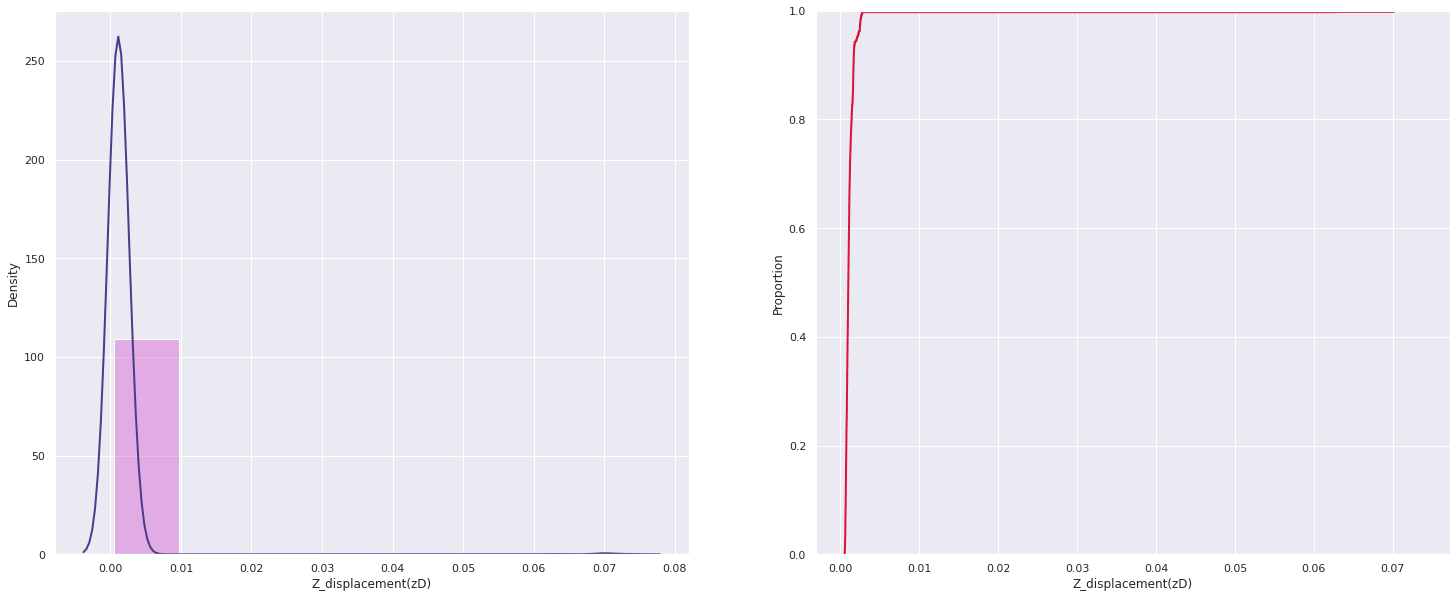

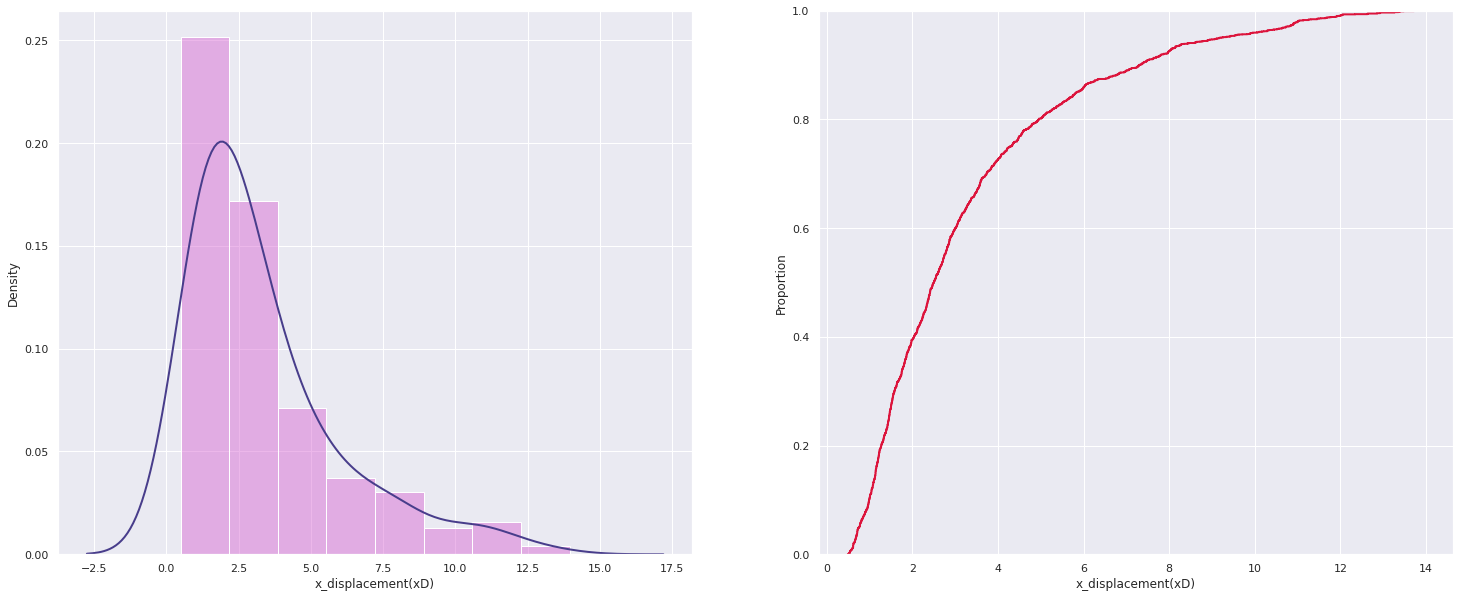

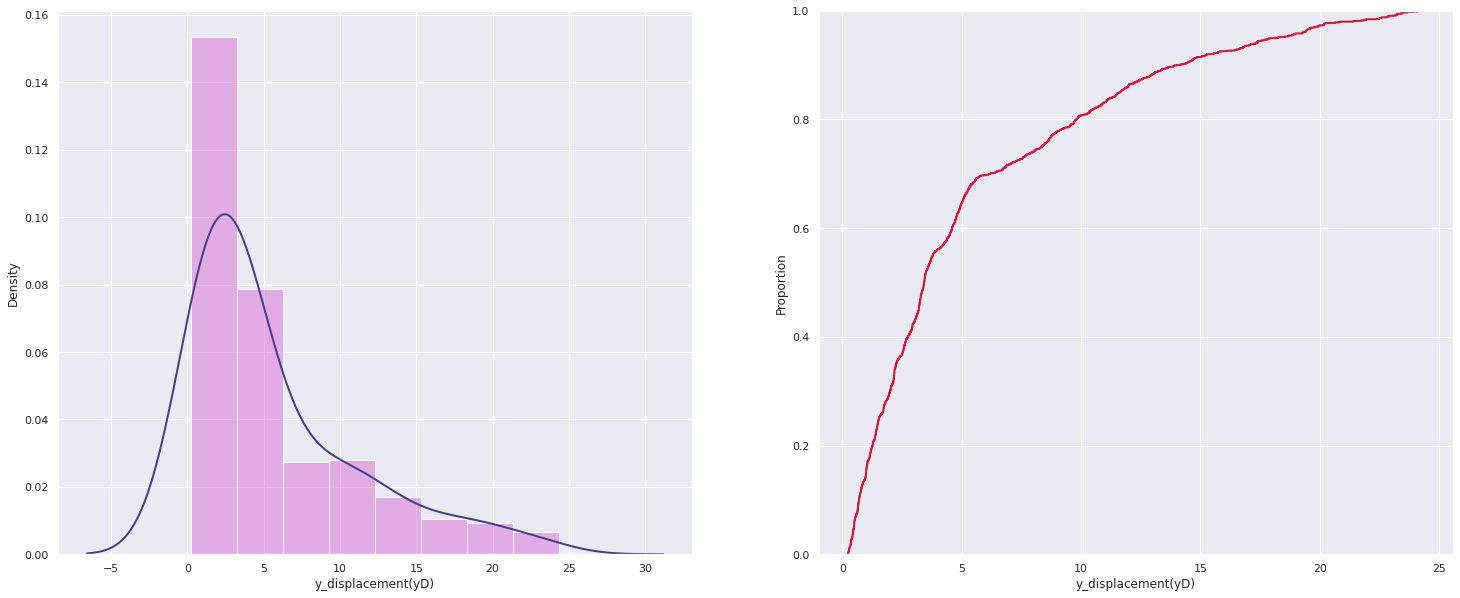

In [ ]:
for i in gh_data.columns.values:
  if (i == 'length(L)') | (i == 'breadth(B)') | (i == 'load(N)'):
    pass
  else: 
    fig, ax = plt.subplots(1,2, figsize = (25,10))
    sns.histplot(gh_data[i], color=color, stat = 'density', alpha=alpha, bins=8, ax=ax[0])
    sns.kdeplot(gh_data[i], color=color3, linewidth=2, bw_adjust=2, ax=ax[0])
    sns.ecdfplot(gh_data[i], color=color2, linewidth=2, ax = ax[1])
    #fig.savefig('gh_'+i, dpi = 150)


In [ ]:
gh_features = gh_data.loc[:, 'u_subdivision(u)':'folded_height(h)']

In [ ]:
gh_features.head()

u_subdivision(u)  v_subdivisions(v)  sector_angle(sA)  \
0              22.0               22.0             46.86   
1              24.0               18.0             48.24   
2              18.0               24.0             51.96   
3              14.0               22.0             59.76   
4               8.0               22.0             76.99   

   dihedral_folding_Angle (dA)  unit_length(a)  unit_width(b)  inset(i)  \
0                        118.0          6.2297         4.3518      4.26   
1                        134.0          7.4475         3.9600      4.96   
2                         96.0          5.2904         5.3744      3.26   
3                         82.0          5.2615         6.9536      2.65   
4                         46.0          4.6652        12.3688      1.05   

   folded_length(fL)  folded_breadth (fB)  folded_height(h)  
0          96.186814            95.891489          1.887984  
1          99.087662            99.672798          1.416303  
2          90.416144            91.179279          3.197396  
3          78.140893            84.641835          5.244282  
4          29.701270            45.628995         12.008313

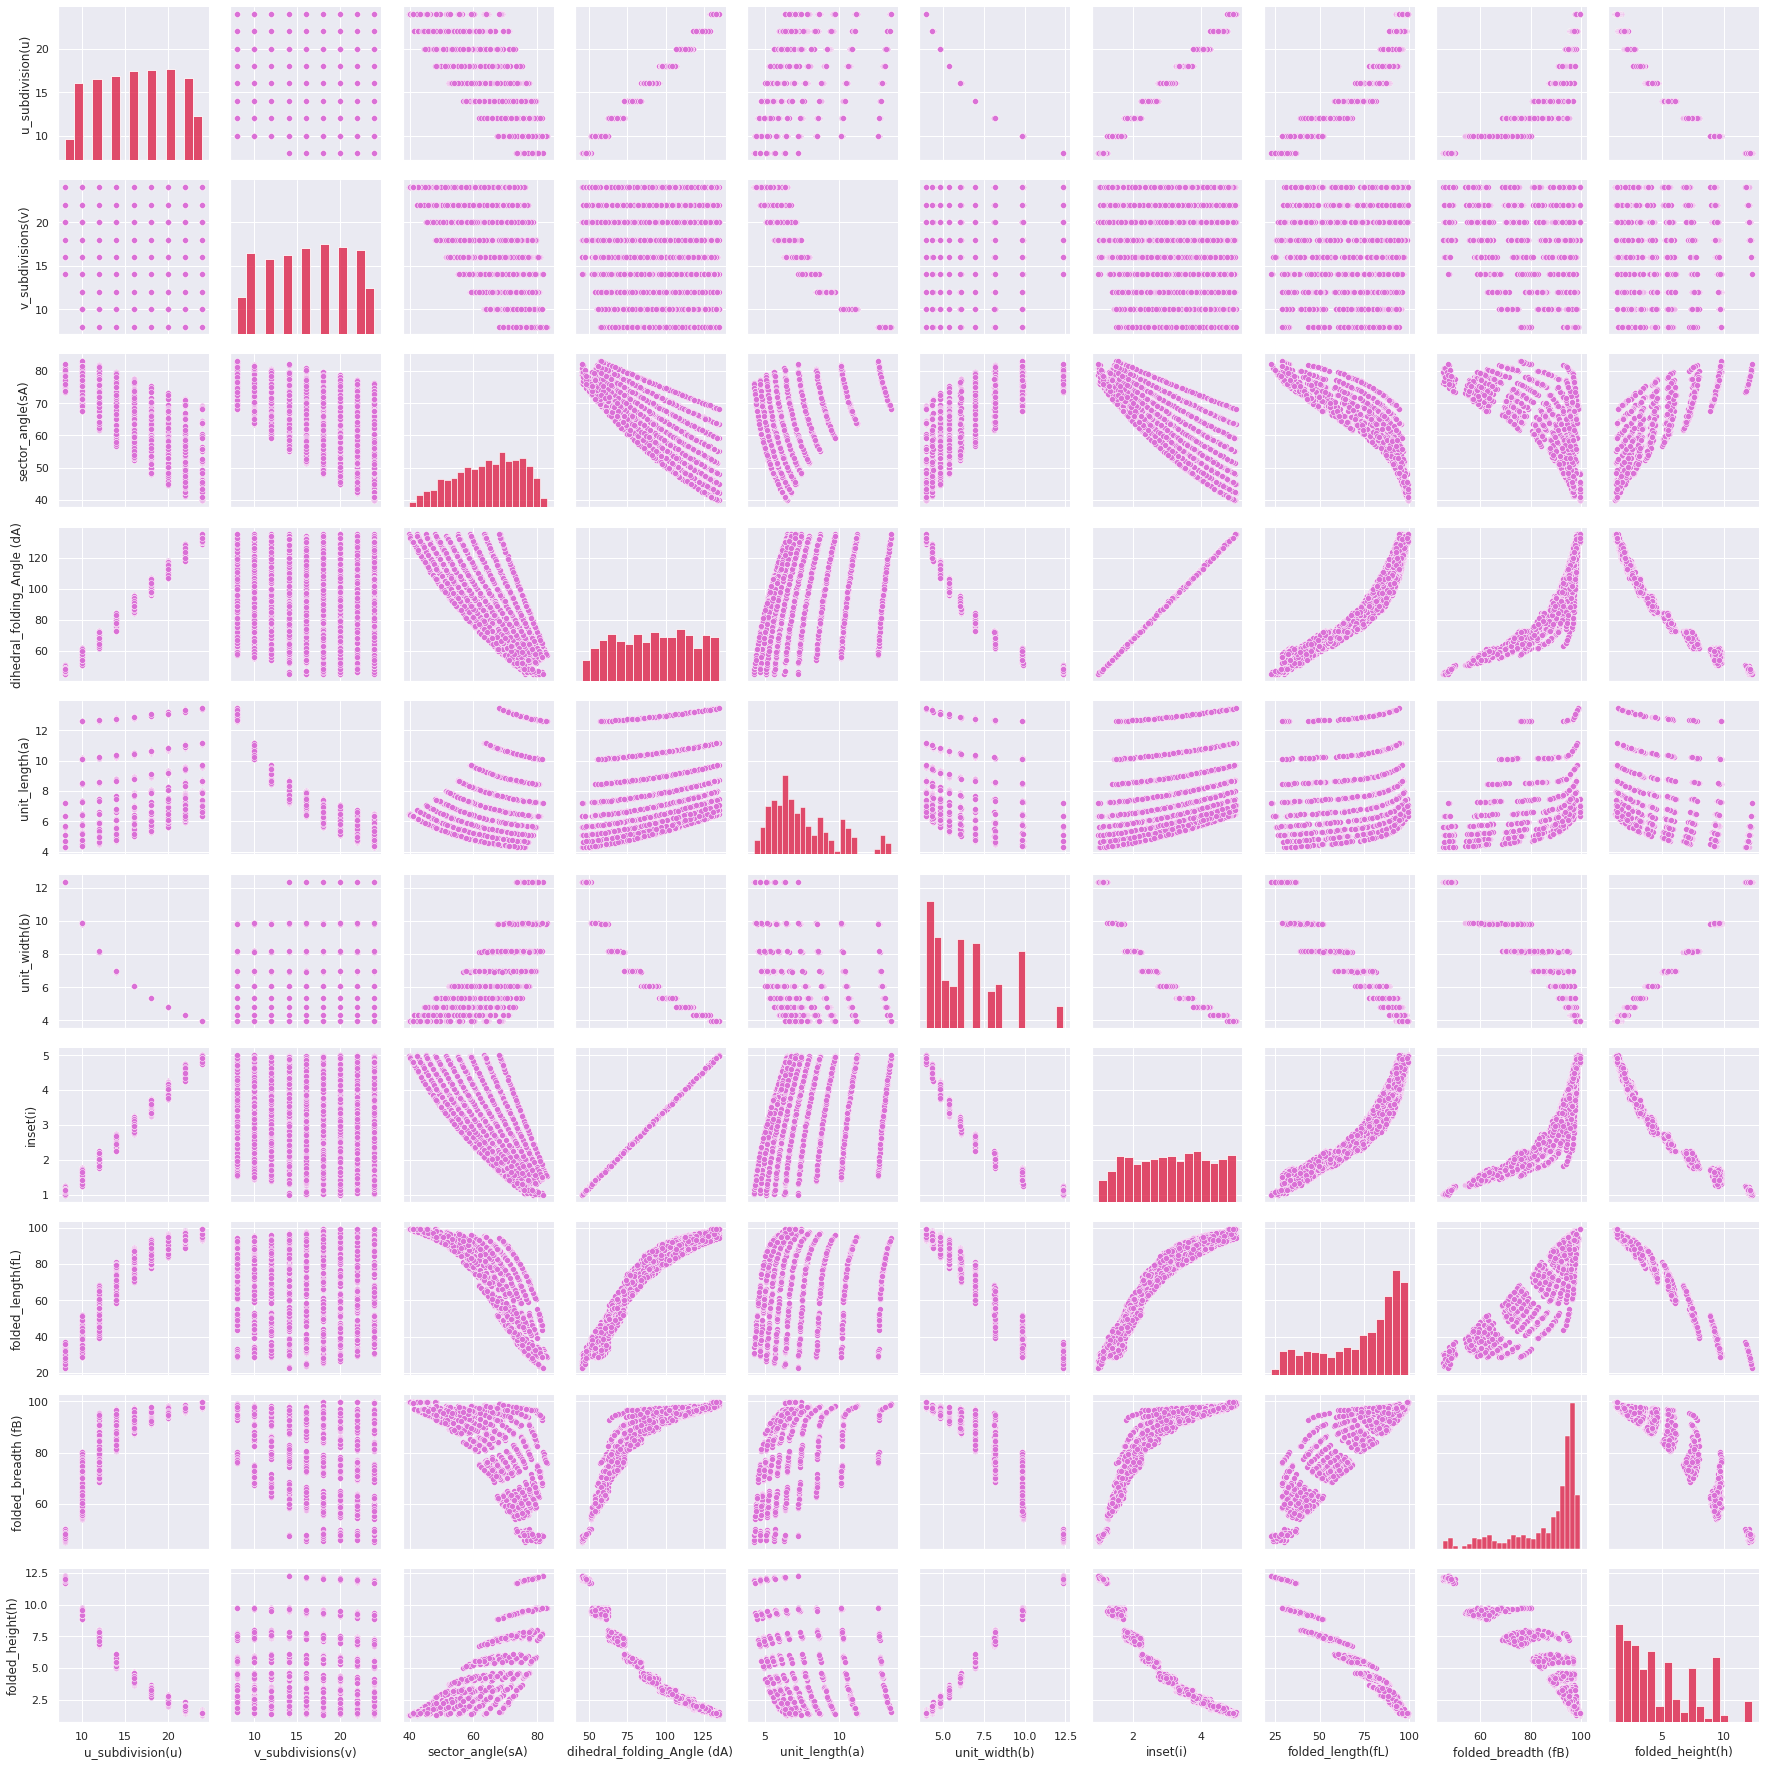

In [ ]:
sns.pairplot(data=gh_features, plot_kws = {'color': color}, diag_kws= {'color': color2})

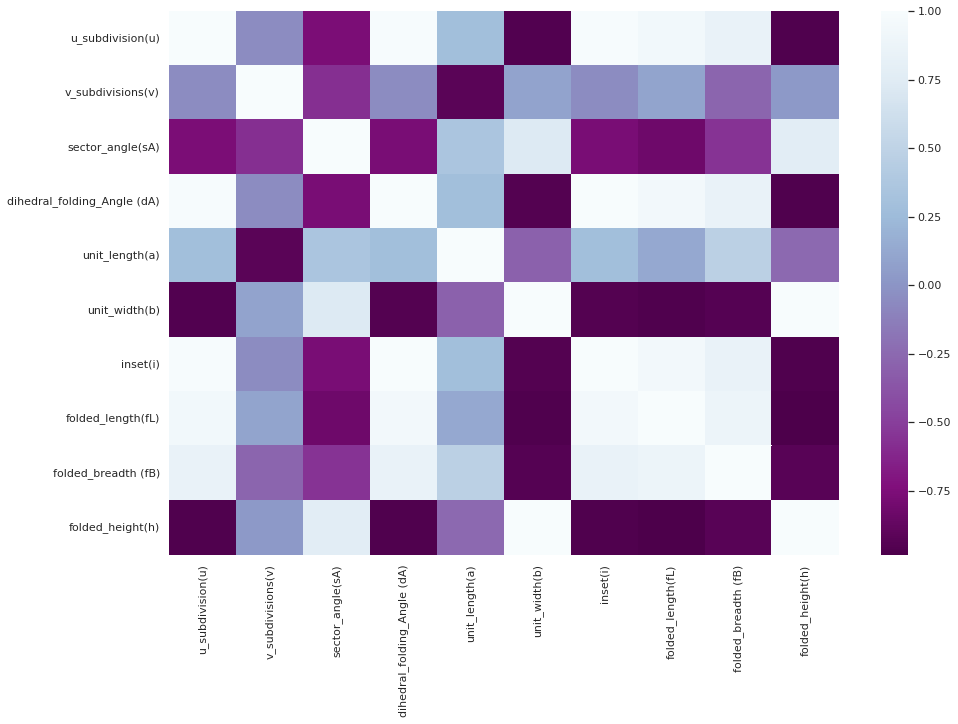

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(gh_features.corr(), cmap='BuPu_r', ax=ax)
#fig.savefig('gh_heatmap', dpi=300)

# **03_Kohonan-Datasets**

In [ ]:
url2='https://docs.google.com/spreadsheets/d/1P6G9bRKTpK87dVLlShAlp7SOPsb7cSF6/edit?usp=sharing&ouid=107202451381041489063&rtpof=true&sd=true'
url2='https://drive.google.com/uc?id=' + url2.split('/')[-2]

In [ ]:
khn_data = pd.read_excel(url2)
khn_data = khn_data[(khn_data['y_displacement(yD)']<15) & (khn_data['inset(i)']<3.1)]
print(khn_data.shape)
khn_data.head()

(2384, 16)


length(L)  breadth(B)  u_subdivision(u)  v_subdivisions(v)  \
0        100         100                16          19.767663   
1        100         100                16          19.465343   
2        100         100                16          19.284662   
3        100         100                14          18.964903   
4        100         100                14          18.988580   

   sector_angle(sA)  dihedral_folding_Angle (dA)  unit_length(a)  \
0                60                    91.313456        5.979010   
1                62                    87.743315        6.074795   
2                63                    83.727121        6.168295   
3                65                    79.898506        6.133483   
4                66                    77.327997        6.076877   

   unit_width(b)  inset(i)  folded_length(fL)  folded_breadth (fB)  \
0       6.474112  3.027172          77.897791            84.569733   
1       6.889835  2.848711          74.135235            82.480991   
2       7.373855  2.689977          69.727183            79.234744   
3       7.778016  2.552603          65.769681            76.385785   
4       8.054087  2.426159          63.032531            74.306218   

   folded_height(h)  load(N)  Z_displacement(zD)  x_displacement(xD)  \
0          4.553268      100            0.002668            2.244745   
1          5.110569      100            0.002194            2.457433   
2          5.800908      100            0.001954            2.159995   
3          6.301406      100            0.001806            1.972367   
4          6.727807      100            0.001780            1.846252   

   y_displacement(yD)  
0            4.450134  
1            6.325538  
2            8.165344  
3            9.767968  
4           10.849723

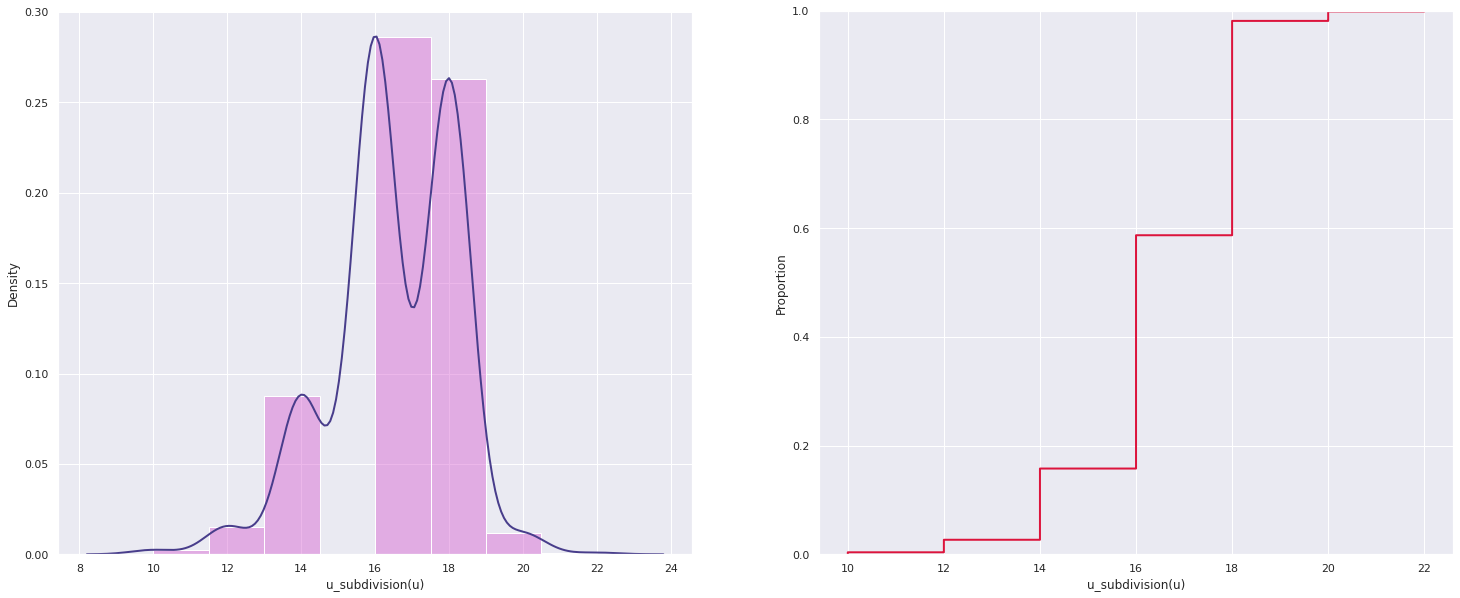

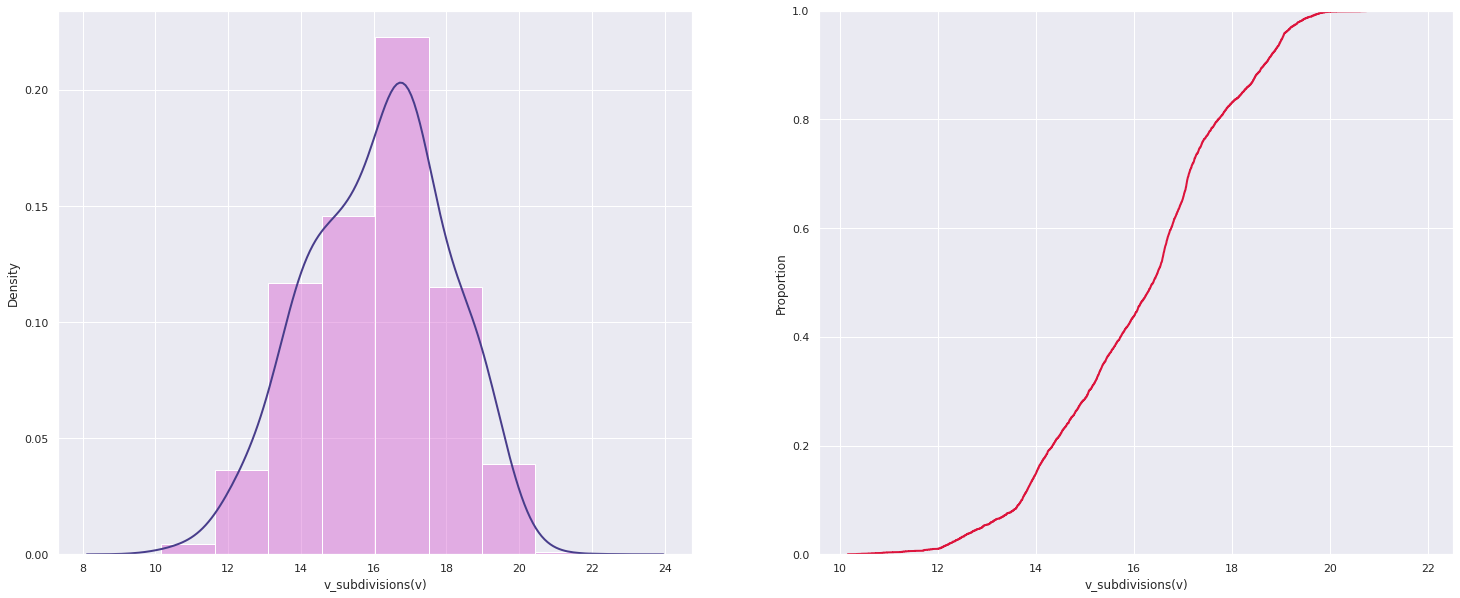

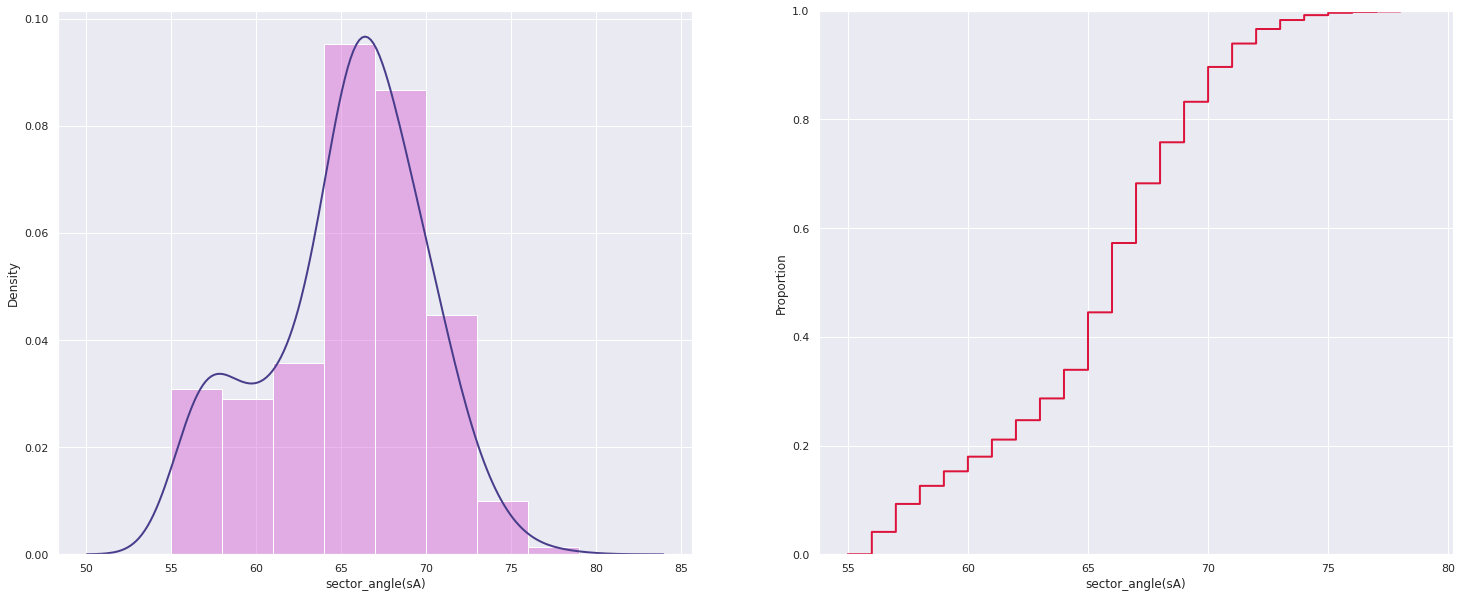

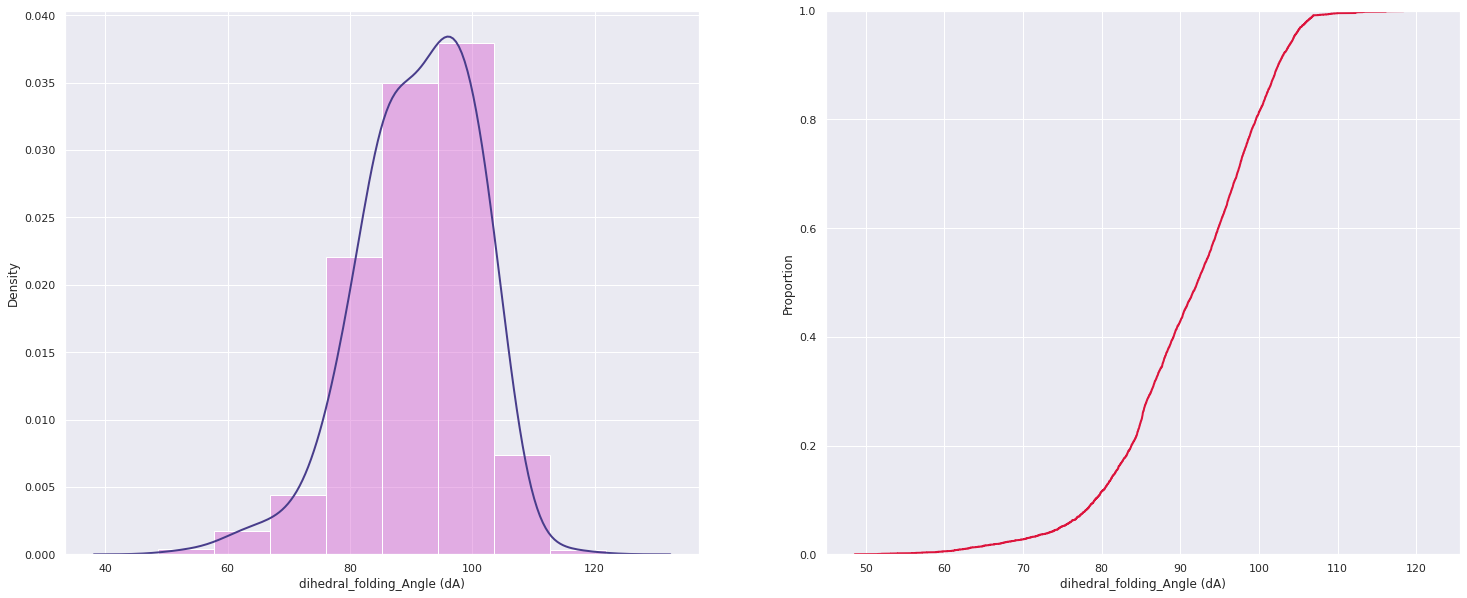

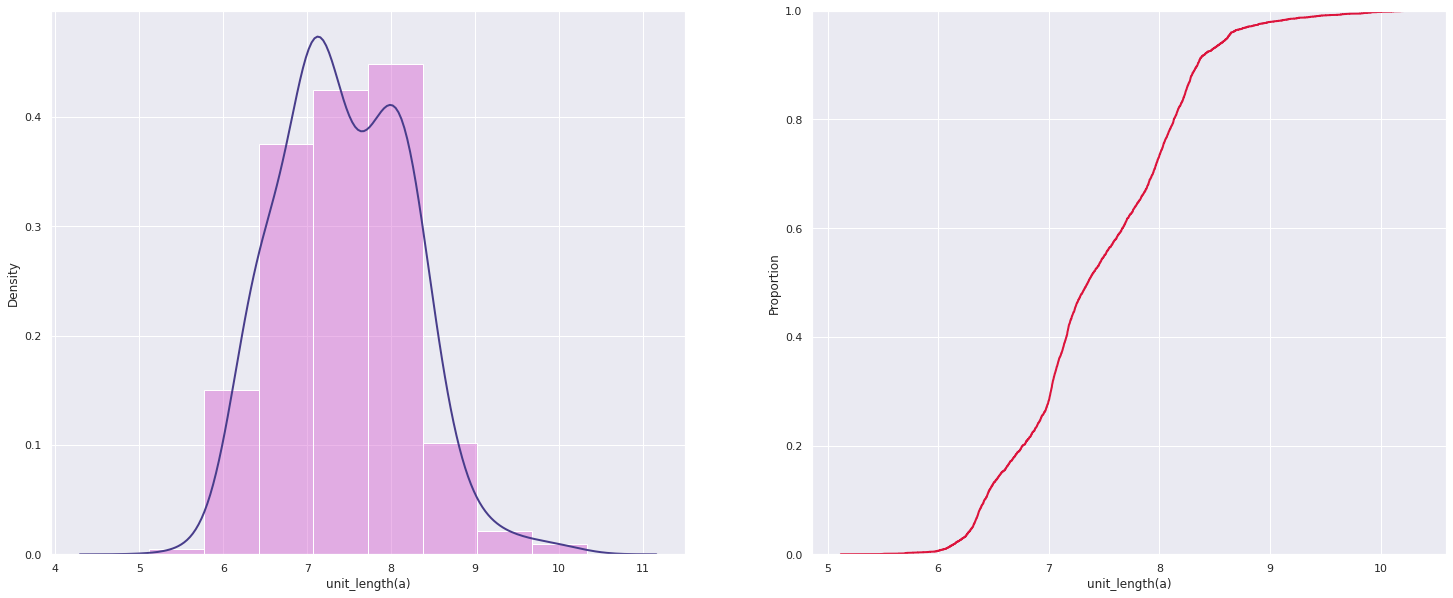

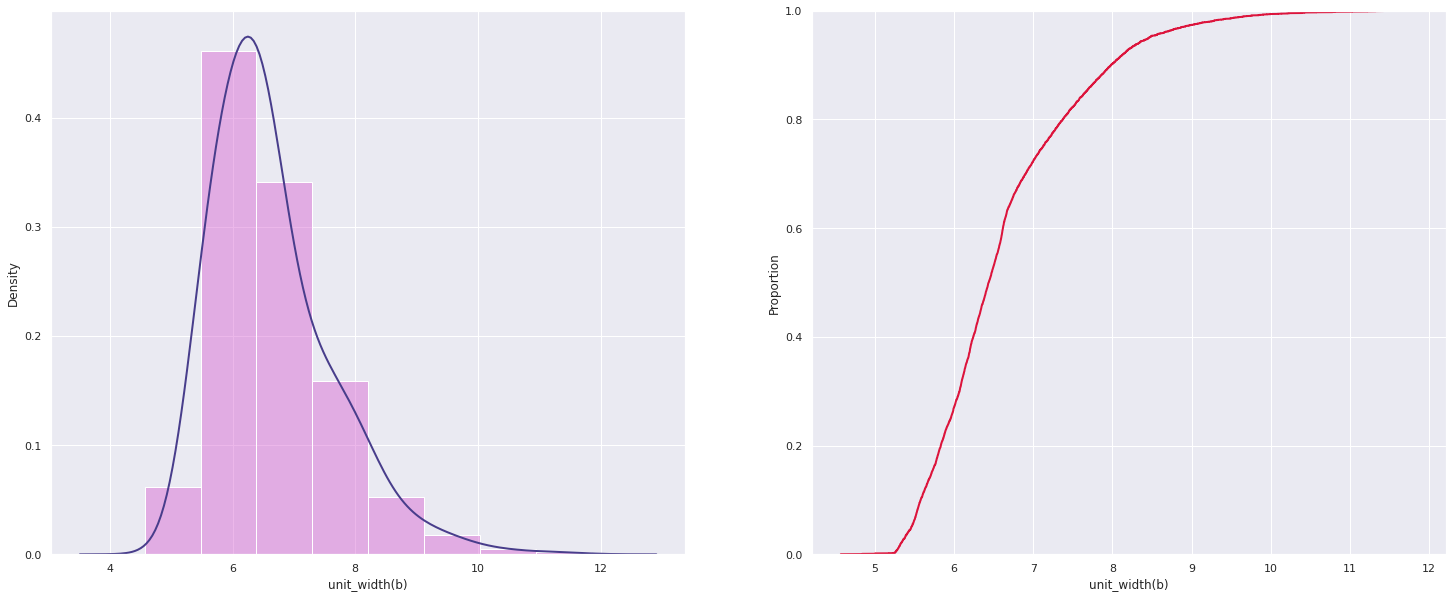

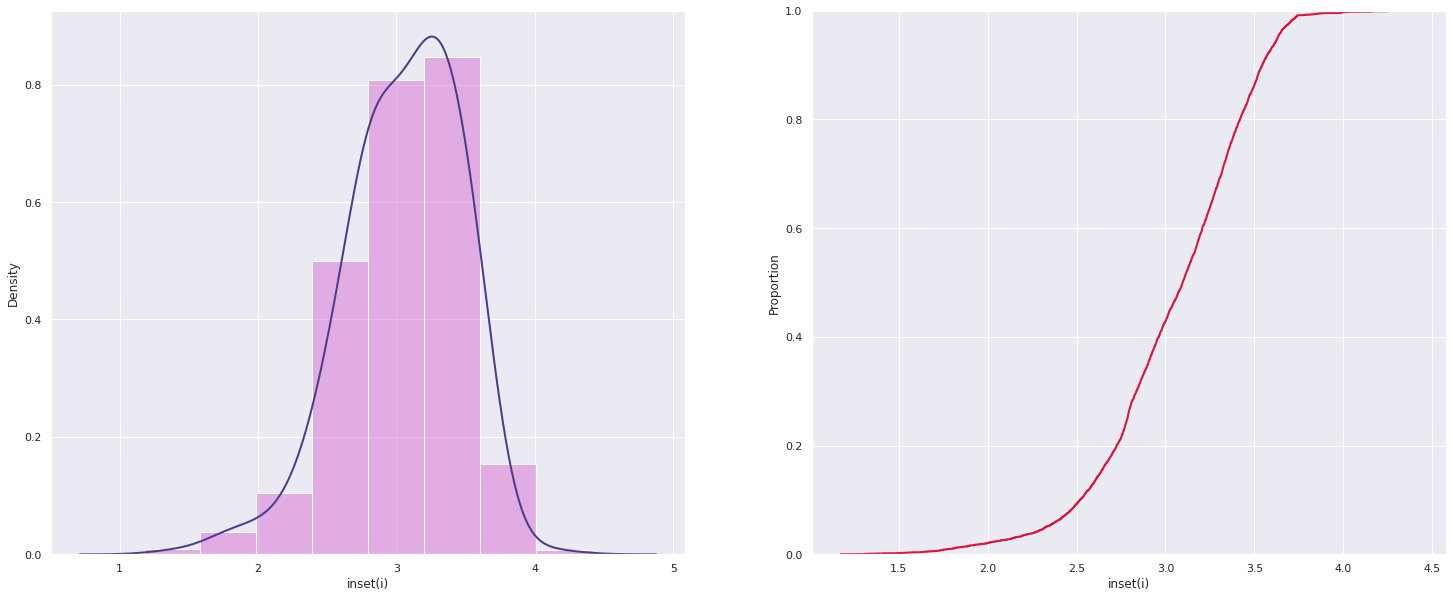

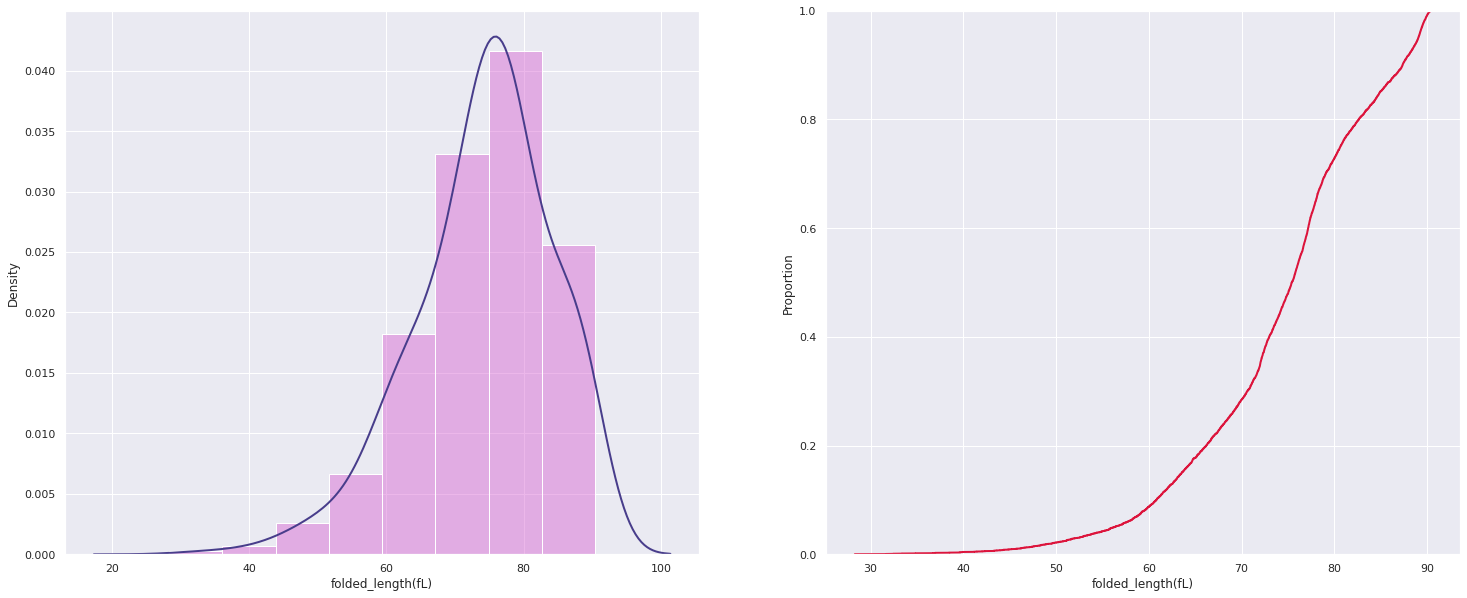

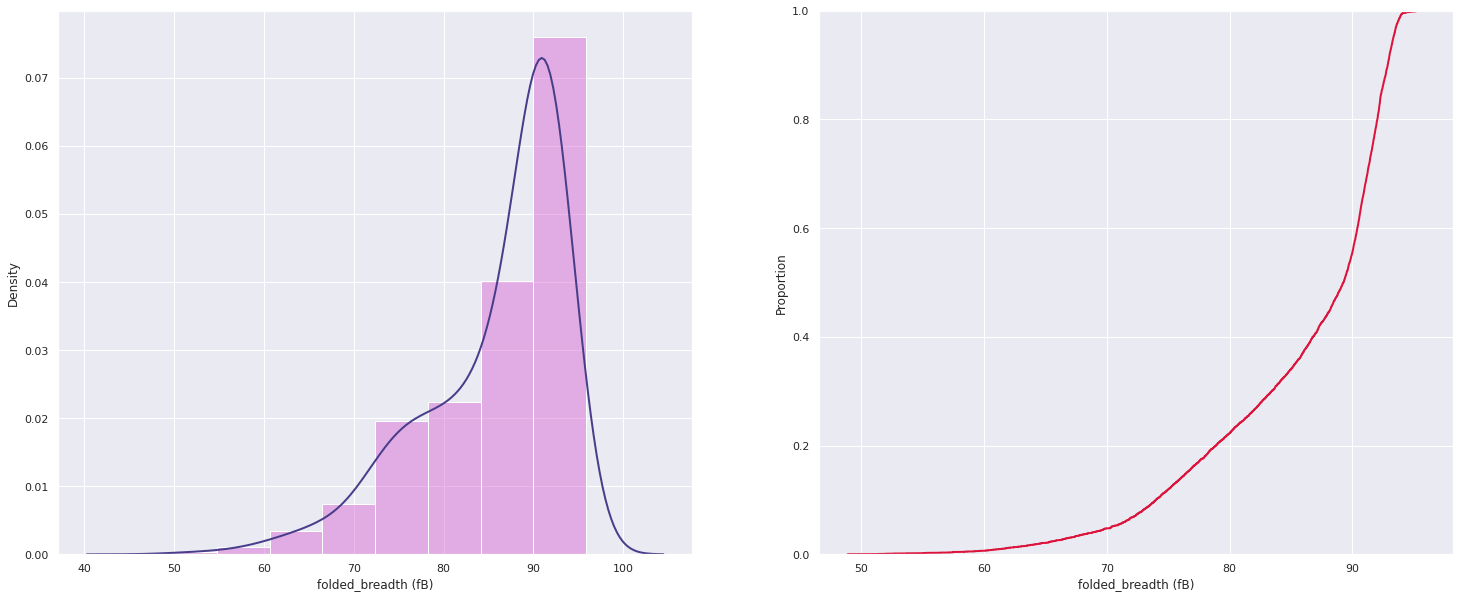

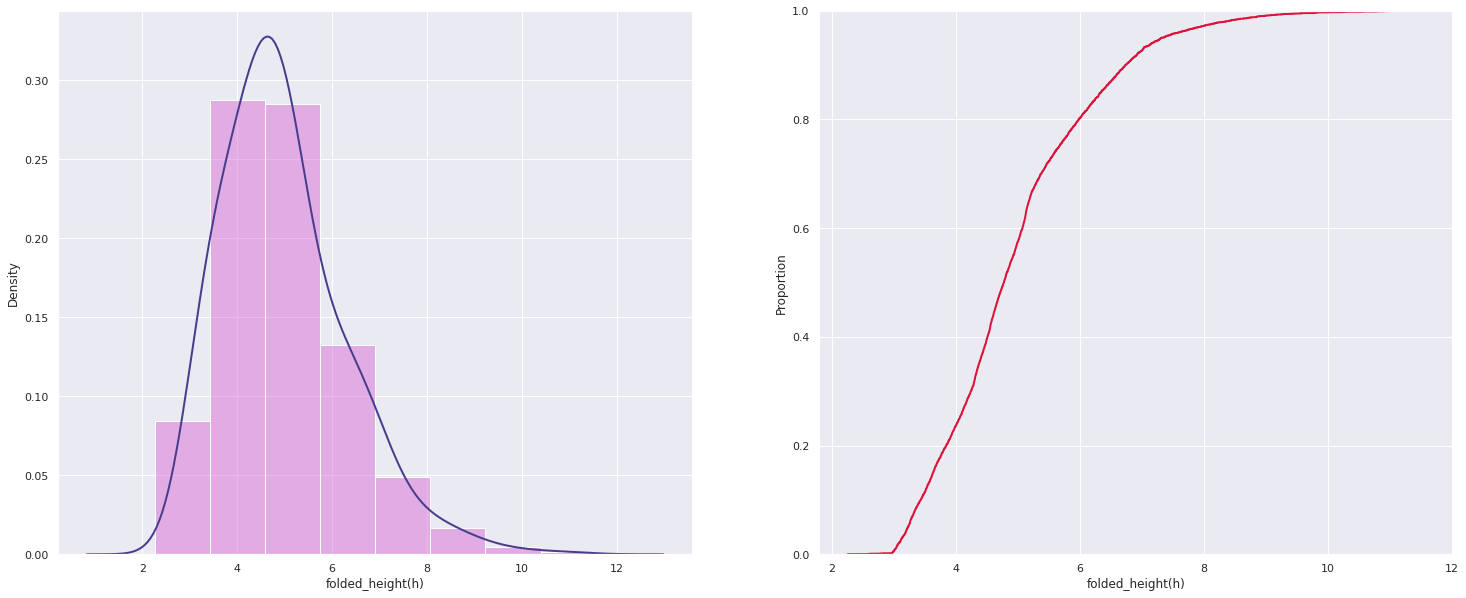

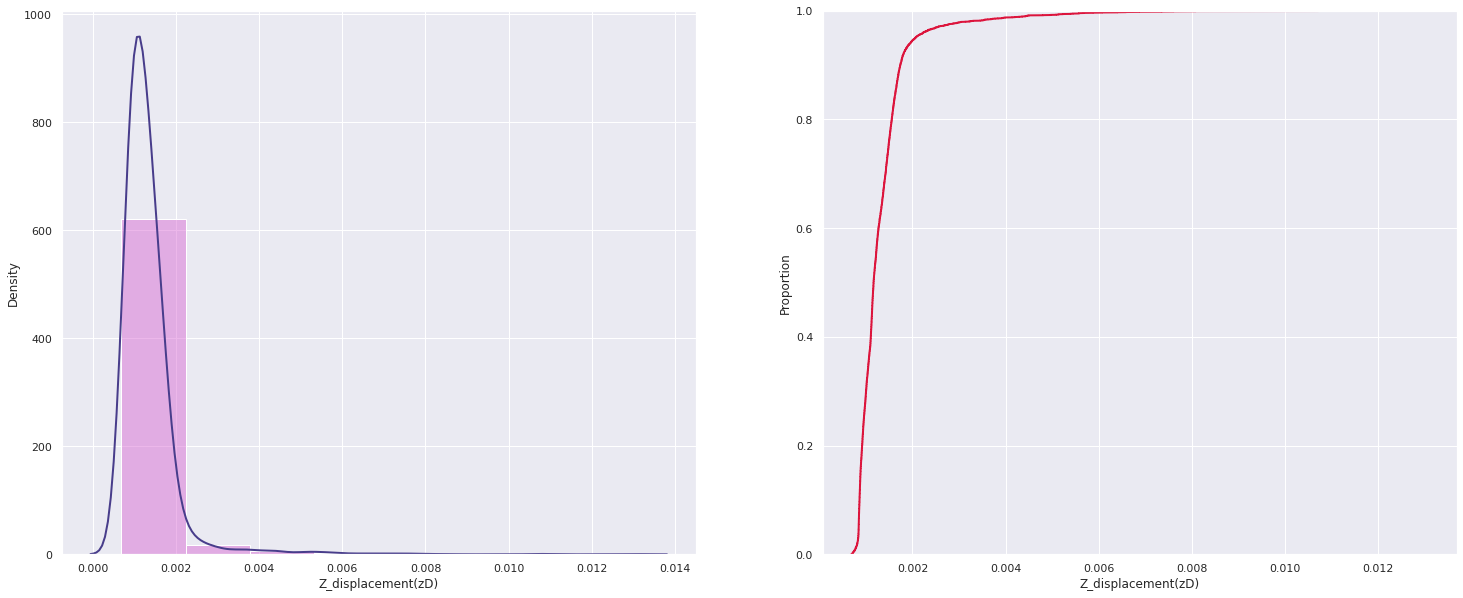

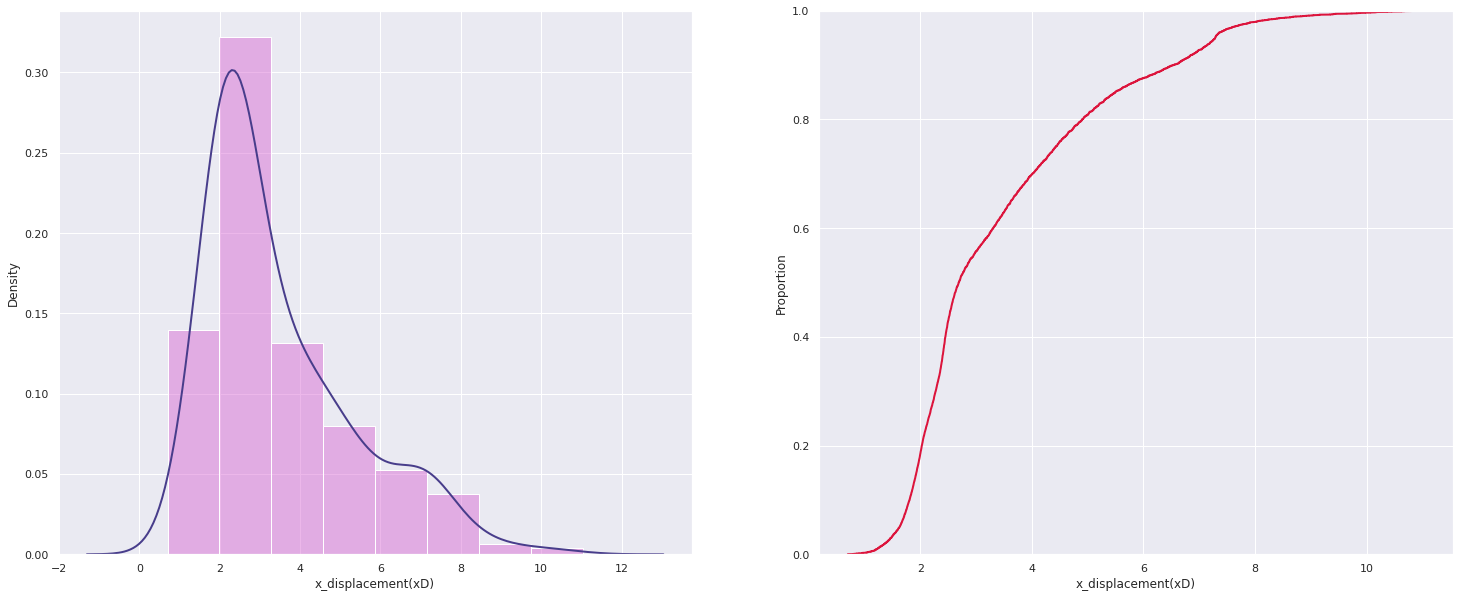

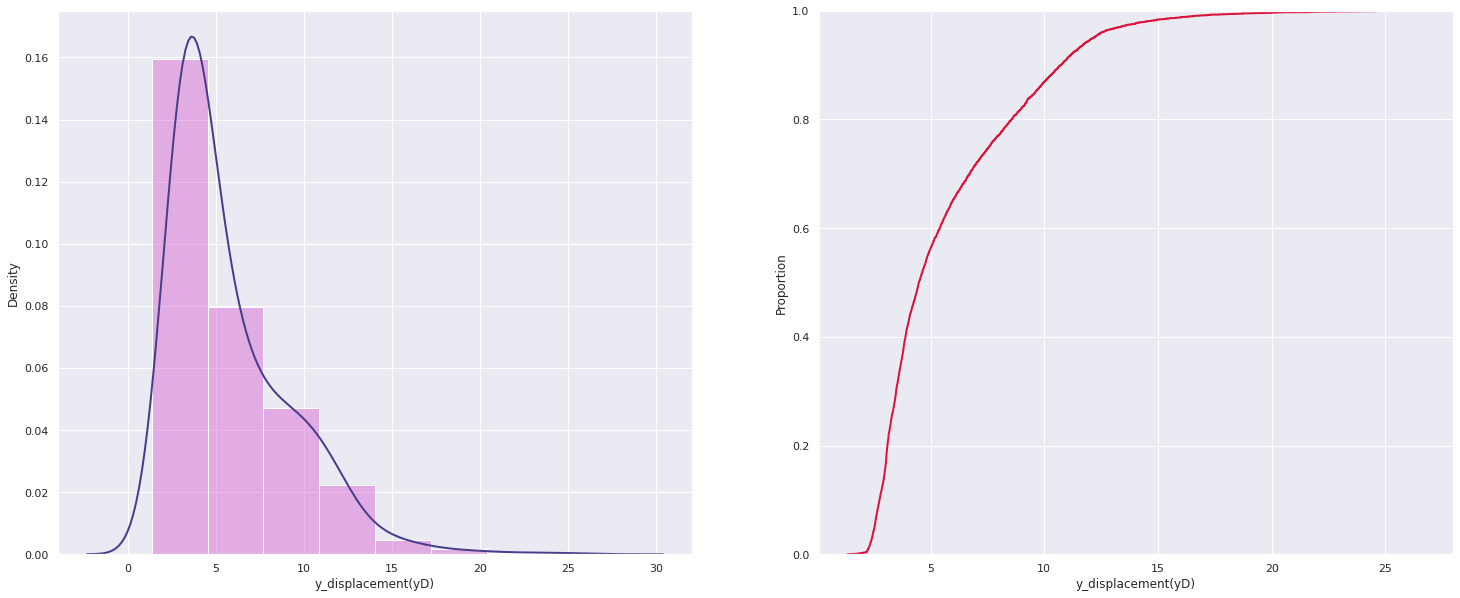

In [ ]:
for i in khn_data.columns.values:
  if (i == 'length(L)') | (i == 'breadth(B)') | (i == 'load(N)'):
    pass
  else: 
    fig, ax = plt.subplots(1,2, figsize = (25,10))
    sns.histplot(khn_data[i], color=color, stat = 'density', alpha=alpha, bins=8, ax=ax[0])
    sns.kdeplot(khn_data[i], color=color3, linewidth=2, bw_adjust=2, ax=ax[0])
    sns.ecdfplot(khn_data[i], color=color2, linewidth=2, ax = ax[1])
    #fig.savefig('khn_'+i, dpi = 150)

In [ ]:
khn_features =khn_data.loc[:, 'u_subdivision(u)':'folded_height(h)']


In [ ]:
khn_features.head()

u_subdivision(u)  v_subdivisions(v)  sector_angle(sA)  \
0                16          19.767663                60   
1                16          19.465343                62   
2                16          19.284662                63   
3                14          18.964903                65   
4                14          18.988580                66   

   dihedral_folding_Angle (dA)  unit_length(a)  unit_width(b)  inset(i)  \
0                    91.313456        5.979010       6.474112  3.027172   
1                    87.743315        6.074795       6.889835  2.848711   
2                    83.727121        6.168295       7.373855  2.689977   
3                    79.898506        6.133483       7.778016  2.552603   
4                    77.327997        6.076877       8.054087  2.426159   

   folded_length(fL)  folded_breadth (fB)  folded_height(h)  
0          77.897791            84.569733          4.553268  
1          74.135235            82.480991          5.110569  
2          69.727183            79.234744          5.800908  
3          65.769681            76.385785          6.301406  
4          63.032531            74.306218          6.727807

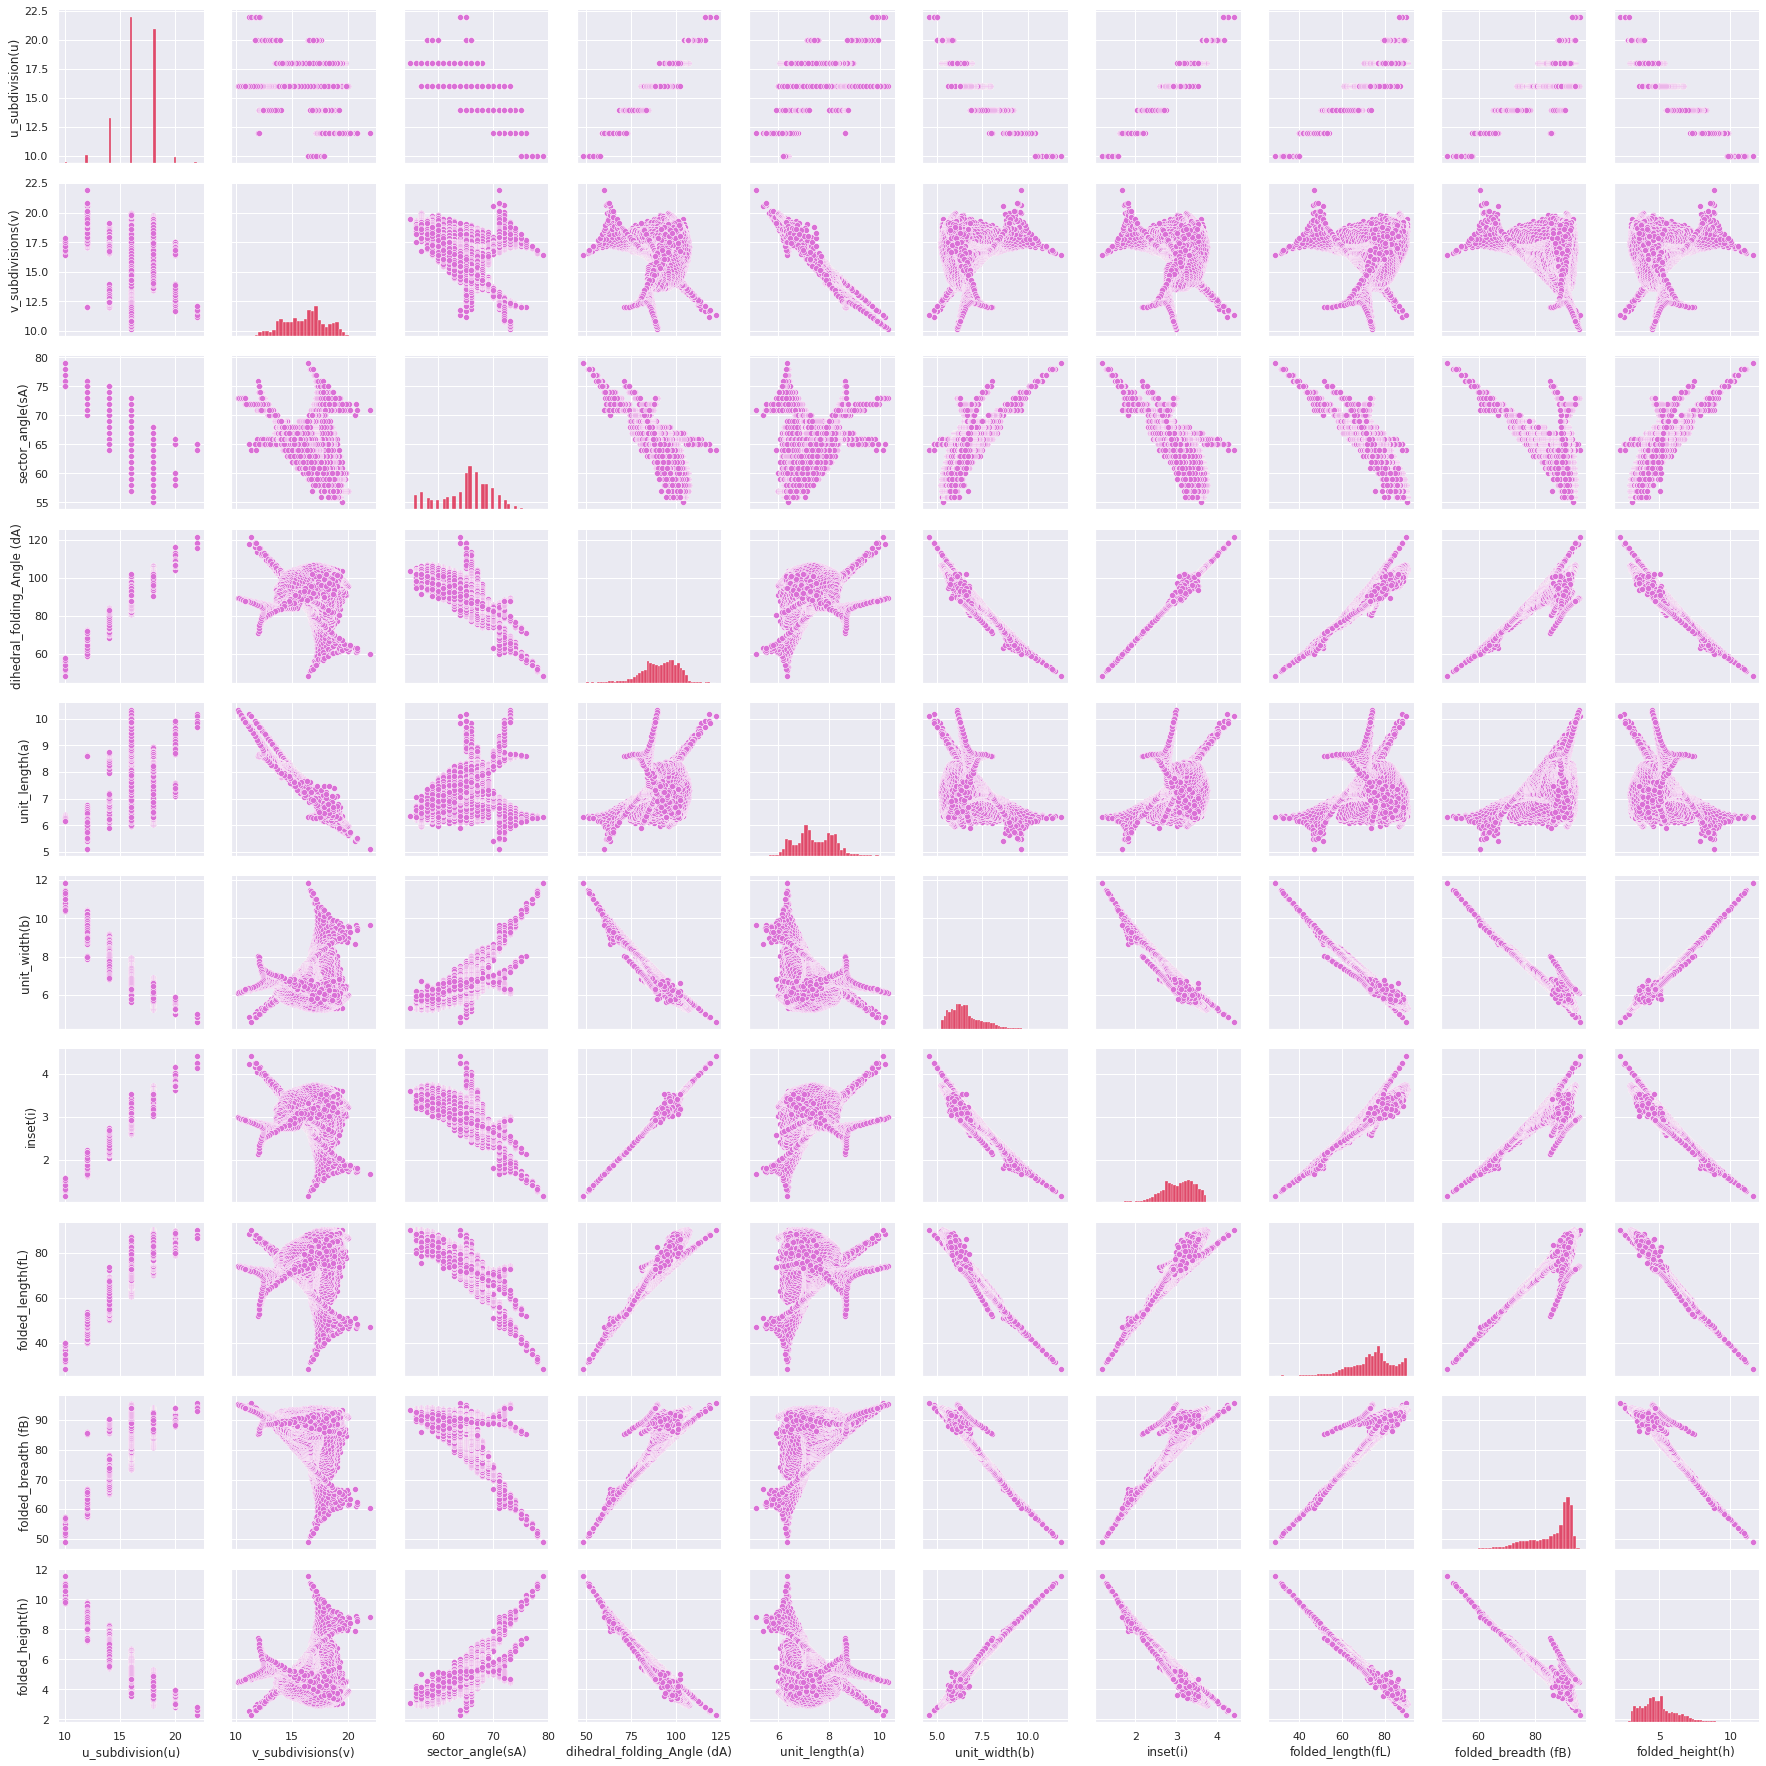

In [ ]:
sns.pairplot(data=khn_features, plot_kws = {'color': color}, diag_kws= {'color': color2})


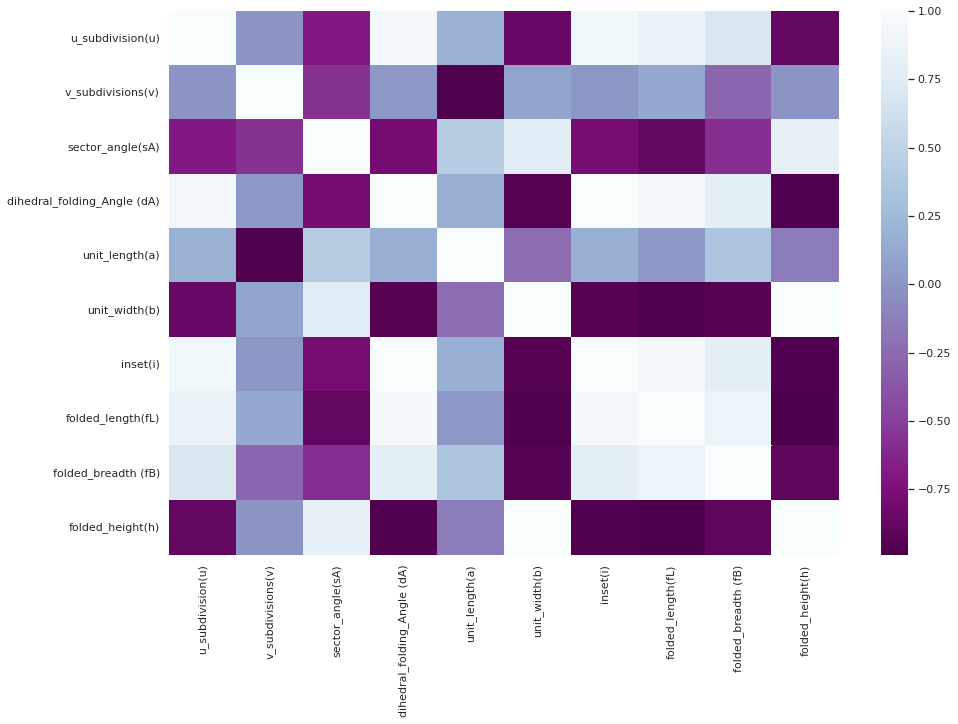

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(khn_features.corr(), cmap='BuPu_r', ax=ax)
#fig.savefig('khn_heatmap', dpi=300)

In [ ]:
# fig, ax = plt.subplots(figsize=(30,15))
# sns.swarmplot(data=df_default, ax = ax)

# **04_Compare Datasets**

In [ ]:
alpha2 = 0.3


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


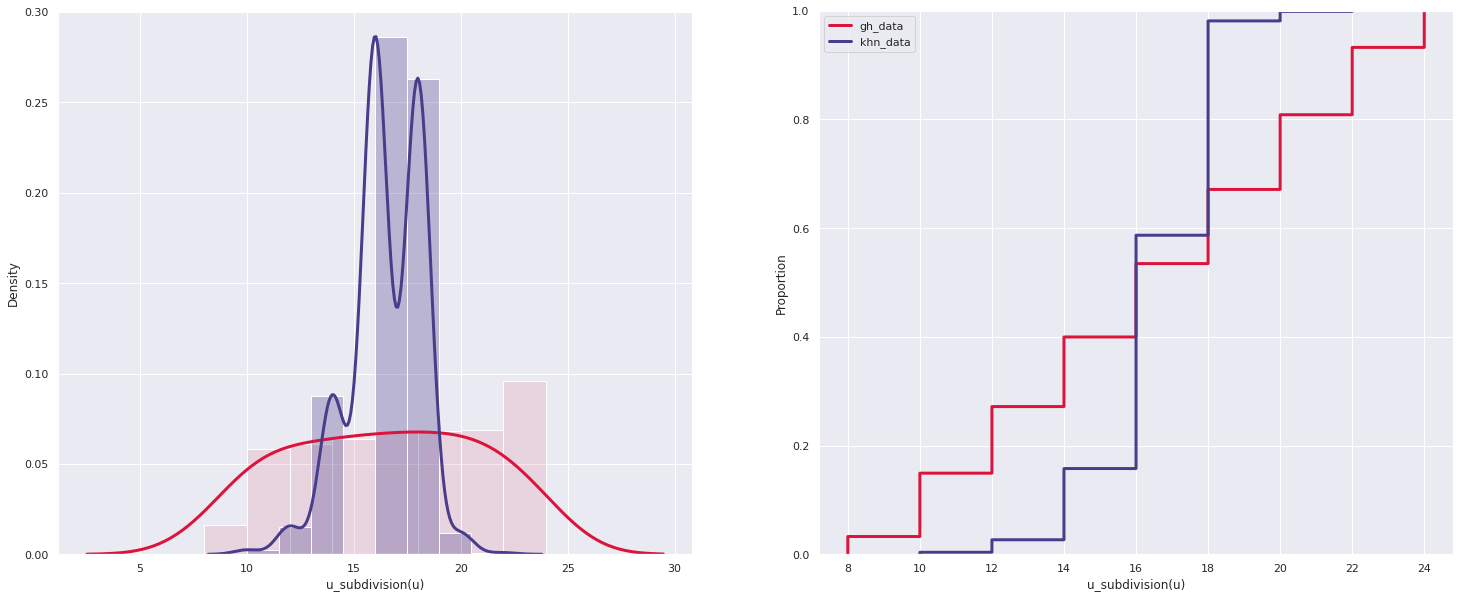

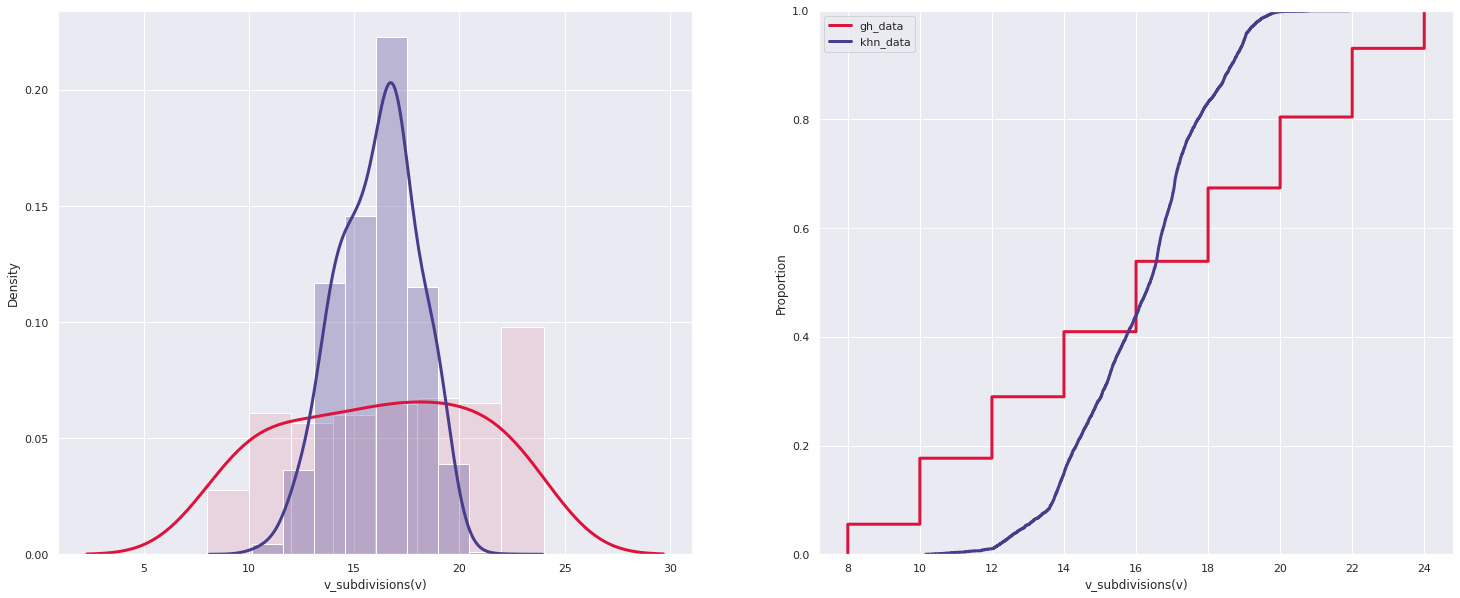

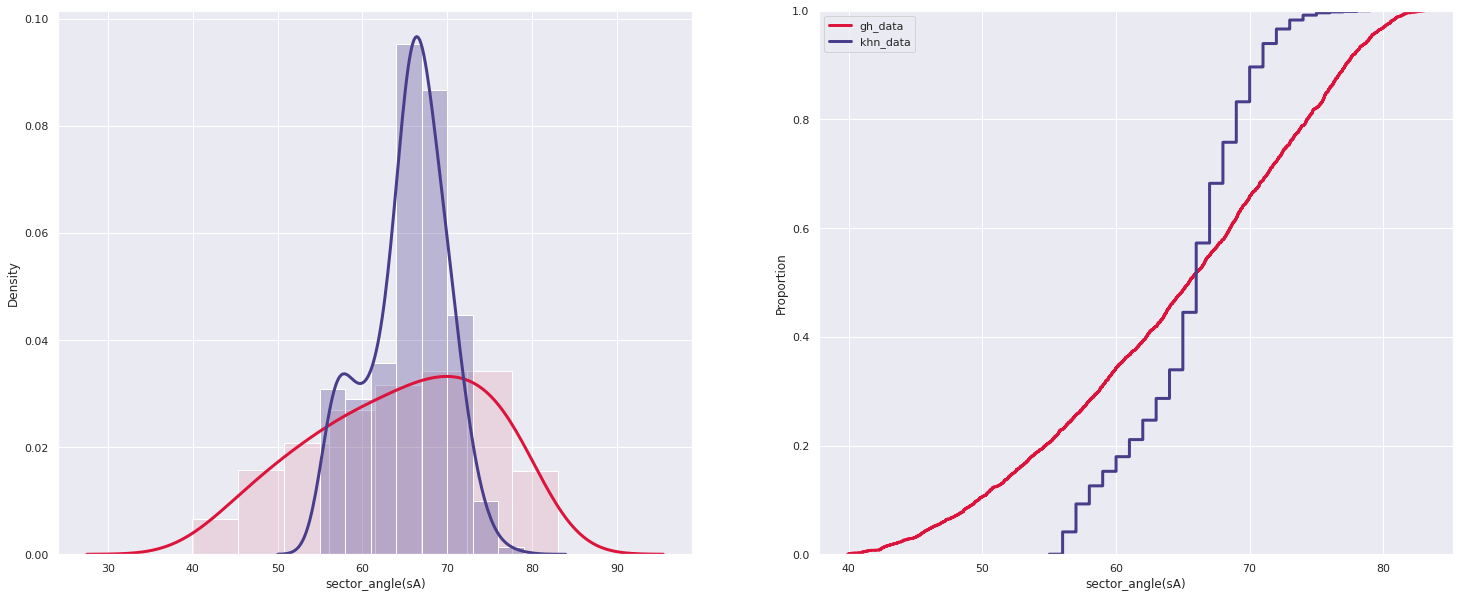

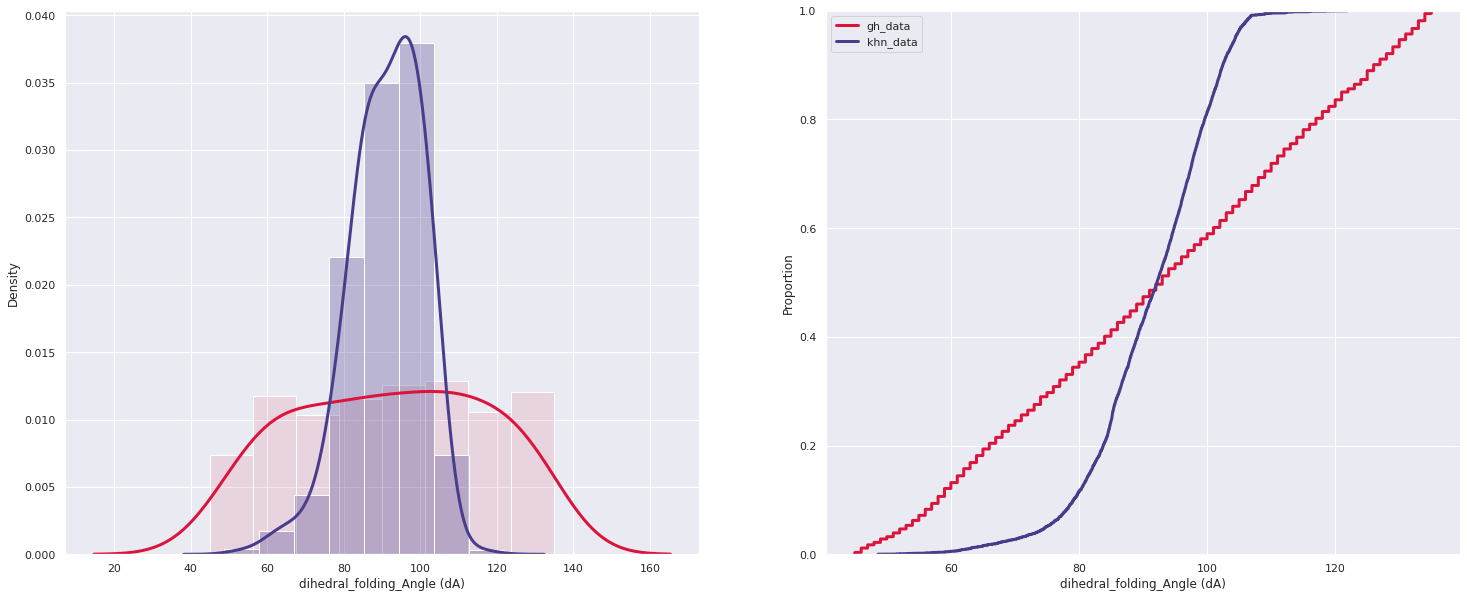

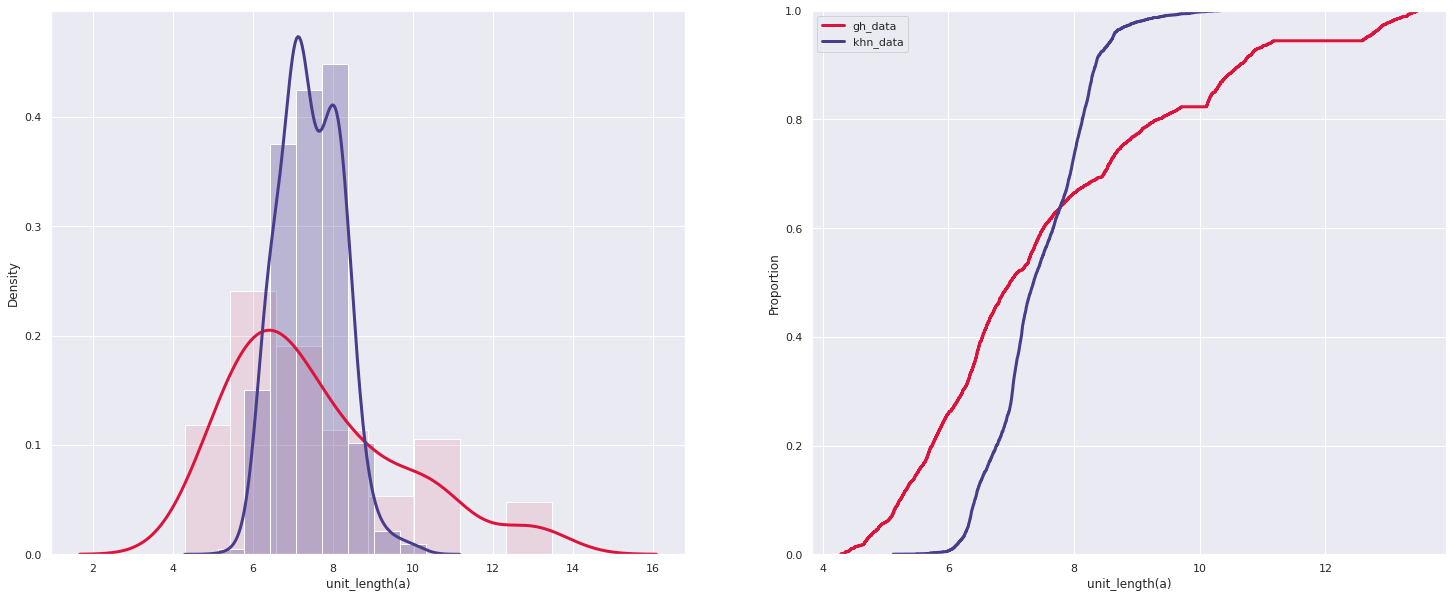

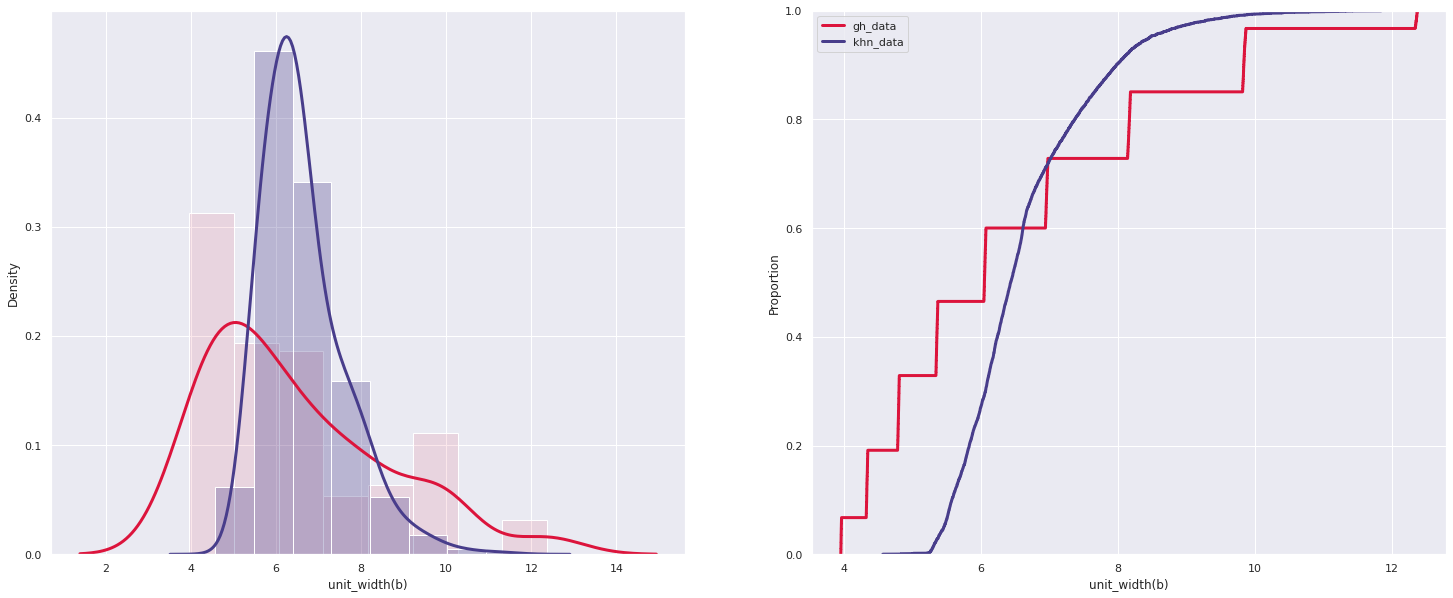

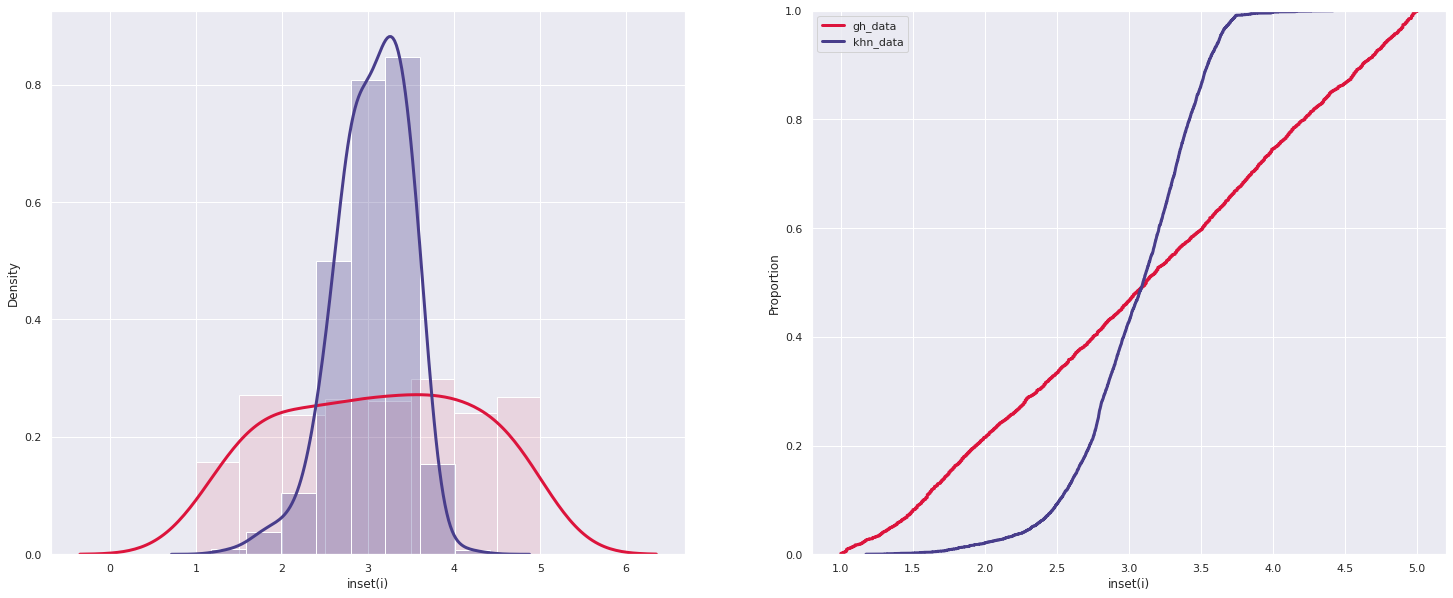

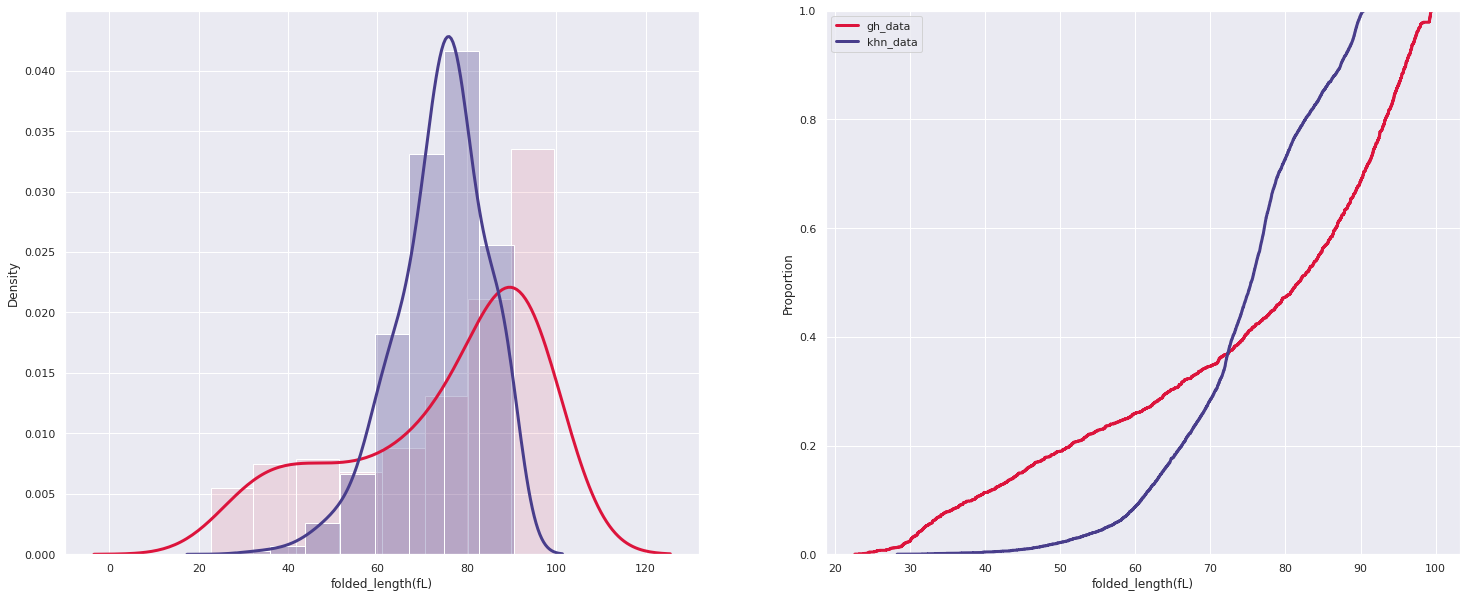

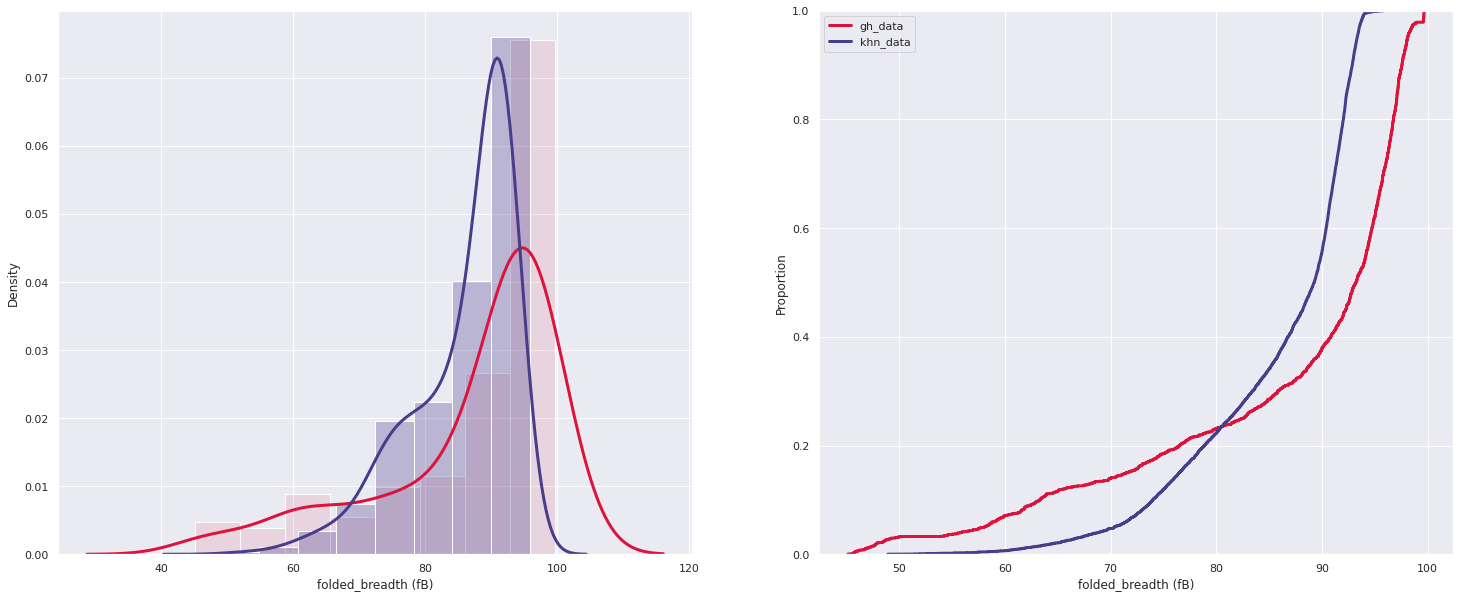

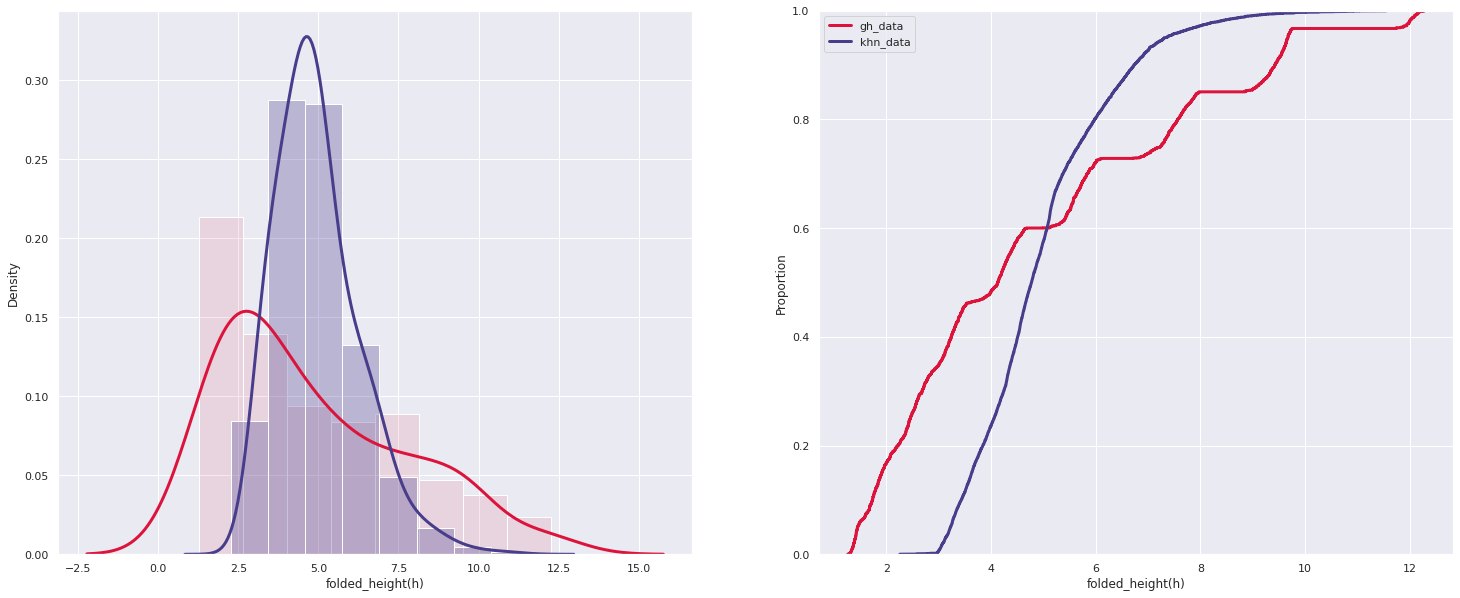

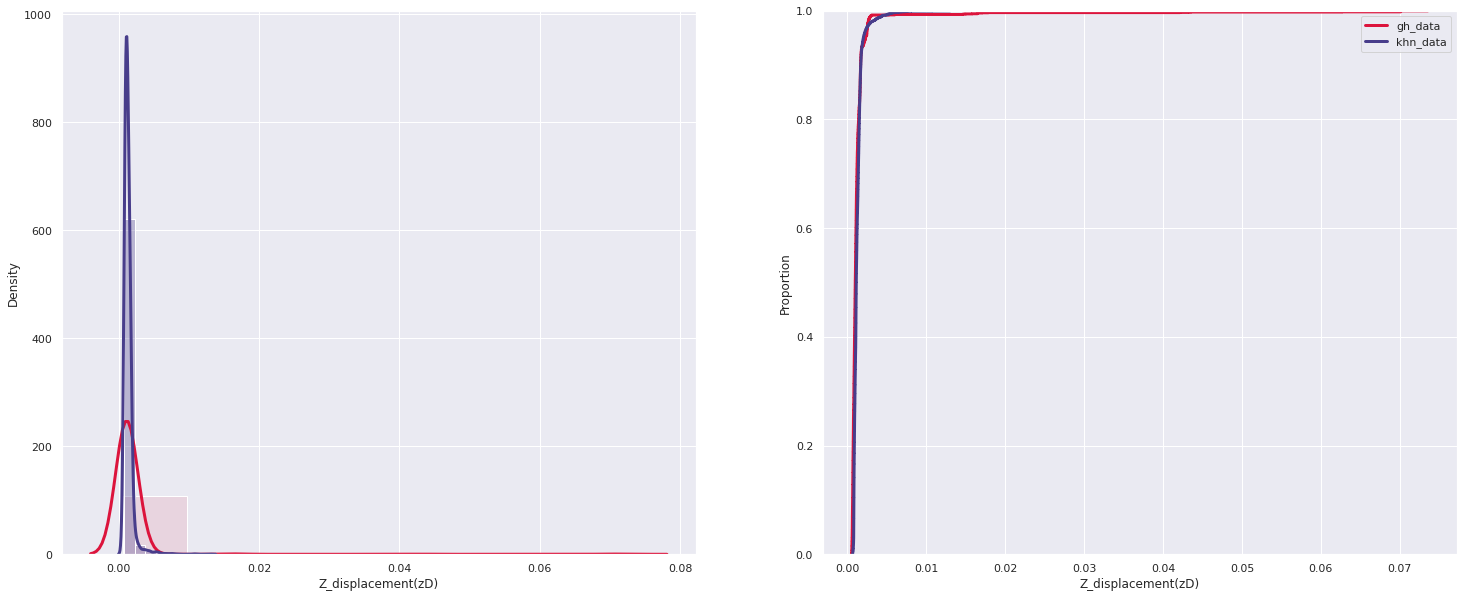

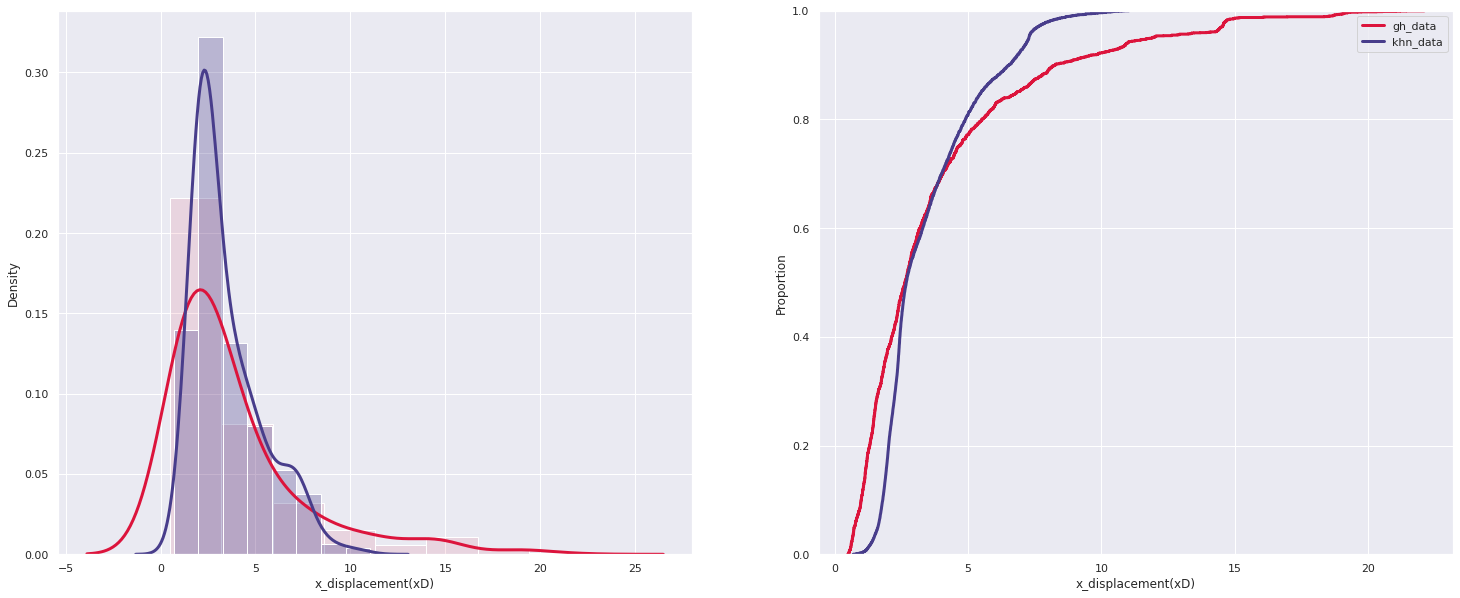

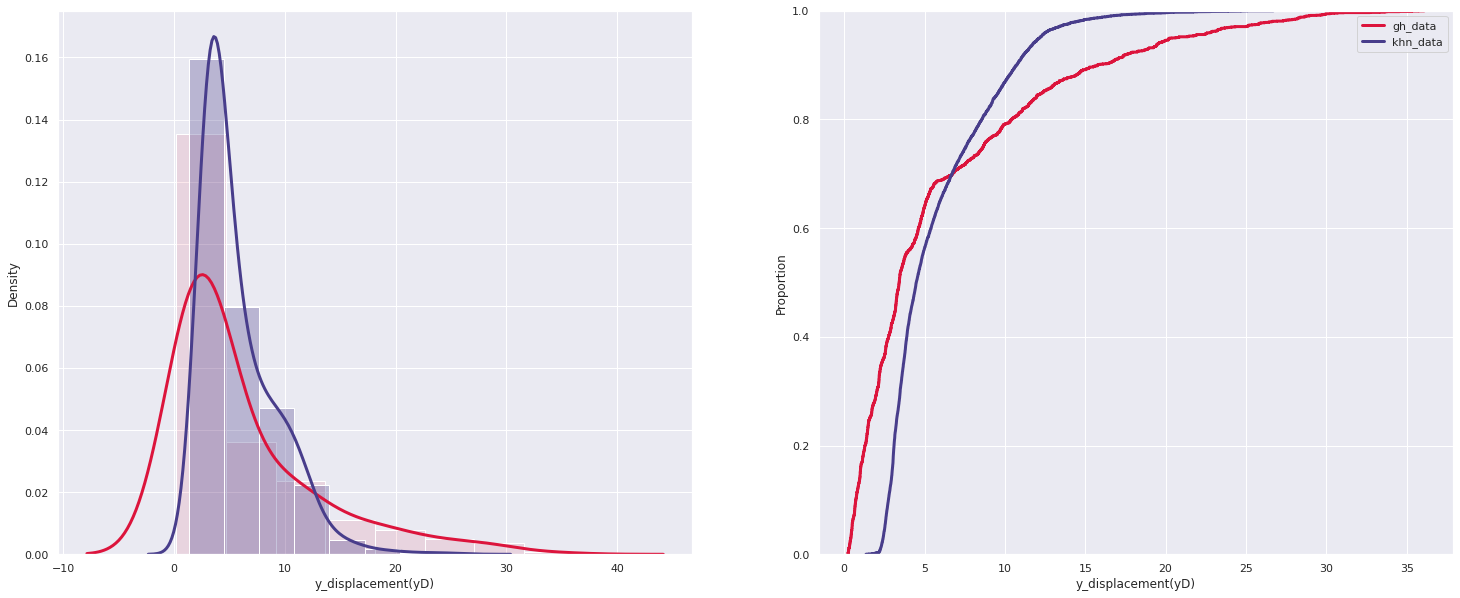

In [ ]:
for i in khn_data.columns.values:
  if (i == 'length(L)') | (i == 'breadth(B)') | (i == 'load(N)'):
    pass
  else: 
    fig, ax = plt.subplots(1,2, figsize = (25,10))
    sns.histplot(gh_data[i], color=color2, stat = 'density', alpha=0.1, bins=8, ax=ax[0])
    sns.histplot(khn_data[i], color=color3, stat = 'density',  alpha=alpha2, bins=8, ax=ax[0])
    sns.kdeplot(gh_data[i], color=color2, linewidth=3, bw_adjust=2, label = 'gh_data', ax=ax[0])
    sns.kdeplot(khn_data[i], color=color3, linewidth=3, label = 'khn_data.', bw_adjust=2, ax=ax[0])
    plt.legend()
    sns.ecdfplot(gh_data[i], color=color2, linewidth=3, label = 'gh_data', ax = ax[1], legend=True)
    sns.ecdfplot(khn_data[i], color=color3, linewidth=3, label = 'khn_data', ax = ax[1], legend=True)
    plt.legend()
    fig.savefig('comp_'+i, dpi = 150)


# **05_Model Training**

In [ ]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt



sns.set(rc={'figure.figsize':(10,10)})
print("imports ok")

imports ok


Using kernel Ridge because relationship between dependent and independent variables are non-linear. Running the next few analyses to determine the polynomial degree that generalises data better

## **GH Datasets**

### Preprocessing

In [ ]:
# Select the (independant) features that we are going to use to train the model
X_lengths = gh_data.loc[:, ["inset(i)", 'v_subdivisions(v)', 'u_subdivision(u)', 'folded_breadth (fB)', 'dihedral_folding_Angle (dA)', 'folded_length(fL)' ]]
print(X_lengths)

      inset(i)  v_subdivisions(v)  u_subdivision(u)  folded_breadth (fB)  \
0         4.26               22.0              22.0            95.891489   
1         4.96               18.0              24.0            99.672798   
2         3.26               24.0              18.0            91.179279   
3         2.65               22.0              14.0            84.641835   
4         1.05               22.0               8.0            45.628995   
...        ...                ...               ...                  ...   
2994      4.92               20.0              24.0            99.647761   
2995      4.62               10.0              22.0            97.943720   
2996      4.35               14.0              22.0            96.704400   
2997      4.49               12.0              22.0            97.337738   
2998      2.03               22.0              12.0            73.372513   

      dihedral_folding_Angle (dA)  folded_length(fL)  
0                           118.

In [ ]:
# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
scalerX.fit(X_lengths.to_numpy())
# Apply the scaler to our X-features
X_lengths_scaled = scalerX.transform(X_lengths.to_numpy())

In [ ]:
# Define the dependant variable / target to predict 
y_reg = gh_data[['x_displacement(xD)', 'y_displacement(yD)']]

In [ ]:
#Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, main_train, main_test= train_test_split(X_lengths_scaled, y_reg, gh_data, test_size = 0.2, random_state = 42)

### Check Polynomial fitting

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, LinearRegression

In [ ]:
x_values = X_train.transpose()
y_values = y_train.to_numpy().transpose()
y_values.shape
# x_values.shape

(2, 2140)

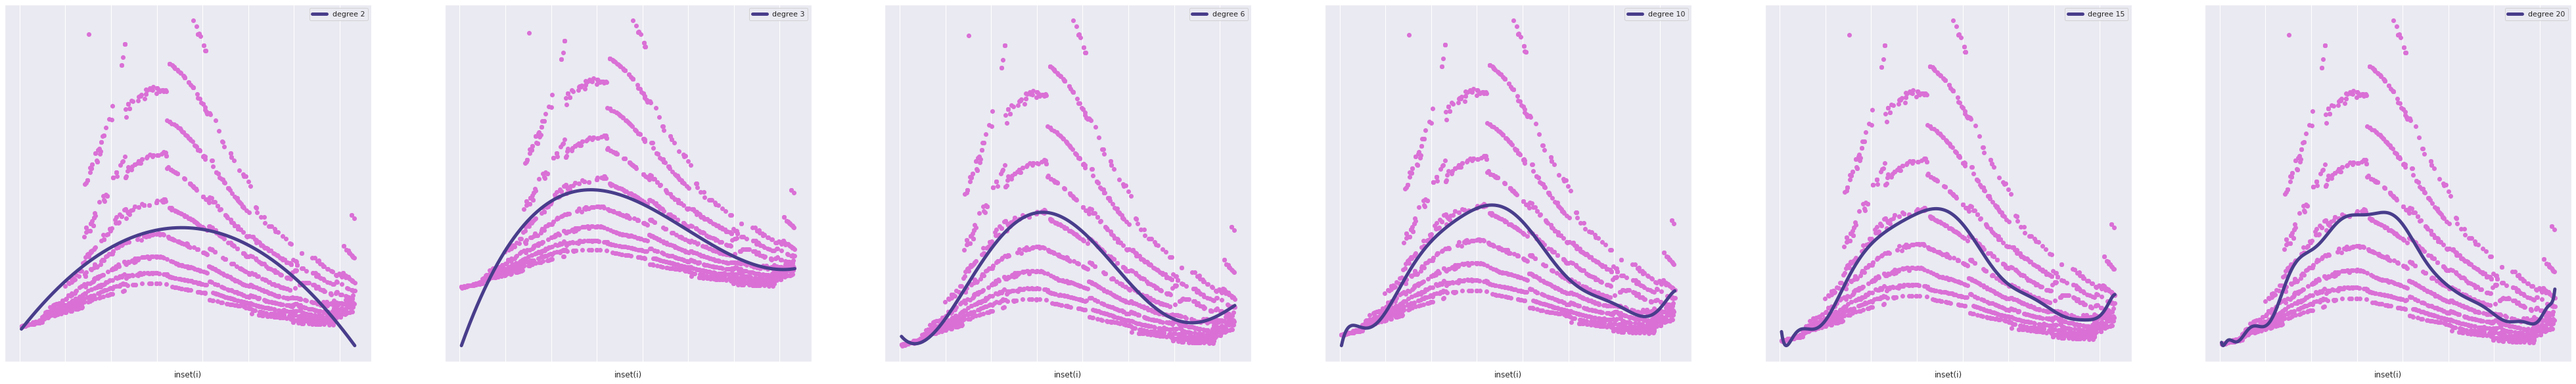

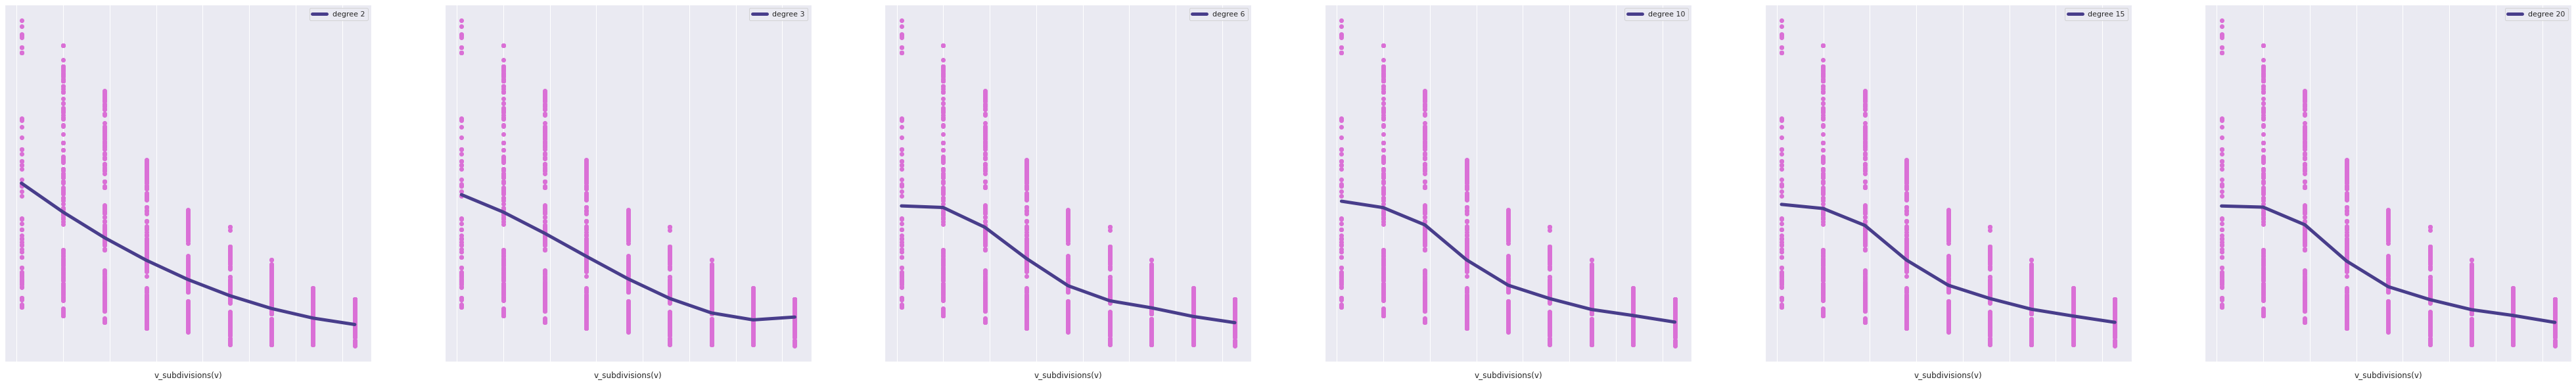

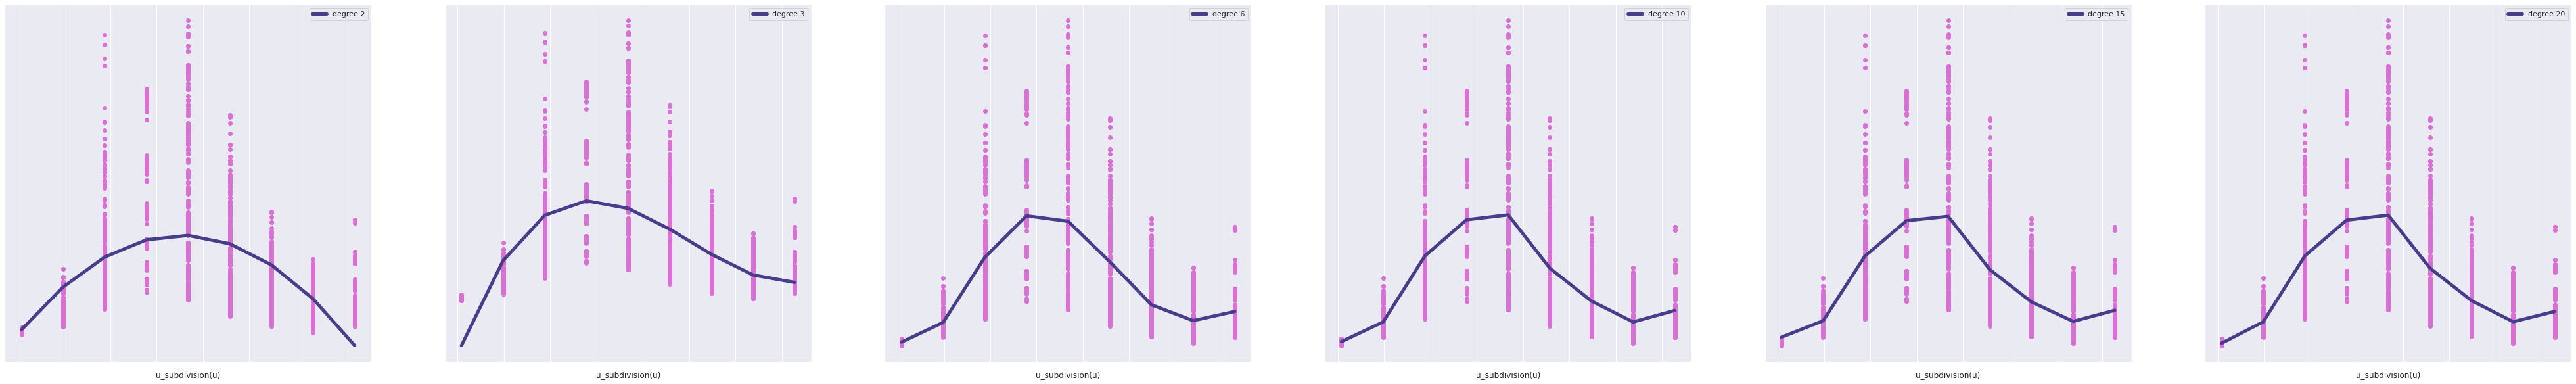

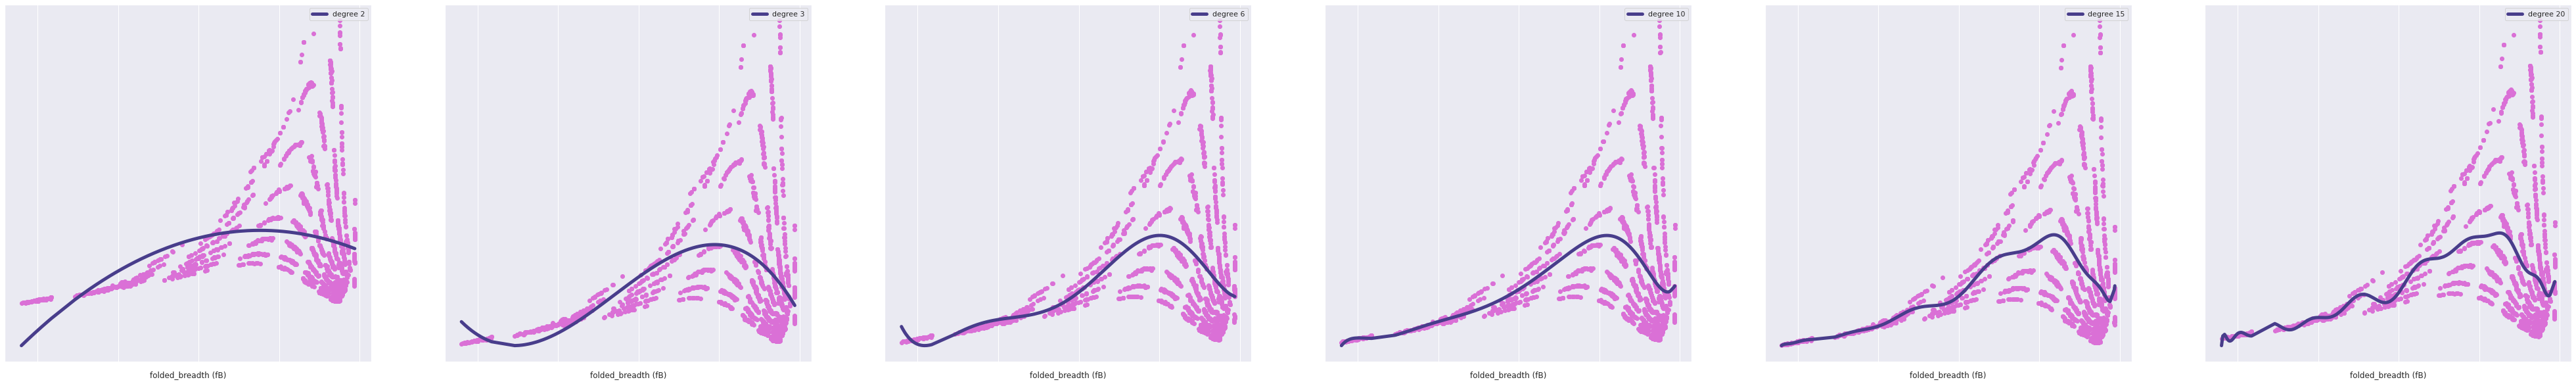

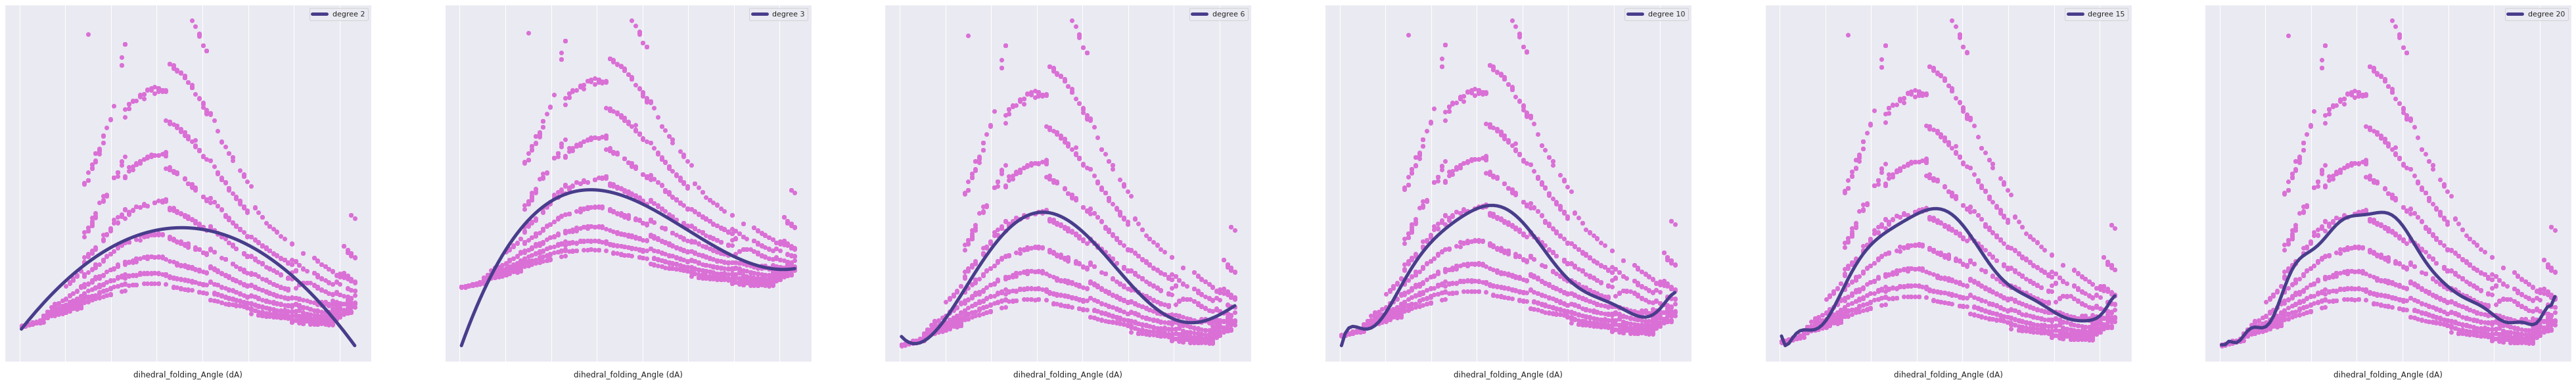

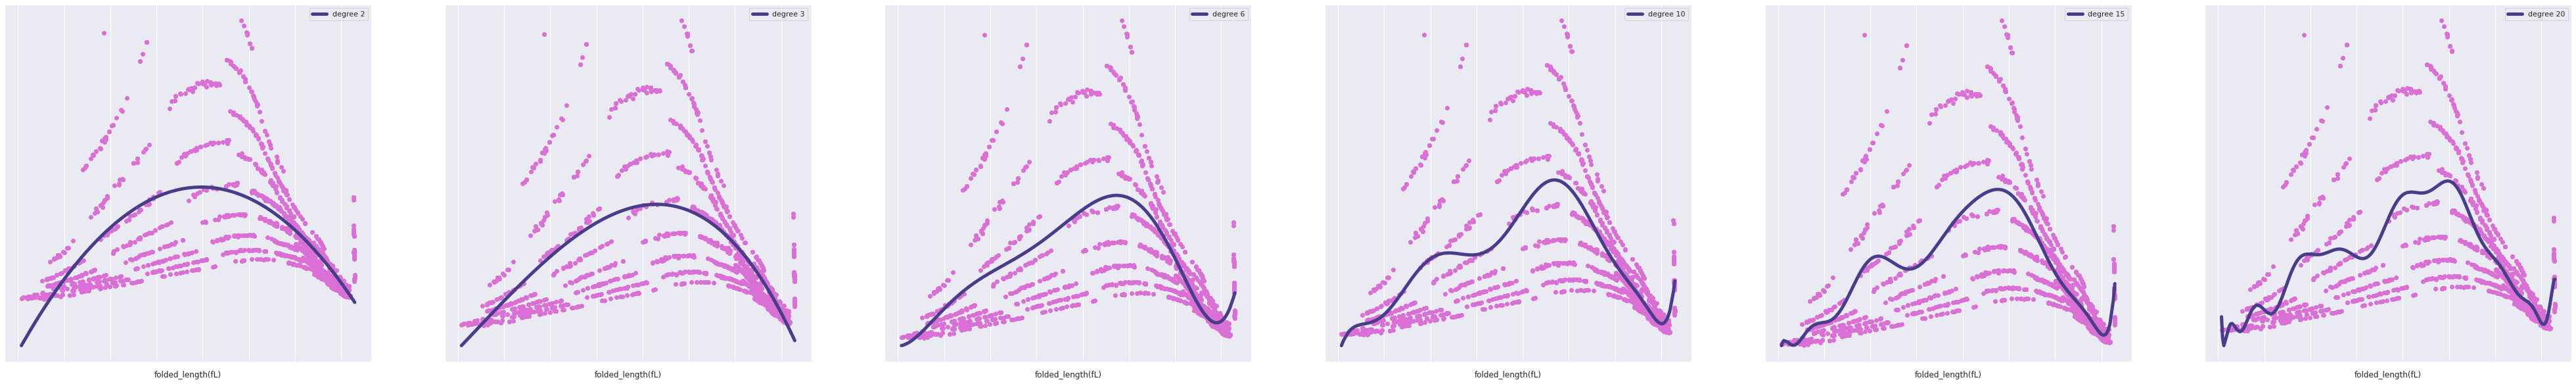

In [ ]:
import itertools
for i, j in enumerate(X_lengths.columns.values):
  degree =  [2, 3, 6, 10, 15, 20]
  lin = LinearRegression()
  fig, ax = plt.subplots(1,len(degree), figsize = (70,10))
  
  for m, n in enumerate(degree):
    ax[m].scatter(x_values[i], y_values[0,:], color = color)
    model = PolynomialFeatures(n,  include_bias=False)
    x = model.fit_transform(x_values[i].reshape(-1,1))
    # print(x.shape)
    # print( y_values[0,:].shape)
    lin.fit(x,  y_values[0,:])

    y_plot = lin.predict(x)
    # print(y_plot.shape)

    xs, ys = zip(*sorted(zip(x_values[i], y_plot)))

    ax[m].plot(xs, ys, color=color3, linewidth=5, label=f"degree {n}")
    ax[m].yaxis.set_visible(False)
    ax[m].legend()
    ax[m].set_xlabel(j)
    ax[m].axes.xaxis.set_ticklabels([])
  plt.show()
  fig.savefig('polyfit_'+j, dpi=300)




# for degree in [2, 3, 4, 5, 6, 7, 8, 9]:
#   model = PolynomialFeatures(degree, interaction_only=True)
#   lin = LinearRegression()
#   fig, ax = plt.subplots(1,len(x_values), figsize = (100,10))
#   for i in range(len(x_values)):
#     # print(X_train.shape)

#     x = model.fit_transform(X_train)
#     # print(x.shape)
#     # print(x[2,:2])
#     lin.fit(x,y_train)
#     plot_x = model.fit_transform(X_test)
#     plot_y = lin.predict(plot_x)
#     xs, ys = zip(*sorted(zip(X_test.transpose()[i,:], plot_y[:,1])))
#     print(xs)
#     ax[i].scatter(x_values[i], y_values[0,:])
#     ax[i].plot(xs, ys, color='red', label=f"degree {degree}")
#     #   ax[i].xaxis.set_visible(False)
#     #   ax[i].yaxis.set_visible(False)
      
#     # plt.legend()
#   plt.show()

Redundant code below
Decided to use polynomial curve fitting, as seen above
Kept for future reference

In [ ]:
# for i,j in enumerate(X_lengths.columns.values):
#   fig, ax = plt.subplots( figsize=(10, 10))
#   sns.scatterplot(x.transpose()[i], y_train['x_displacement(xD)'], ax = ax, color=color)
#   sns.lineplot(x.transpose()[i], y_train['x_displacement(xD)'], ax = ax, color=color3)
#   plt.xlabel(j)
#   plt.show()
#   # fig.savefig('deg_x_'+i)

In [ ]:
# for i in X_lengths.columns.values:
#   fig, ax = plt.subplots(figsize=(10, 10))
#   sns.scatterplot(gh_data[i], gh_data['y_displacement(yD)'], ax = ax, color=color)
#   sns.lineplot(gh_data[i], gh_data['y_displacement(yD)'], ax = ax, color=color3)
#   plt.show()
#   fig.savefig('deg_y_'+i)

### Shallow Learning

#### Create and Test Model

In [ ]:
# Import and instantiate the baseline model

from sklearn.kernel_ridge import KernelRidge
model1 = KernelRidge(kernel = "polynomial", degree = 6)
model2 = KernelRidge(kernel = "polynomial", degree = 10)
# Model training
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
# Model performance on the test-set / This score is R^2
print(model1.score(X_test, y_test))
print(model2.score(X_test, y_test))

#Tried SVR but got a negative R2 value for x_displacement (which is mathematically impossible)
# from sklearn.svm import SVR
# model3 = SVR(kernel = 'poly', degree = 3)
# model4 = SVR(kernel = 'poly', degree = 10)
# # Model training
# model3.fit(X_train, y_train.iloc[:, 0].to_numpy())
# model3.fit(X_train, y_train.iloc[:, 1].to_numpy())
# model4.fit(X_train, y_train.iloc[:, 0].to_numpy())
# model4.fit(X_train, y_train.iloc[:, 1].to_numpy())
# # Model performance on the test-set / This score is R^2
# print(model3.score(X_test, y_test.iloc[:,0]))
# print(model3.score(X_test, y_test.iloc[:,1]))
# print(model4.score(X_test, y_test.iloc[:,0]))
# print(model4.score(X_test, y_test.iloc[:,1]))

0.9992923274531867
0.9997656379560438


In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, model1.predict(X_test)))
print(mean_squared_error(y_test, model2.predict(X_test)))

0.009842915845103526
0.00314152242016601


In [ ]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'y_truth')

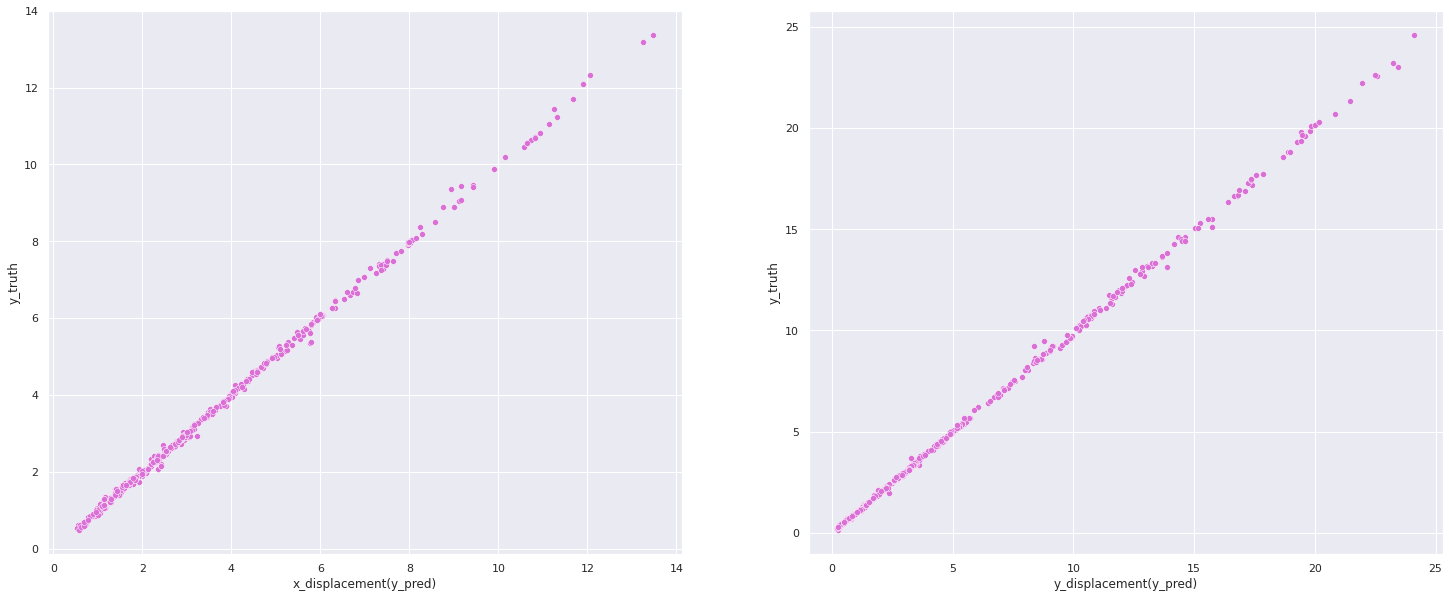

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
sns.scatterplot(y_test.iloc[:,0],y_pred1[:,0], ax = ax[0], color=color)
sns.scatterplot(y_test.iloc[:,1],y_pred1[:,1], ax = ax[1], color=color)
ax[0].set_xlabel('x_displacement(y_pred)')
ax[0].set_ylabel('y_truth')
ax[1].set_xlabel('y_displacement(y_pred)')
ax[1].set_ylabel('y_truth')
# fig.savefig('model1_plot')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


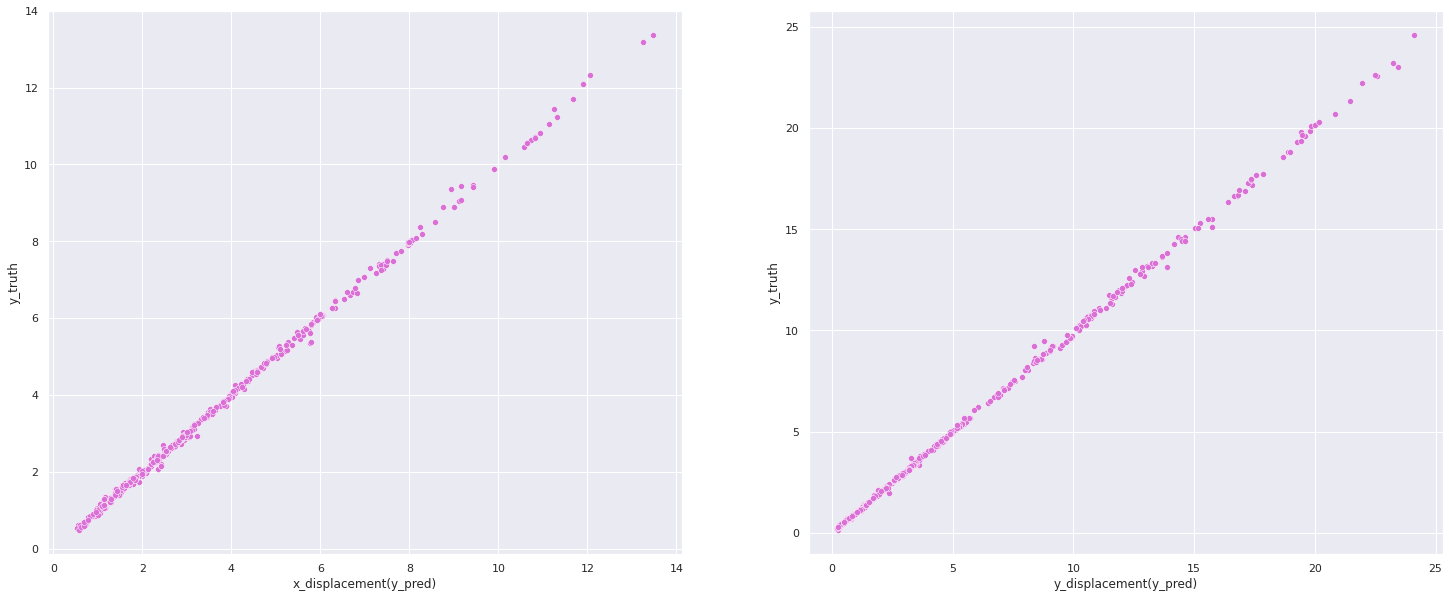

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
sns.scatterplot(y_test.iloc[:,0],y_pred2[:,0], ax = ax[0], color=color)
sns.scatterplot(y_test.iloc[:,1],y_pred2[:,1], ax = ax[1], color=color)
ax[0].set_xlabel('x_displacement(y_pred)')
ax[0].set_ylabel('y_truth')
ax[1].set_xlabel('y_displacement(y_pred)')
ax[1].set_ylabel('y_truth')
fig.savefig('model2_plot')

Visualise performance

In [ ]:
# for n,i in enumerate(X_lengths.columns.values):
#   fig, ax = plt.subplots(1,2,figsize=(25, 10))
#   sns.scatterplot(x_values[n], xdisp_y_values, ax = ax[0], color=color)
#   sns.scatterplot(x_values[n], xdisp_y_values, ax = ax[1], color=color)
#   sns.lineplot(x_values[n], model1.predict(X_train).transpose()[0], ax = ax[0], color=color3, label='model1_degree=6')
#   sns.lineplot(x_values[n], model2.predict(X_train).transpose()[0], ax = ax[1], color=color3, label='model2_degree=10')
#   ax[0].set_xlabel(i)
#   ax[1].set_xlabel(i)
#   plt.legend()
#   plt.show()
#   # fig.savefig('deg_x_'+i)

### Neural Network

In [ ]:
# Instantiate a sequential model
TFmodel = tf.keras.models.Sequential() 

TFmodel.add(tf.keras.layers.Dense(8, input_shape=(6,), activation='relu'))
TFmodel.add(tf.keras.layers.Dense(16, activation='relu'))
TFmodel.add(tf.keras.layers.Dense(8, activation='relu'))
TFmodel.add(tf.keras.layers.Dropout(0.005))
# TFmodel.add(tf.keras.layers.Flatten())
# Add a dense layer with 2 value outputs
TFmodel.add(tf.keras.layers.Dense(2, activation= "exponential"))
  
# Compile your model 
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
TFmodel.compile(optimizer = opt, loss = "mean_squared_error", metrics=['accuracy'])
TFmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 56        
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 2)                 18        
                                                                 
Total params: 354
Trainable params: 354
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit your model to the training data for 200 epochs
#we assign this to history variable so we can plot the training data
history = TFmodel.fit(X_train,y_train,epochs=400, validation_split=0.2)

Epoch 1/400
54/54 [==============================] - 1s 5ms/step - loss: 32.0492 - accuracy: 0.6542 - val_loss: 28.5065 - val_accuracy: 0.8084
Epoch 2/400
54/54 [==============================] - 0s 2ms/step - loss: 18.8006 - accuracy: 0.7114 - val_loss: 5.7217 - val_accuracy: 0.6636
Epoch 3/400
54/54 [==============================] - 0s 2ms/step - loss: 5.4747 - accuracy: 0.6922 - val_loss: 4.0101 - val_accuracy: 0.7056
Epoch 4/400
54/54 [==============================] - 0s 2ms/step - loss: 4.2296 - accuracy: 0.7447 - val_loss: 3.2056 - val_accuracy: 0.7640
Epoch 5/400
54/54 [==============================] - 0s 2ms/step - loss: 3.4024 - accuracy: 0.8522 - val_loss: 2.6245 - val_accuracy: 0.8785
Epoch 6/400
54/54 [==============================] - 0s 2ms/step - loss: 2.7110 - accuracy: 0.8750 - val_loss: 2.2531 - val_accuracy: 0.8598
Epoch 7/400
54/54 [==============================] - 0s 2ms/step - loss: 2.4182 - accuracy: 0.8808 - val_loss: 1.8938 - val_accuracy: 0.8832
Epoch 8/40

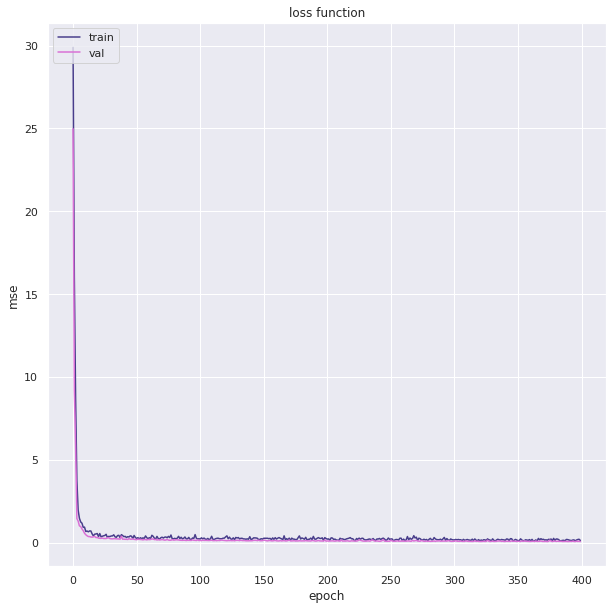

In [ ]:
# summarize history for accuracy
plt.plot(history.history['loss'], color=color3)
plt.plot(history.history['val_loss'], color=color)
plt.title('loss function')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Evaluate your model accuracy on the test data
loss_test = TFmodel.evaluate(X_test,y_test)

# Print accuracy
print('mse_test:', loss_test)

17/17 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9776
mse_test: [0.04034419730305672, 0.977570116519928]


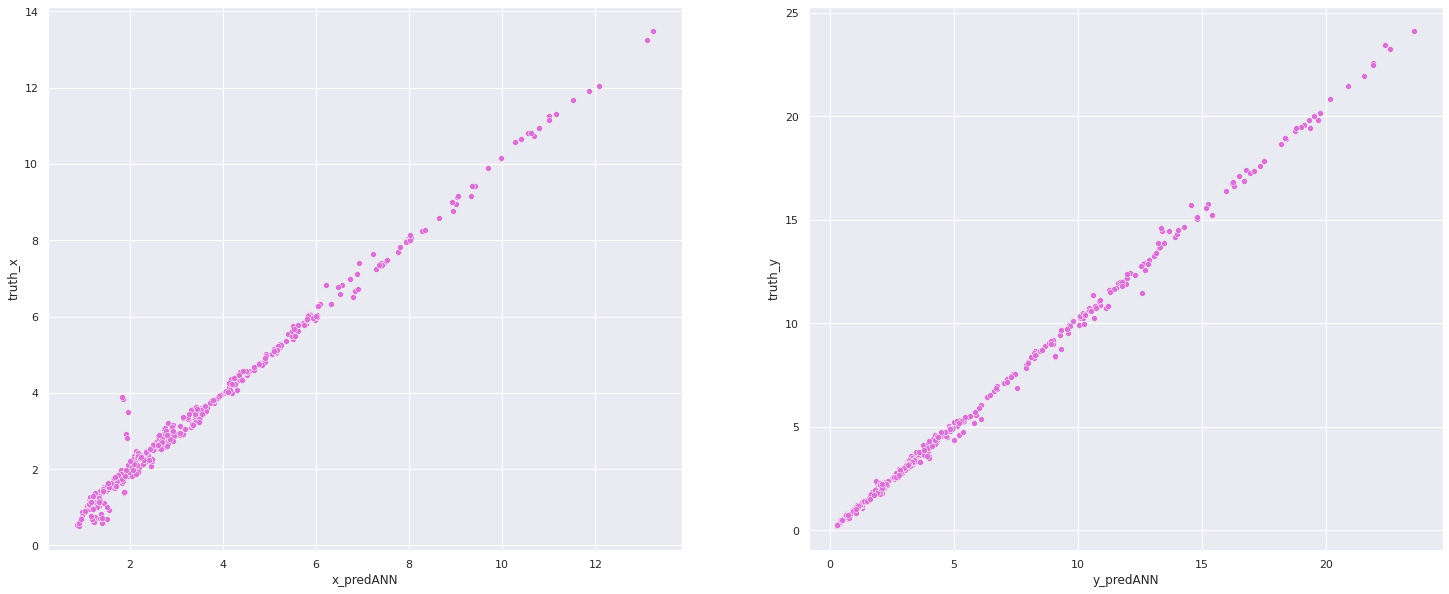

In [ ]:
# We can also inspect our results visually
y_pred = TFmodel.predict(X_test)

main_test["x_predANN"] = y_pred[:,0]
main_test["y_predANN"] = y_pred[:,1]
main_test["truth_x"] = y_test.iloc[:,0]
main_test["truth_y"] = y_test.iloc[:,1]
fig, ax = plt.subplots(1,2, figsize = (25,10))
sns.scatterplot(x = "x_predANN", y = "truth_x", data = main_test, ax = ax[0], color=color)
sns.scatterplot(x = "y_predANN", y = "truth_y", data = main_test, ax = ax[1], color=color)
fig.savefig('TFmodel')

### Compare the three models

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

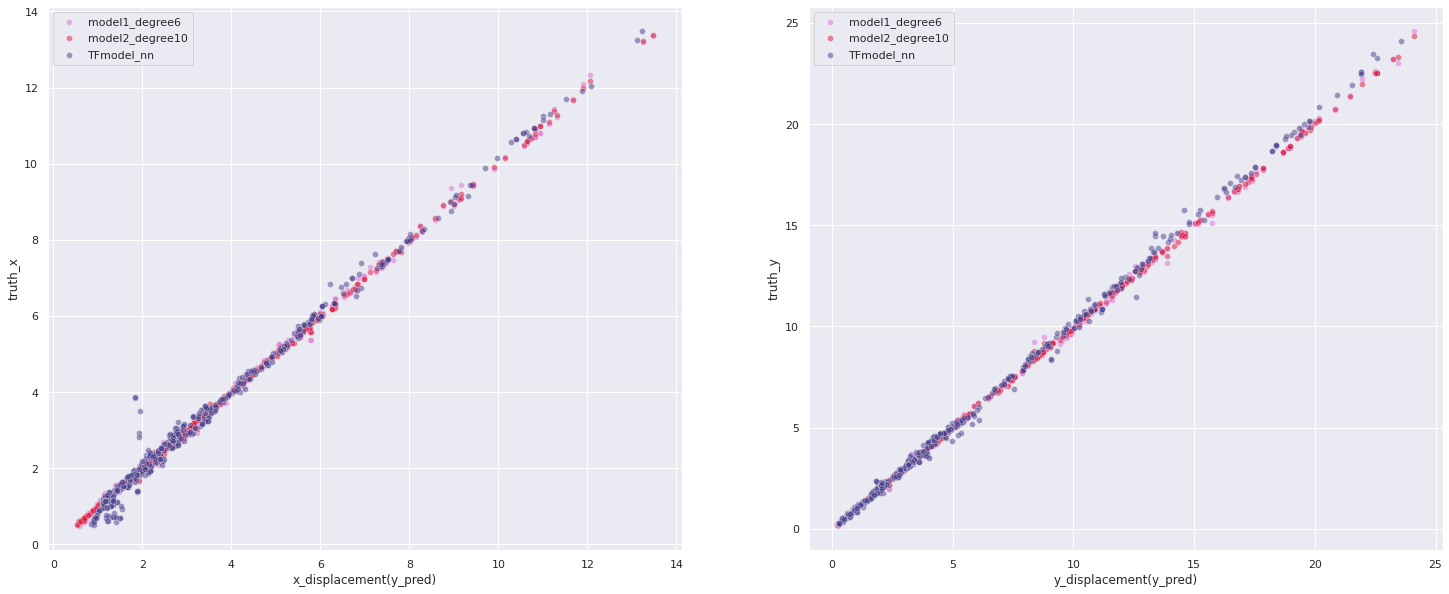

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
sns.scatterplot(y_test.iloc[:,0],y_pred1[:,0], ax = ax[0], alpha = alpha, color=color, label = 'model1_degree6')
sns.scatterplot(y_test.iloc[:,0],y_pred2[:,0], ax = ax[0], alpha = alpha, color=color2, label = 'model2_degree10')
sns.scatterplot(x = "x_predANN", y = "truth_x", data = main_test, ax = ax[0], alpha = 0.5, color=color3, label = 'TFmodel_nn')
sns.scatterplot(y_test.iloc[:,1],y_pred1[:,1], ax = ax[1], alpha = alpha, color=color,label = 'model1_degree6' )
sns.scatterplot(y_test.iloc[:,1],y_pred2[:,1], ax = ax[1], alpha = alpha, color=color2, label = 'model2_degree10')
sns.scatterplot(x = "y_predANN", y = "truth_y", data = main_test, ax = ax[1], alpha = 0.5, color=color3, label = 'TFmodel_nn')
ax[0].set_xlabel('x_displacement(y_pred)')
ax[1].set_xlabel('y_displacement(y_pred)')
plt.legend()
plt.show()
fig.savefig('gh_models_comparison')

## **Kohonan Datasets**

### Preprocessing

In [ ]:
# Select the (independant) features that we are going to use to train the model
kX_lengths = khn_data.loc[:, ["inset(i)", 'v_subdivisions(v)', 'u_subdivision(u)', 'folded_breadth (fB)', 'dihedral_folding_Angle (dA)', 'folded_length(fL)' ]]
print(X_lengths)

      inset(i)  v_subdivisions(v)  u_subdivision(u)  folded_breadth (fB)  \
0         4.26               22.0              22.0            95.891489   
1         4.96               18.0              24.0            99.672798   
2         3.26               24.0              18.0            91.179279   
3         2.65               22.0              14.0            84.641835   
4         1.05               22.0               8.0            45.628995   
...        ...                ...               ...                  ...   
2994      4.92               20.0              24.0            99.647761   
2995      4.62               10.0              22.0            97.943720   
2996      4.35               14.0              22.0            96.704400   
2997      4.49               12.0              22.0            97.337738   
2998      2.03               22.0              12.0            73.372513   

      dihedral_folding_Angle (dA)  folded_length(fL)  
0                           118.

In [ ]:
# Load and instantiate a StandardSclaer 
# from sklearn.preprocessing import StandardScaler
K_scalerX = StandardScaler()

# Apply the scaler to our X-features
kX_lengths_scaled = K_scalerX.fit_transform(kX_lengths)

In [ ]:
# Define the dependant variable / target to predict 
kY_reg = khn_data[['x_displacement(xD)', 'y_displacement(yD)']]

In [ ]:
#Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
kX_train, kX_test, kY_train, kY_test, kMain_train, kMain_test= train_test_split(kX_lengths_scaled, kY_reg, khn_data, test_size = 0.2, random_state = 42)

### Check Polynomial Fitting

In [ ]:
kx_values = kX_train.transpose()
ky_values = kY_train.to_numpy().transpose()
ky_values.shape
# x_values.shape

(2, 3920)

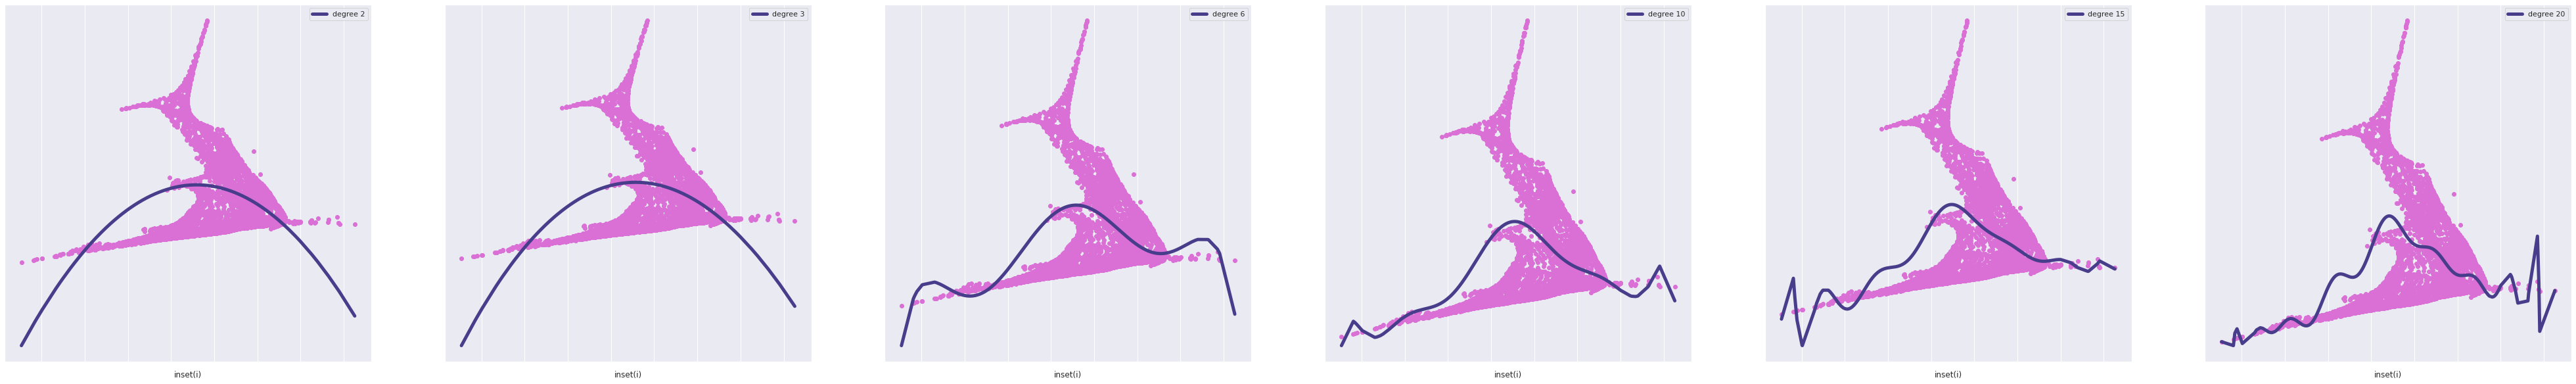

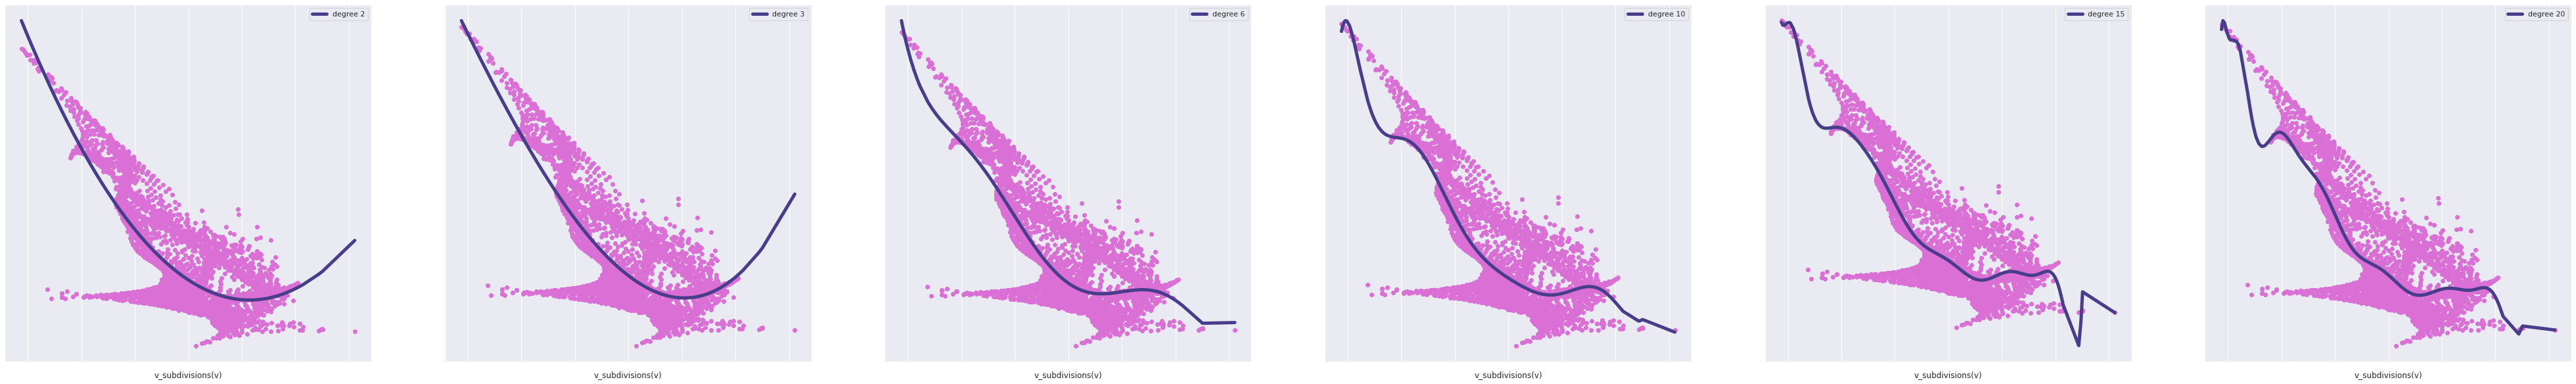

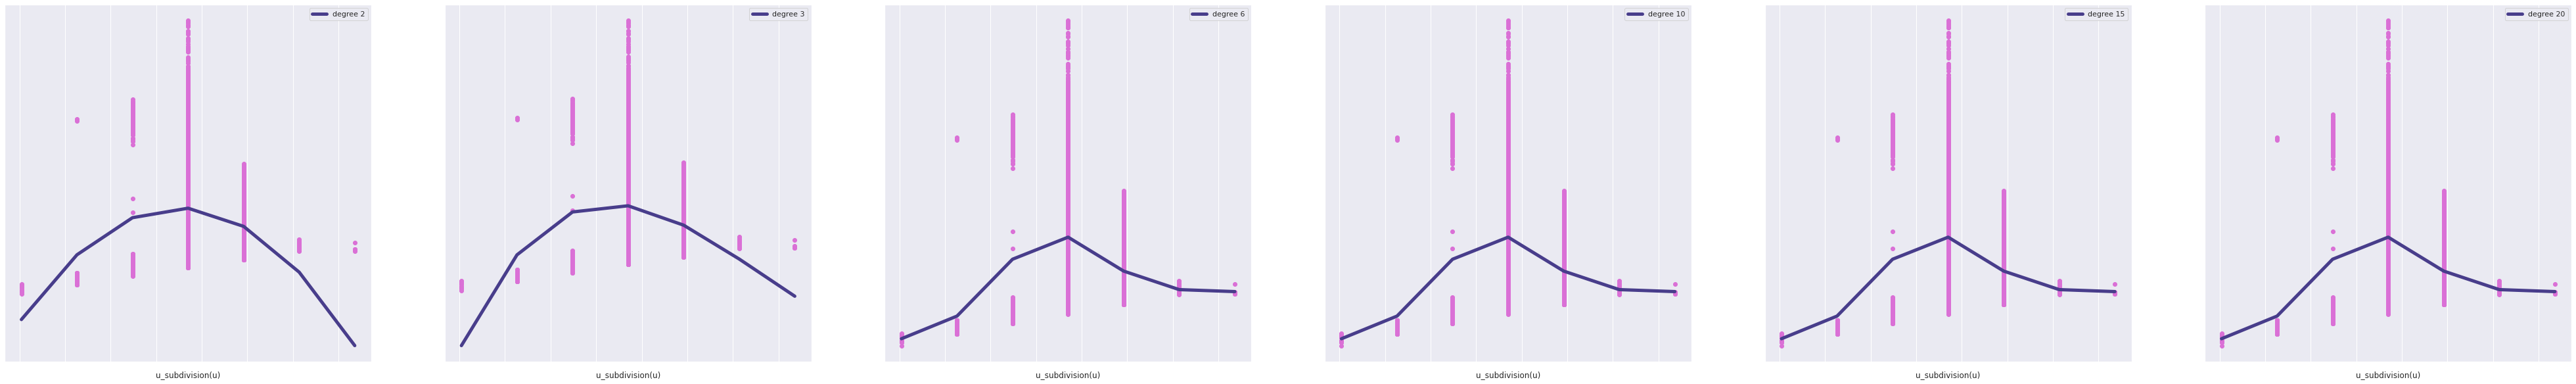

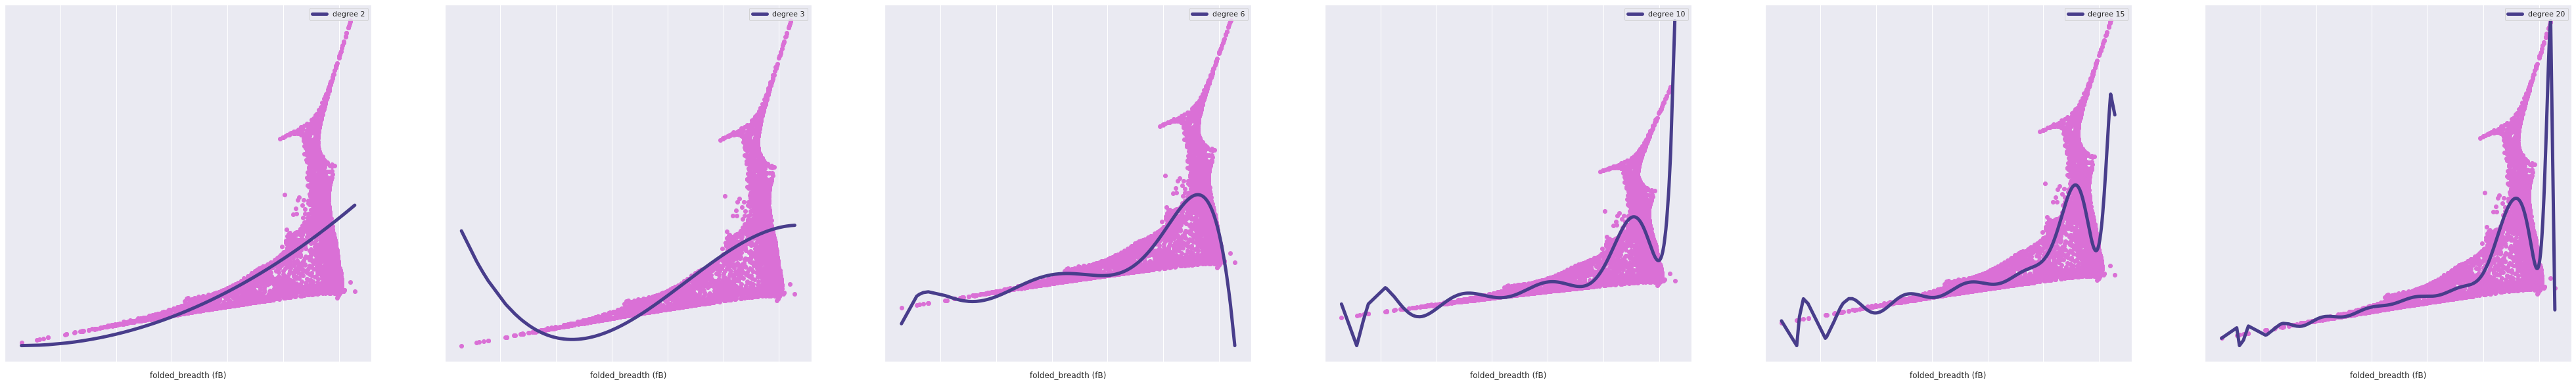

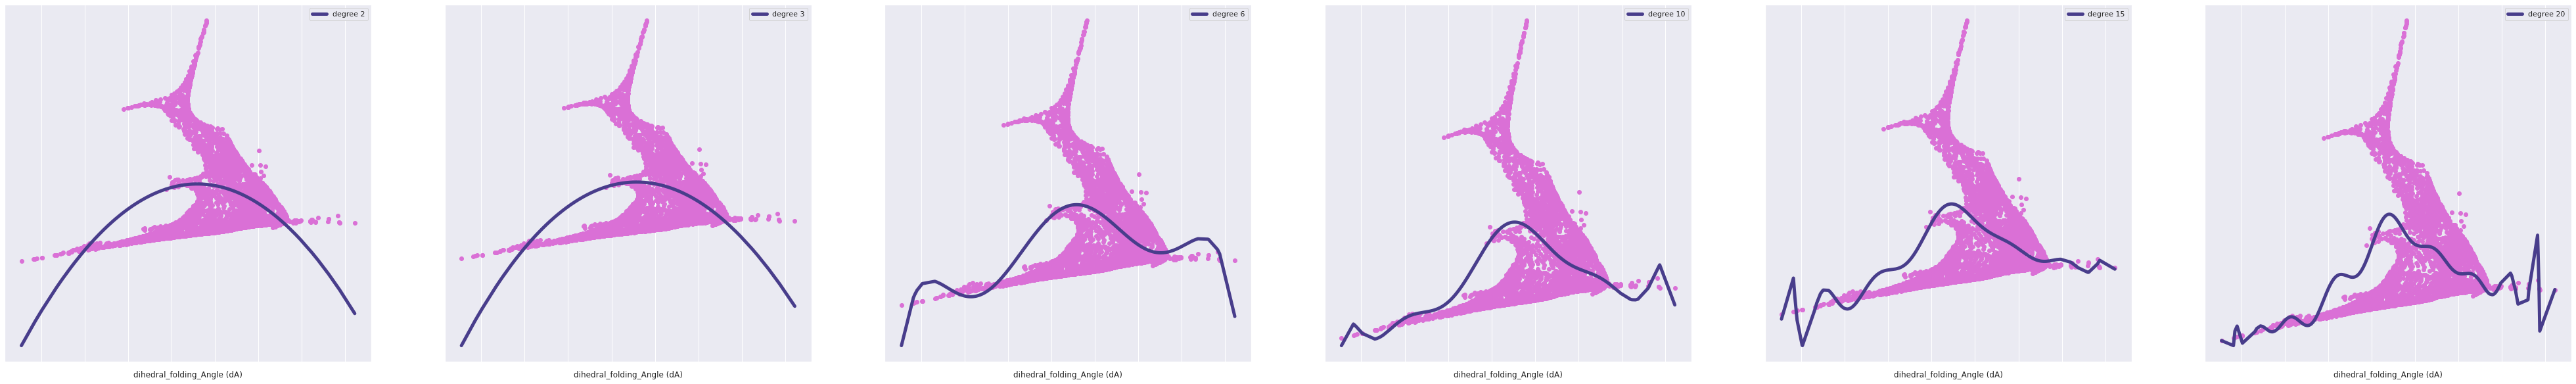

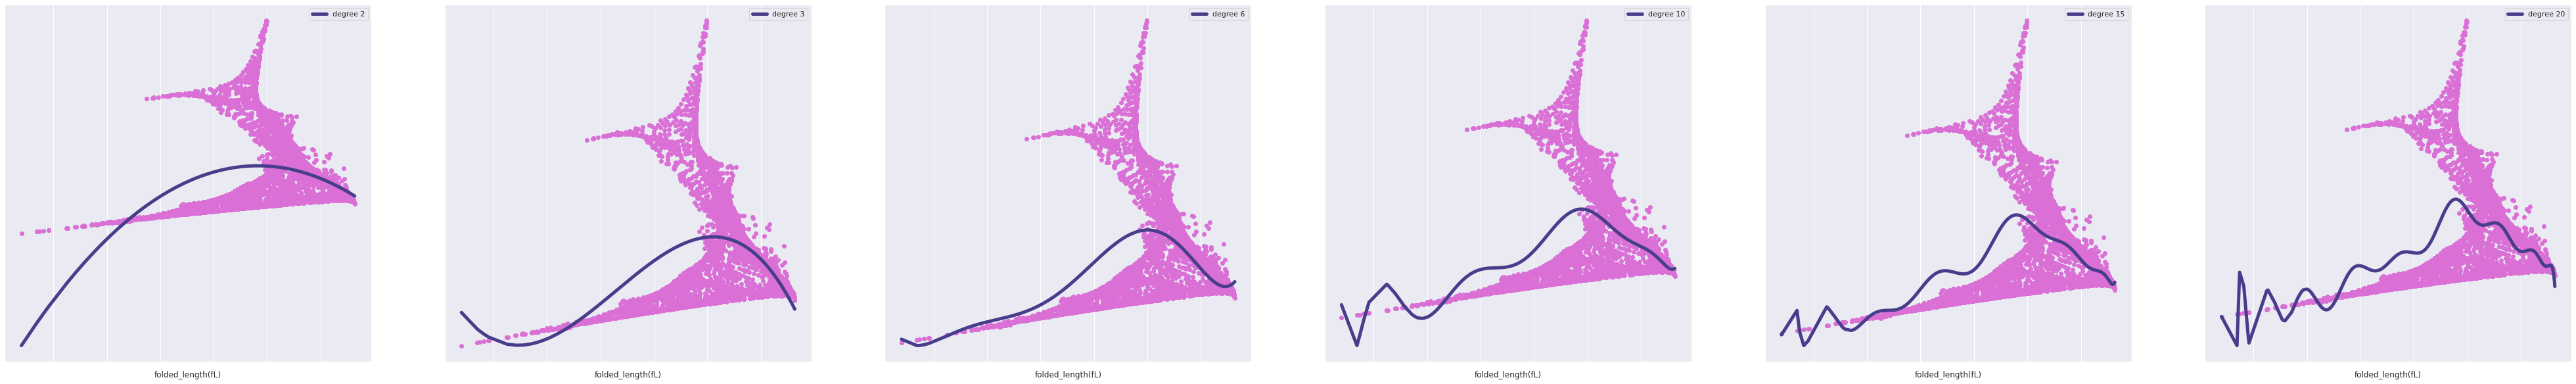

In [ ]:
import itertools
for i, j in enumerate(kX_lengths.columns.values):
  degree =  [2, 3, 6, 10, 15, 20]
  lin = LinearRegression()
  fig, ax = plt.subplots(1,len(degree), figsize = (70,10))
  
  for m, n in enumerate(degree):
    ax[m].scatter(kx_values[i], ky_values[0,:], color = color)
    model = PolynomialFeatures(n,  include_bias=False)
    x = model.fit_transform(kx_values[i].reshape(-1,1))
    # print(x.shape)
    # print( y_values[0,:].shape)
    lin.fit(x,  ky_values[0,:])

    y_plot = lin.predict(x)
    # print(y_plot.shape)

    xs, ys = zip(*sorted(zip(kx_values[i], y_plot)))

    ax[m].plot(xs, ys, color=color3, linewidth=5, label=f"degree {n}")
    ax[m].yaxis.set_visible(False)
    ax[m].legend()
    ax[m].set_xlabel(j)
    ax[m].axes.xaxis.set_ticklabels([])
  plt.show()
  fig.savefig('khn_polyfit_'+j, dpi=300)




# for degree in [2, 3, 4, 5, 6, 7, 8, 9]:
#   model = PolynomialFeatures(degree, interaction_only=True)
#   lin = LinearRegression()
#   fig, ax = plt.subplots(1,len(x_values), figsize = (100,10))
#   for i in range(len(x_values)):
#     # print(X_train.shape)

#     x = model.fit_transform(X_train)
#     # print(x.shape)
#     # print(x[2,:2])
#     lin.fit(x,y_train)
#     plot_x = model.fit_transform(X_test)
#     plot_y = lin.predict(plot_x)
#     xs, ys = zip(*sorted(zip(X_test.transpose()[i,:], plot_y[:,1])))
#     print(xs)
#     ax[i].scatter(x_values[i], y_values[0,:])
#     ax[i].plot(xs, ys, color='red', label=f"degree {degree}")
#     #   ax[i].xaxis.set_visible(False)
#     #   ax[i].yaxis.set_visible(False)
      
#     # plt.legend()
#   plt.show()

### Shallow Learning

In [ ]:
# Import and instantiate the baseline model

from sklearn.kernel_ridge import KernelRidge
K_model1 = KernelRidge(kernel = "polynomial", degree = 6)
K_model2 = KernelRidge(kernel = "polynomial", degree = 10)

# Model training
K_model1.fit(kX_train, kY_train)
K_model2.fit(kX_train, kY_train)

# Model performance on the test-set / This score is R^2
print(K_model1.score(kX_test, kY_test))
print(K_model2.score(kX_test, kY_test))

0.9985605496933662
0.9987932303670302


In [ ]:
print(mean_squared_error(kY_test, K_model1.predict(kX_test)))
print(mean_squared_error(kY_test, K_model2.predict(kX_test)))

0.011612603426603061
0.010600270787874618


In [ ]:
# We can also inspect our results visually
kY_pred1 = K_model1.predict(kX_test)
kY_pred2 = K_model2.predict(kX_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


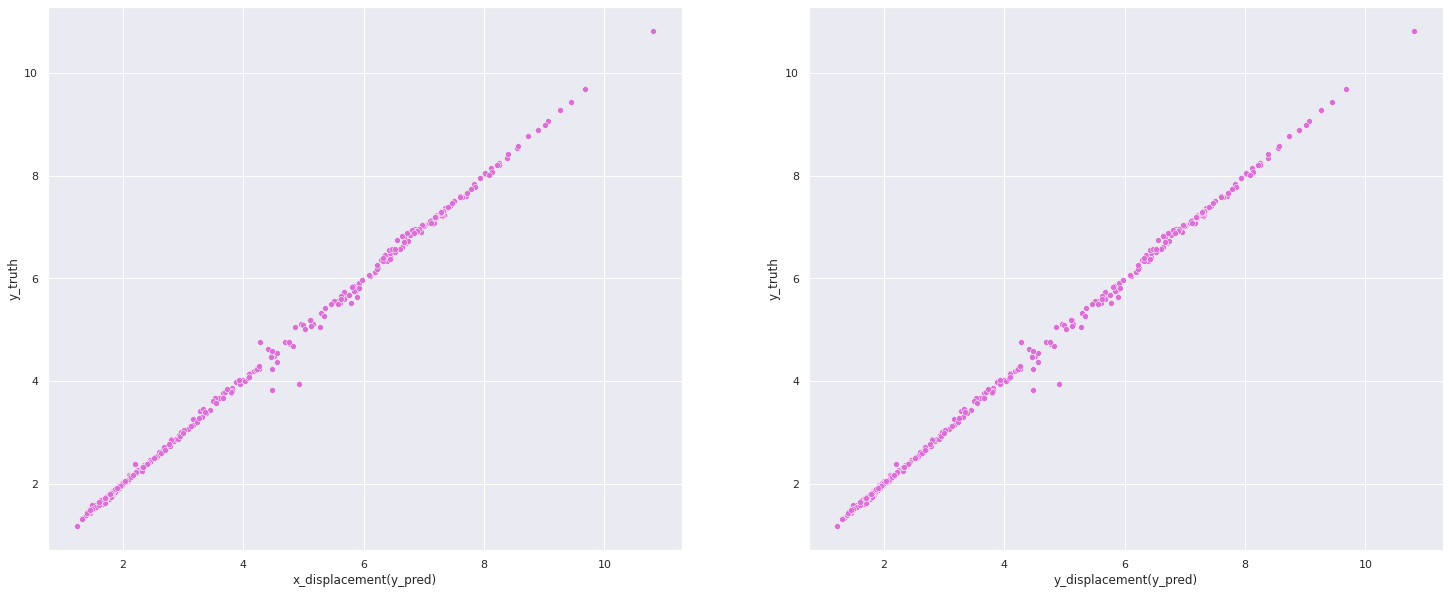

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
sns.scatterplot(kY_test.iloc[:,0],kY_pred1[:,0], ax = ax[0], color=color)
sns.scatterplot(kY_test.iloc[:,0],kY_pred1[:,0], ax = ax[1], color=color)
ax[0].set_xlabel('x_displacement(y_pred)')
ax[0].set_ylabel('y_truth')
ax[1].set_xlabel('y_displacement(y_pred)')
ax[1].set_ylabel('y_truth')
fig.savefig('K_model1')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


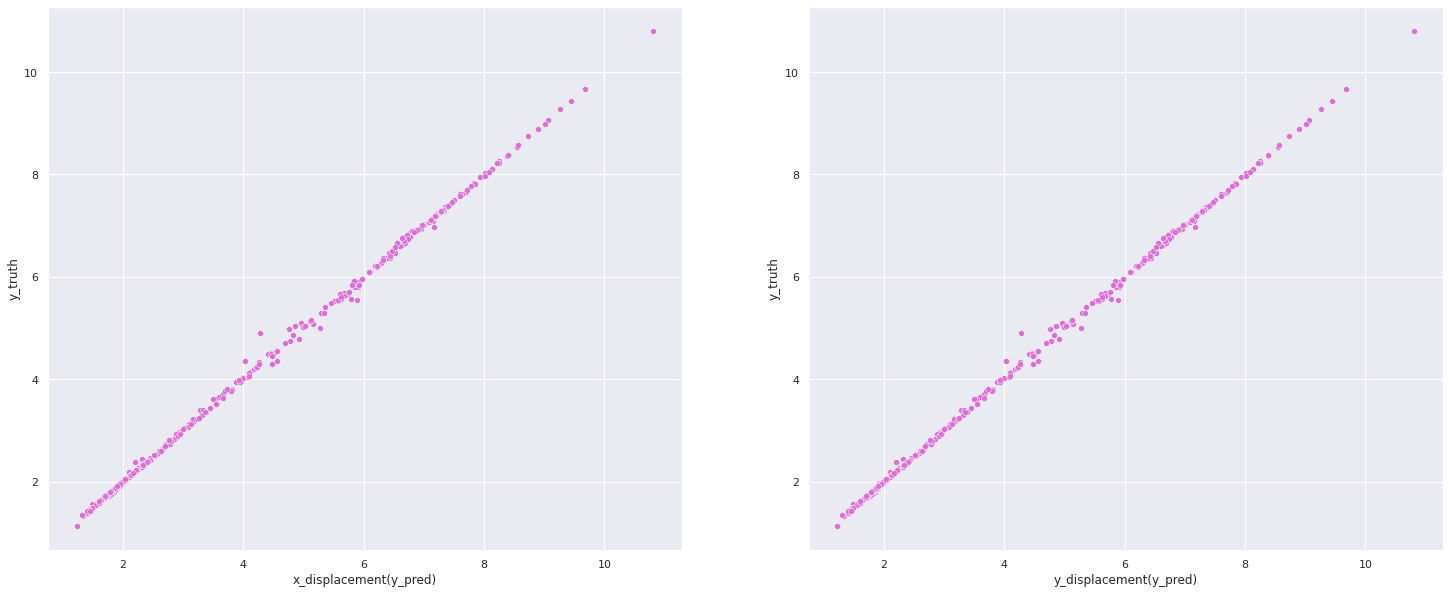

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
sns.scatterplot(kY_test.iloc[:,0],kY_pred2[:,0], ax = ax[0], color=color)
sns.scatterplot(kY_test.iloc[:,0],kY_pred2[:,0], ax = ax[1], color=color)
ax[0].set_xlabel('x_displacement(y_pred)')
ax[0].set_ylabel('y_truth')
ax[1].set_xlabel('y_displacement(y_pred)')
ax[1].set_ylabel('y_truth')
fig.savefig('K_model2')

### Neural Network

In [ ]:
# Instantiate a sequential model
K_TFmodel = tf.keras.models.Sequential() 

K_TFmodel.add(tf.keras.layers.Dense(8, input_shape=(6,), activation='relu'))
K_TFmodel.add(tf.keras.layers.Dense(16, activation='selu'))
K_TFmodel.add(tf.keras.layers.Dense(16, activation='selu'))
# K_TFmodel.add(tf.keras.layers.BatchNormalization())
K_TFmodel.add(tf.keras.layers.Dropout(0.01))

# Add a dense layer with 2 value outputs
K_TFmodel.add(tf.keras.layers.Dense(2, activation= "exponential"))
  
# Compile your model 
opt=tf.keras.optimizers.Adam(learning_rate=0.002)
K_TFmodel.compile(optimizer = opt, loss = "mean_squared_error", metrics=['accuracy'])
K_TFmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 56        
                                                                 
 dense_5 (Dense)             (None, 16)                144       
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 2)                 34        
                                                                 
Total params: 506
Trainable params: 506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit your model to the training data for 200 epochs
#we assign this to history variable so we can plot the training data
history = K_TFmodel.fit(kX_train,kY_train,epochs=400, validation_split=0.2)

Epoch 1/400
48/48 [==============================] - 1s 5ms/step - loss: 15.0102 - accuracy: 0.7364 - val_loss: 3.9181 - val_accuracy: 0.8508
Epoch 2/400
48/48 [==============================] - 0s 2ms/step - loss: 1.9844 - accuracy: 0.9069 - val_loss: 0.8136 - val_accuracy: 0.8927
Epoch 3/400
48/48 [==============================] - 0s 3ms/step - loss: 0.9810 - accuracy: 0.9213 - val_loss: 0.4495 - val_accuracy: 0.9215
Epoch 4/400
48/48 [==============================] - 0s 4ms/step - loss: 0.7257 - accuracy: 0.9430 - val_loss: 0.3330 - val_accuracy: 0.9607
Epoch 5/400
48/48 [==============================] - 0s 5ms/step - loss: 0.6486 - accuracy: 0.9528 - val_loss: 0.2836 - val_accuracy: 0.9293
Epoch 6/400
48/48 [==============================] - 0s 5ms/step - loss: 0.5693 - accuracy: 0.9521 - val_loss: 0.2732 - val_accuracy: 0.9529
Epoch 7/400
48/48 [==============================] - 0s 4ms/step - loss: 0.5337 - accuracy: 0.9626 - val_loss: 0.2767 - val_accuracy: 0.9267
Epoch 8/400


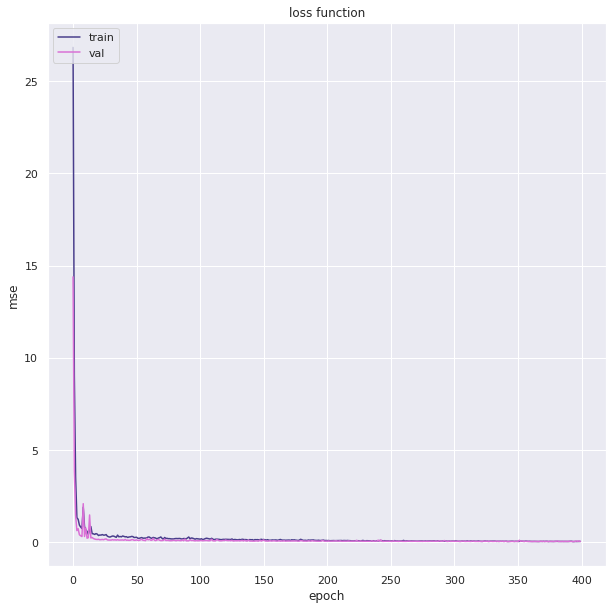

In [ ]:
# summarize history for accuracy
plt.plot(history.history['loss'], color=color3)
plt.plot(history.history['val_loss'], color=color)
plt.title('loss function')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Evaluate your model accuracy on the test data
kloss_test = K_TFmodel.evaluate(kX_test,kY_test)

# Print accuracy
print('mse_test:', kloss_test)

15/15 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9874
mse_test: [0.030728258192539215, 0.9874213933944702]


In [ ]:
# We can also inspect our results visually
kY_pred = K_TFmodel.predict(kX_test)
kMain_test["x_predANN"] = kY_pred[:,0]
kMain_test["y_predANN"] = kY_pred[:,1]
kMain_test["truth_x"] = kY_test.iloc[:,0]
kMain_test["truth_y"] = kY_test.iloc[:,1]


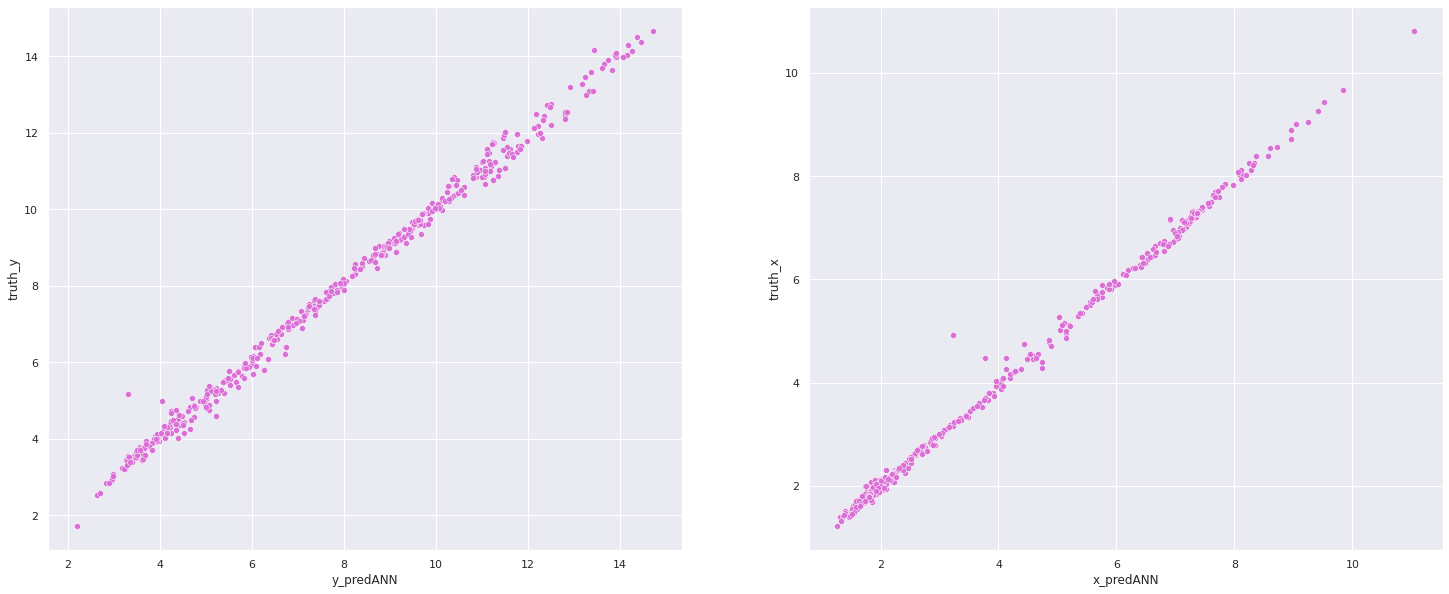

In [ ]:
# We can also inspect our results visually
fig, ax = plt.subplots(1,2, figsize = (25,10))
sns.scatterplot(x = "y_predANN", y = "truth_y", data = kMain_test,  ax = ax[0], color=color)
sns.scatterplot(x = "x_predANN", y = "truth_x", data = kMain_test, ax = ax[1], color=color)
fig.savefig('K_TFmodel')

Compare the three models

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

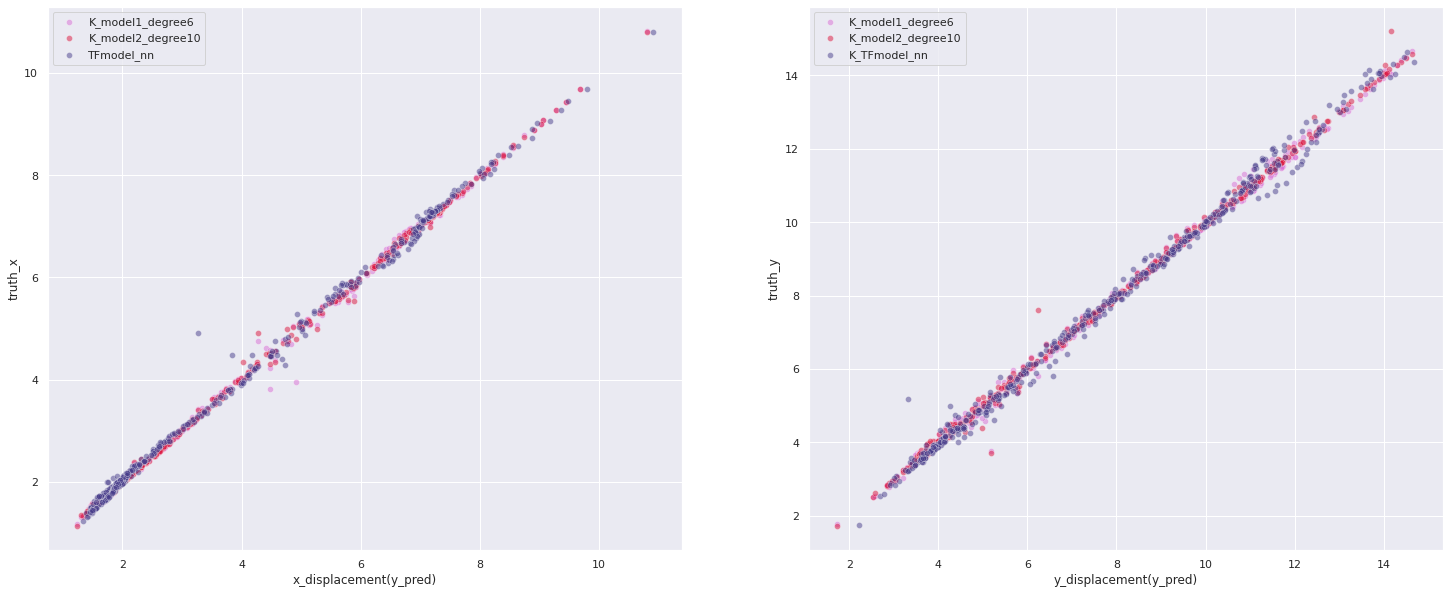

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
sns.scatterplot(kY_test.iloc[:,0],kY_pred1[:,0], ax = ax[0], alpha = alpha, color=color, label = 'K_model1_degree6')
sns.scatterplot(kY_test.iloc[:,0],kY_pred2[:,0], ax = ax[0], alpha = alpha, color=color2, label = 'K_model2_degree10')
sns.scatterplot(x = "x_predANN", y = "truth_x", data = kMain_test, ax = ax[0], alpha = 0.5, color=color3, label = 'TFmodel_nn')
sns.scatterplot(kY_test.iloc[:,1],kY_pred1[:,1], ax = ax[1], alpha = alpha, color=color,label = 'K_model1_degree6' )
sns.scatterplot(kY_test.iloc[:,1],kY_pred2[:,1], ax = ax[1], alpha = alpha, color=color2, label = 'K_model2_degree10')
sns.scatterplot(x = "y_predANN", y = "truth_y", data = kMain_test, ax = ax[1], alpha = 0.5, color=color3, label = 'K_TFmodel_nn')
ax[0].set_xlabel('x_displacement(y_pred)')
ax[1].set_xlabel('y_displacement(y_pred)')
plt.legend()
plt.show()
fig.savefig('Khn_models_compare')

# **06_Export to GH**

In [ ]:
#run only once, 
!pip install ghhops-server flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 8.2 MB/s 
  Created wheel for rhino3dm: filename=rhino3dm-7.14.2-cp37-cp37m-linux_x86_64.whl size=4995200 sha256=cf3dcee038772e00826cb1c2f0c95897012ce83a99da3005786d7f404f68bc8b
  Stored in directory: /root/.cache/pip/wheels/54/fd/27/c1c91b5631a9dcb2291a8541117b0040fe461756f9c77430fc
Successfully built rhino3dm


In [ ]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
from flask import Flask
from flask_ngrok import run_with_ngrok
import ghhops_server as hs
import numpy
import rhino3dm
import pickle


sns.set(rc={'figure.figsize':(10,10)})
print("imports ok")

imports ok


In [ ]:
# #https://www.tensorflow.org/guide/keras/save_and_serialize
# model.save("model_20_ep.h5")

# scalerX_filename = "scalerXAtoB.save"
# joblib.dump(scalerX, scalerX_filename)


In [ ]:
# model.save("K_model_20_ep.h5")

# K_scalerX_filename = "scalerXAtoB.save"
# joblib.dump(K_scalerX, K_scalerX_filename)


In [ ]:
#save sklearn models
filename1 = 'model1.sav'
filename2 = 'model2.sav'
pickle.dump(model1, open(filename1, 'wb'))
pickle.dump(model2, open(filename1, 'wb'))

filename3 = 'kmodel1.sav'
filename4 = 'kmodel2.sav'
pickle.dump(K_model1, open(filename2, 'wb'))
pickle.dump(K_model2, open(filename2, 'wb'))

scalerX_filename = "scalerX.save"
joblib.dump(scalerX, scalerX_filename)

['scalerX.save']

In [ ]:
# 1 --- import model
#gh_model = pickle.load(open(filename1, 'rb')) #No longer needed as hops code is in same colab as model

# 2 --- set up scaler variables
# scalerX = joblib.load("scalerX.save") #No longer needed as hops code is in same colab as model



def myMLPredictions(inset, v_subdivisions, u_subdivision, folded_breadth , dihedral_folding_Angle, folded_length):

    # Create Input Array
    new_data = pd.DataFrame([[inset, v_subdivisions, u_subdivision, folded_breadth , dihedral_folding_Angle, folded_length]])

    # Scale Input to match the same format from the trained model
    scaled_input = scalerX.transform(new_data)

    # 01// predict
    out = model1.predict(scaled_input)
    
    #Flatten predictions list to be readable for hops
    pred_list = out.tolist()
    flat_list = []

    for i in pred_list:
        flat_list += i

    # Set each prediction value to a variable
    x= flat_list[0]
    y= flat_list[1]

   

    return x, y

In [ ]:
app = Flask(__name__)
#using ngrok library to stream data
run_with_ngrok(app) 
hops = hs.Hops(app)

# -- ATOB MODEL
@hops.component(
    "/gHml_model1",
    name="MTMT",
    description="Metamaterial Displacement",
    inputs=[
        hs.HopsInteger("u_subdivision", "u_subdivision", "u_subdivision"),
        hs.HopsNumber("v_subdivisions", "v_subdivisions", "v_subdivisions"),
        hs.HopsNumber("dihedral_folding_Angle", "dihedral_folding_Angle", "dihedral_folding_Angle"),  
        hs.HopsNumber("inset", "i", "inset value"),
        hs.HopsNumber("folded_length", "folded_length", "folded_length"),
        hs.HopsNumber("folded_breadth", "folded_breadth", "folded_breadth"),
    ],
    outputs=[
        hs.HopsNumber("x", "x" , "x_displacement"),
        hs.HopsNumber("y", "y", "y_displacement")

    ]
)

def myGHOrigami(u_subdivision, v_subdivisions, dihedral_folding_Angle, inset, folded_length, folded_breadth):
    return myMLPredictions(inset, v_subdivisions, u_subdivision, folded_breadth , dihedral_folding_Angle, folded_length)

In [ ]:
# 1 --- import model
#gh_model = pickle.load(open(filename1, 'rb')) #No longer needed as hops code is in same colab as model

# 2 --- set up scaler variables
# scalerX = joblib.load("scalerX.save") #No longer needed as hops code is in same colab as model



def myMLPredictions2(inset, v_subdivisions, u_subdivision, folded_breadth , dihedral_folding_Angle, folded_length):

    # Create Input Array
    new_data = pd.DataFrame([[inset, v_subdivisions, u_subdivision, folded_breadth , dihedral_folding_Angle, folded_length]])

    # Scale Input to match the same format from the trained model
    scaled_input = scalerX.transform(new_data)

    # 01// predict
    out = model2.predict(scaled_input)
    
    #Flatten predictions list to be readable for hops
    pred_list = out.tolist()
    flat_list = []

    for i in pred_list:
        flat_list += i

    # Set each prediction value to a variable
    x= flat_list[0]
    y= flat_list[1]

   

    return x, y

In [ ]:
app2 = Flask(__name__)
#using ngrok library to stream data
run_with_ngrok(app2) 
hops = hs.Hops(app2)

# -- ATOB MODEL
@hops.component(
    "/gHml_model2",
    name="MTMT2",
    description="Metamaterial Displacement",
    inputs=[
        hs.HopsInteger("u_subdivision", "u_subdivision", "u_subdivision"),
        hs.HopsNumber("v_subdivisions", "v_subdivisions", "v_subdivisions"),
        hs.HopsNumber("dihedral_folding_Angle", "dihedral_folding_Angle", "dihedral_folding_Angle"),  
        hs.HopsNumber("inset", "i", "inset value"),
        hs.HopsNumber("folded_length", "folded_length", "folded_length"),
        hs.HopsNumber("folded_breadth", "folded_breadth", "folded_breadth"),
    ],
    outputs=[
        hs.HopsNumber("x", "x" , "x_displacement"),
        hs.HopsNumber("y", "y", "y_displacement")

    ]
)

def myGHOrigami(u_subdivision, v_subdivisions, dihedral_folding_Angle, inset, folded_length, folded_breadth):
    return myMLPredictions2(inset, v_subdivisions, u_subdivision, folded_breadth , dihedral_folding_Angle, folded_length)

In [ ]:
#run the app
app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


[INFO]  * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
[DEBUG] Starting new HTTP connection (1): localhost:4040
[DEBUG] http://localhost:4040 "GET /api/tunnels HTTP/1.1" 200 791


 * Running on http://4484-34-125-115-42.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


In [ ]:
app2.run()

# To check if app is running fine

In [ ]:
vi=[[1.22, 20, 8, 46.263446, 46, 31.463075]]

In [ ]:
vi = scalerX.transform(vi)

In [ ]:
model2.predict(vi.reshape(1,-1))

array([[ 0.57365152, 19.25711299]])

In [ ]:
model1.predict(vi.reshape(1,-1))

array([[ 0.91039833, 20.31965356]])